<h1 style="text-align: center;">Bikes Share Challenge<h1>

Prepare libraries

In [1]:
# here put every import you need e.g. import nltk
import pandas as pd
import geopandas as gpd
import shapely.wkt
import numpy as np
import pygeohash as pgh
from time import time
import folium
import plotly.express as px  
import plotly.io as pio
import re
from fuzzywuzzy import process
import shapely
from shapely import wkt, wkb
from shapely.geometry import Point
from pathlib import Path
from IPython.display import Image
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image, display

# <div dir="rtl">مهمة 01  : تنظيف ومكاملة البيانات<div>

## <div dir="rtl"> [a] سد الفجوات <div>

### <div dir="rtl"> تحميل الملفات وعرض تفاصيل كل ملف<div>

In [2]:
# تحديد المسار الأساسي للملفات
base_path = "data/"

# قائمة الملفات التي سنقرأها
files = [
    "Capital_Bikeshare_Locations.csv",
    "daily-rent-sampled.parquet",
    "daily-rent.parquet",
    "DDOT_Central_Business_District.geojson",
    "Metro_Bus_Stops.csv",
    "Residential_and_Visitor_Parking_Zones.geojson",
    "Shuttle_Bus_Stops.csv",
    "stations.csv",
    "Washington_DC_USA_2024-01-01_to_2024-12-31.csv"
]

# دالة لعرض تفاصيل الملف
def explore_file(data, file_name):
    print(f"\n=== استكشاف الملف: {file_name} ===")
    print("\nمعلومات عامة:")
    print(data.info())

In [3]:
# 1. Capital_Bikeshare_Locations.csv
print("قراءة Capital_Bikeshare_Locations.csv...")
capital_bikeshare = pd.read_csv(base_path + "Capital_Bikeshare_Locations.csv")
explore_file(capital_bikeshare, "Capital_Bikeshare_Locations.csv")

قراءة Capital_Bikeshare_Locations.csv...

=== استكشاف الملف: Capital_Bikeshare_Locations.csv ===

معلومات عامة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   X                               794 non-null    float64
 1   Y                               794 non-null    float64
 2   NAME                            794 non-null    object 
 3   STATION_TYPE                    794 non-null    object 
 4   STATION_ID                      794 non-null    object 
 5   STATION_STATUS                  0 non-null      float64
 6   LAST_REPORTED                   794 non-null    object 
 7   NUM_DOCKS_AVAILABLE             794 non-null    int64  
 8   NUM_DOCKS_DISABLED              794 non-null    int64  
 9   NUM_BIKES_AVAILABLE             794 non-null    int64  
 10  NUM_EBIKES_AVAILABLE            794 non-null  

In [4]:
# 2. daily_rent-sampled.parquet
print("قراءة daily-rent-sampled.parquet...")
daily_rent = pd.read_parquet(base_path + "daily-rent-sampled.parquet")
explore_file(daily_rent, "daily-rent-sampled.parquet")

قراءة daily-rent-sampled.parquet...

=== استكشاف الملف: daily-rent-sampled.parquet ===

معلومات عامة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018456 entries, 0 to 2018455
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 200.2+ MB
None


In [5]:
# 2. daily_rent.parquet
print("قراءة daily-rent.parquet...")
daily_rent = pd.read_parquet(base_path + "daily-rent.parquet")
explore_file(daily_rent, "daily-rent.parquet")

قراءة daily-rent.parquet...

=== استكشاف الملف: daily-rent.parquet ===

معلومات عامة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114323 entries, 0 to 6114322
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       string        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  string        
 5   start_station_id    string        
 6   end_station_name    string        
 7   end_station_id      string        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       string        
dtypes: datetime64[ns](2), float64(4), string(7)
memory usage: 606.4 MB
None


In [6]:
# 3. DDOT_Central_Business_District.geojson
print("قراءة DDOT_Central_Business_District.geojson...")
cbd_district = gpd.read_file(base_path + "DDOT_Central_Business_District.geojson")
explore_file(cbd_district, "DDOT_Central_Business_District.geojson")

قراءة DDOT_Central_Business_District.geojson...

=== استكشاف الملف: DDOT_Central_Business_District.geojson ===

معلومات عامة:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   1 non-null      int32   
 1   ID         1 non-null      int32   
 2   GIS_ID     1 non-null      object  
 3   GLOBALID   1 non-null      object  
 4   CREATOR    0 non-null      object  
 5   CREATED    0 non-null      object  
 6   EDITOR     0 non-null      object  
 7   EDITED     0 non-null      object  
 8   SHAPEAREA  1 non-null      int32   
 9   SHAPELEN   1 non-null      int32   
 10  geometry   1 non-null      geometry
dtypes: geometry(1), int32(4), object(6)
memory usage: 200.0+ bytes
None


In [7]:
# 4. Metro_Bus_Stops.csv
print("قراءة Metro_Bus_Stops.csv...")
metro_bus_stops = pd.read_csv(base_path + "Metro_Bus_Stops.csv")
explore_file(metro_bus_stops, "Metro_Bus_Stops.csv")

قراءة Metro_Bus_Stops.csv...

=== استكشاف الملف: Metro_Bus_Stops.csv ===

معلومات عامة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  10044 non-null  float64
 1   Y                  10044 non-null  float64
 2   EGIS_ID            10044 non-null  int64  
 3   REG_ID             10044 non-null  int64  
 4   BSTP_GEO_ID        10044 non-null  int64  
 5   BSTP_OPS_TCD       10044 non-null  object 
 6   BSTP_EFF_DATE      10044 non-null  object 
 7   BSTP_TCD           10044 non-null  object 
 8   AT_STR             10044 non-null  object 
 9   ON_STR             10044 non-null  object 
 10  BSTP_HDG           10044 non-null  int64  
 11  BSTP_POS_TCD       10044 non-null  object 
 12  BSTP_LDC           9768 non-null   object 
 13  BSTP_MSG_TEXT      10044 non-null  object 
 14  BSTP_LON           10044 non-n

In [8]:
# 5. Residential_and_Visitor_Parking_Zones.geojson
print("قراءة Residential_and_Visitor_Parking_Zones.geojson...")
parking_zones = gpd.read_file(base_path + "Residential_and_Visitor_Parking_Zones.geojson")
explore_file(parking_zones, "Residential_and_Visitor_Parking_Zones.geojson")

قراءة Residential_and_Visitor_Parking_Zones.geojson...

=== استكشاف الملف: Residential_and_Visitor_Parking_Zones.geojson ===

معلومات عامة:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        40 non-null     object  
 1   RPP_ZONE    40 non-null     int32   
 2   ANC_ID      40 non-null     object  
 3   WEB_URL     40 non-null     object  
 4   GIS_ID      40 non-null     object  
 5   SHAPE_LENG  40 non-null     float64 
 6   CREATOR     0 non-null      object  
 7   CREATED     0 non-null      object  
 8   EDITOR      0 non-null      object  
 9   EDITED      0 non-null      object  
 10  OBJECTID    40 non-null     int32   
 11  SHAPEAREA   40 non-null     int32   
 12  SHAPELEN    40 non-null     int32   
 13  geometry    40 non-null     geometry
dtypes: float64(1), geometry(1), int32(4), object(8)
memory usage: 3.9+ KB
No

In [9]:
# 6. Shuttle_Bus_Stops.csv
print("قراءة Shuttle_Bus_Stops.csv...")
shuttle_bus_stops = pd.read_csv(base_path + "Shuttle_Bus_Stops.csv")
explore_file(shuttle_bus_stops, "Shuttle_Bus_Stops.csv")

قراءة Shuttle_Bus_Stops.csv...

=== استكشاف الملف: Shuttle_Bus_Stops.csv ===

معلومات عامة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X                      102 non-null    float64
 1   Y                      102 non-null    float64
 2   COMPANY                102 non-null    object 
 3   ADDRESS                102 non-null    object 
 4   ATTRACTION             76 non-null     object 
 5   CROSSROADS             84 non-null     object 
 6   METERS                 95 non-null     object 
 7   METRO_BUS_ZONE         93 non-null     object 
 8   METRO_STOP_ID          23 non-null     object 
 9   OTHER                  77 non-null     object 
 10  NPS                    0 non-null      float64
 11  NUM_SHARED_OPER        102 non-null    int64  
 12  RUSH_HOUR_RESTR        95 non-null     object 
 13  LZ_HOTEL_OR_COMM  

<div dir="rtl">تحليل العلاقات بين الأعمدة في ملف بيانات Shuttle_Bus_Stops<div>

In [10]:
df = pd.read_csv('data/Shuttle_Bus_Stops.csv')

# العلاقة بين METRO_STOP_ID و METRO_BUS_ZONE
missing_stop_ids = df['METRO_STOP_ID'].isnull()
missing_bus_zone_when_stop_id_missing = df.loc[missing_stop_ids, 'METRO_BUS_ZONE'].isnull().sum()
print(f"When METRO_STOP_ID is missing, METRO_BUS_ZONE is also missing in {missing_bus_zone_when_stop_id_missing} rows out of {missing_stop_ids.sum()}")
# العلاقة بين ATTRACTION و COMPANY
missing_attraction = df['ATTRACTION'].isnull()
print("\nCompany distribution when ATTRACTION is missing:")
print(df.loc[missing_attraction, 'COMPANY'].value_counts())

# العلاقة بين CROSSROADS و ADDRESS
missing_crossroads = df['CROSSROADS'].isnull()
print("\nIs missing CROSSROADS associated with specific addresses?")
print(df.loc[missing_crossroads, 'ADDRESS'].head())


When METRO_STOP_ID is missing, METRO_BUS_ZONE is also missing in 9 rows out of 79

Company distribution when ATTRACTION is missing:
COMPANY
Reston Limousine              13
International Limousine        6
Georgetown University          6
Abe's Transportation Inc.      1
Name: count, dtype: int64

Is missing CROSSROADS associated with specific addresses?
6     48TH STREET NW AND WINDOM PLACE NW
16                  3609 WOODLEY ROAD NW
23                2500 CALVERT STREET NW
24              2101 WISCONSIN AVENUE NW
26            1914 CONNECTICUT AVENUE NW
Name: ADDRESS, dtype: object


In [11]:
# 7. stations.csv
print("قراءة stations.csv...")
stations = pd.read_csv(base_path + "stations.csv")
explore_file(stations, "stations.csv")

قراءة stations.csv...

=== استكشاف الملف: stations.csv ===

معلومات عامة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      821 non-null    int64 
 1   name    821 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None


In [12]:
# 8. Washington_DC_USA_2024-01-01_to_2024-12-31.csv
print("قراءة Washington_DC_USA_2024-01-01_to_2024-12-31.csv...")
weather_data = pd.read_csv(base_path + "Washington,DC,USA 2024-01-01 to 2024-12-31.csv")
explore_file(weather_data, "Washington_DC_USA_2024-01-01_to_2024-12-31.csv")

قراءة Washington_DC_USA_2024-01-01_to_2024-12-31.csv...

=== استكشاف الملف: Washington_DC_USA_2024-01-01_to_2024-12-31.csv ===

معلومات عامة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           366 non-null    object 
 1   datetime       366 non-null    object 
 2   tempmax        366 non-null    float64
 3   tempmin        366 non-null    float64
 4   temp           366 non-null    float64
 5   humidity       366 non-null    float64
 6   windspeed      366 non-null    float64
 7   windspeedmax   366 non-null    float64
 8   windspeedmean  366 non-null    float64
 9   windspeedmin   366 non-null    float64
 10  cloudcover     366 non-null    float64
 11  sunrise        366 non-null    object 
 12  sunset         366 non-null    object 
 13  moonphase      366 non-null    float64
 14  conditions     366 non-null    object 
 15  

### <div dir="rtl">اجراء عمليات التنظيف والمعالجة اللازمة لكل داتا<div>

capital_bikeshare preporcessing

In [13]:
# إنشاء نسخة للمعالجة
capital_bikeshare_processed = capital_bikeshare.copy()

# حذف الأعمدة المفقودة بالكامل
deleted_columns = capital_bikeshare_processed.columns[capital_bikeshare_processed.isna().all()].tolist()
capital_bikeshare_processed = capital_bikeshare_processed.dropna(axis=1, how='all')
if deleted_columns:
    print(f"تم حذف الأعمدة التالية لأنها فارغة بالكامل: {deleted_columns}")

# ملء القيم المفقودة في REGION_ID بناءً على REGION_NAME
print("القيم المفقودة قبل المعالجة:")
print(capital_bikeshare_processed[['REGION_ID', 'REGION_NAME']].isnull().sum())

# إنشاء قاموس للتعيين بين REGION_NAME و REGION_ID
region_dict = capital_bikeshare_processed.dropna(subset=['REGION_ID']).set_index('REGION_NAME')['REGION_ID'].to_dict()

# ملء القيم المفقودة
capital_bikeshare_processed['REGION_ID'] = capital_bikeshare_processed.apply(
    lambda row: region_dict.get(row['REGION_NAME'], row['REGION_ID']) if pd.isna(row['REGION_ID']) else row['REGION_ID'],
    axis=1
)

# ملء القيم المفقودة المتبقية بـ 0
capital_bikeshare_processed['REGION_ID'] = capital_bikeshare_processed['REGION_ID'].fillna(0)

# التحقق من القيم المفقودة بعد المعالجة
print("\nالقيم المفقودة بعد المعالجة:")
print(capital_bikeshare_processed[['REGION_ID', 'REGION_NAME']].isnull().sum())

# التحقق من التكرارات بناءً على STATION_ID وإزالتها
duplicates = capital_bikeshare_processed.duplicated(subset=['STATION_ID']).sum()
capital_bikeshare_processed = capital_bikeshare_processed.drop_duplicates(subset=['STATION_ID'])
if duplicates > 0:
    print(f"تم حذف {duplicates} تكرارات بناءً على STATION_ID")

# تصحيح الإحداثيات
initial_rows = len(capital_bikeshare_processed)
capital_bikeshare_processed = capital_bikeshare_processed[
    (capital_bikeshare_processed['LATITUDE'].between(-90, 90)) &
    (capital_bikeshare_processed['LONGITUDE'].between(-180, 180))
]
if len(capital_bikeshare_processed) < initial_rows:
    print(f"تم حذف {initial_rows - len(capital_bikeshare_processed)} صفوف بسبب إحداثيات غير صالحة")

# تحويل إلى GeoDataFrame
capital_bikeshare_gdf_processed = gpd.GeoDataFrame(
    capital_bikeshare_processed,
    geometry=gpd.points_from_xy(capital_bikeshare_processed['LONGITUDE'], capital_bikeshare_processed['LATITUDE']),
    crs="EPSG:4326"
)

# تأكيد الـ CRS
print(f"النظام الحالي للإسقاط: {capital_bikeshare_gdf_processed.crs}")

# حفظ الداتاسيت كـ GeoJSON
capital_bikeshare_gdf_processed.to_file('Capital_Bikeshare_Locations_Processed.geojson', driver='GeoJSON')
print("تم حفظ الداتاسيت كـ 'Capital_Bikeshare_Locations_Processed.geojson' مع CRS EPSG:4326")

تم حذف الأعمدة التالية لأنها فارغة بالكامل: ['STATION_STATUS', 'GIS_ID']
القيم المفقودة قبل المعالجة:
REGION_ID      50
REGION_NAME     0
dtype: int64

القيم المفقودة بعد المعالجة:
REGION_ID      0
REGION_NAME    0
dtype: int64
النظام الحالي للإسقاط: EPSG:4326
تم حفظ الداتاسيت كـ 'Capital_Bikeshare_Locations_Processed.geojson' مع CRS EPSG:4326


daily_rent preporcessing

In [2]:
# تحميل البيانات
start_time = time()
daily_rent = pd.read_parquet('data/daily-rent.parquet')  # تأكد من المسار
stations = gpd.read_file('Capital_Bikeshare_Locations_Processed.geojson')[['STATION_ID', 'NAME', 'geometry']]
print(f"وقت تحميل البيانات: {time() - start_time:.2f} ثانية")

# إنشاء نسخة للمعالجة
daily_rent_processed = daily_rent.copy()

# تصفية الإحداثيات غير الصالحة (0.0, 0.0)
invalid_end_coords = (daily_rent_processed['end_lat'] == 0.0) & (daily_rent_processed['end_lng'] == 0.0)
print(f"عدد الرحلات بإحداثيات end غير صالحة (0.0, 0.0): {invalid_end_coords.sum()}")
daily_rent_processed = daily_rent_processed[~invalid_end_coords]

# طباعة القيم المفقودة
print("القيم المفقودة في كل عمود:")
print(daily_rent_processed.isnull().sum())

# حذف الرحلات ذات الإحداثيات المفقودة
critical_columns = ['ride_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
daily_rent_processed = daily_rent_processed.dropna(subset=critical_columns)
print(f"عدد الرحلات بعد حذف الإحداثيات المفقودة: {len(daily_rent_processed)}")

# تحويل الأسماء والمعرفات إلى نصوص
for col in ['start_station_name', 'end_station_name', 'start_station_id', 'end_station_id']:
    daily_rent_processed[col] = daily_rent_processed[col].fillna('Unknown').astype(str).replace('nan', 'Unknown').replace('None', 'Unknown')

# تحقق من عدد "Unknown"
print("عدد 'Unknown' بعد تحويل NaN:")
for col in ['start_station_name', 'end_station_name', 'start_station_id', 'end_station_id']:
    print(f"{col}: {(daily_rent_processed[col] == 'Unknown').sum()}")

# تحسين أنواع البيانات
daily_rent_processed['start_lat'] = daily_rent_processed['start_lat'].astype('float32')
daily_rent_processed['start_lng'] = daily_rent_processed['start_lng'].astype('float32')
daily_rent_processed['end_lat'] = daily_rent_processed['end_lat'].astype('float32')
daily_rent_processed['end_lng'] = daily_rent_processed['end_lng'].astype('float32')

# إنشاء جيوهاش
def encode_geohash(lat, lng, precision=7):
    return np.array([pgh.encode(float(l), float(g), precision=precision) for l, g in zip(lat, lng)])

daily_rent_processed['start_geohash'] = encode_geohash(daily_rent_processed['start_lat'], daily_rent_processed['start_lng'])
daily_rent_processed['end_geohash'] = encode_geohash(daily_rent_processed['end_lat'], daily_rent_processed['end_lng'])

# إنشاء جيوهاش للمحطات
stations['geohash'] = stations.apply(
    lambda row: pgh.encode(row['geometry'].y, row['geometry'].x, precision=7), axis=1
)

# تعويض القيم المفقودة
def impute_from_internal_data(df, prefix):
    known_stations = df[df[f'{prefix}_station_name'] != 'Unknown'][
        [f'{prefix}_geohash', f'{prefix}_station_name', f'{prefix}_station_id']
    ].drop_duplicates()
    known_stations = known_stations.groupby(f'{prefix}_geohash').first().reset_index()
    print(f"عدد جيوهاشات فريدة لـ {prefix}: {len(known_stations)}")
    
    geohash_map = known_stations.set_index(f'{prefix}_geohash')[[
        f'{prefix}_station_name', f'{prefix}_station_id'
    ]].to_dict()
    
    mask = df[f'{prefix}_station_name'] == 'Unknown'
    print(f"Unknown قبل التعويض لـ {prefix}: {mask.sum()}")
    df[f'{prefix}_station_name'] = df[f'{prefix}_station_name'].where(~mask, df[f'{prefix}_geohash'].map(geohash_map[f'{prefix}_station_name']).fillna('Unknown'))
    df[f'{prefix}_station_id'] = df[f'{prefix}_station_id'].where(~mask, df[f'{prefix}_geohash'].map(geohash_map[f'{prefix}_station_id']).fillna('Unknown'))
    print(f"Unknown بعد التعويض لـ {prefix}: {(df[f'{prefix}_station_name'] == 'Unknown').sum()}")
    
    df.loc[df[f'{prefix}_station_id'] == 'Unknown', f'{prefix}_station_name'] = 'Unknown'
    print(f"Unknown بعد المزامنة لـ {prefix}_station_name: {(df[f'{prefix}_station_name'] == 'Unknown').sum()}")
    
    return df

for prefix in ['start', 'end']:
    daily_rent_processed = impute_from_internal_data(daily_rent_processed, prefix)

# تنظيف وتصحيح أسماء المحطات
def clean_station_name(name):
    name = str(name).lower().strip()
    name = re.sub(r'[^\w\s]', '', name)
    return ' '.join(name.split())

for col in ['start_station_name', 'end_station_name']:
    daily_rent_processed[col] = daily_rent_processed[col].where(
        daily_rent_processed[col] == 'Unknown',
        daily_rent_processed[col].apply(clean_station_name)
    )

# تصحيح أسماء المحطات غير المتطابقة باستخدام fuzzywuzzy
stations['NAME'] = stations['NAME'].apply(clean_station_name)
unique_trip_stations = set(daily_rent_processed['start_station_name']).union(set(daily_rent_processed['end_station_name']))
unique_station_names = set(stations['NAME'])
unmatched_stations = unique_trip_stations - unique_station_names - {'Unknown'}

print("\nمطابقة أسماء المحطات غير المتطابقة:")
matches = {}
for unmatched in unmatched_stations:
    match = process.extractOne(unmatched, unique_station_names, score_cutoff=85)  # عتبة أعلى للدقة
    if match:
        matches[unmatched] = match
        print(f"'{unmatched}' تشبه '{match[0]}' (درجة: {match[1]})")

for unmatched, match in matches.items():
    daily_rent_processed['start_station_name'] = daily_rent_processed['start_station_name'].replace(unmatched, match[0])
    daily_rent_processed['end_station_name'] = daily_rent_processed['end_station_name'].replace(unmatched, match[0])

# إعادة التحقق من الأسماء غير المتطابقة
unique_trip_stations = set(daily_rent_processed['start_station_name']).union(set(daily_rent_processed['end_station_name']))
unmatched_stations = unique_trip_stations - unique_station_names - {'Unknown'}
print(f"\nعدد أسماء المحطات غير المتطابقة بعد التصحيح: {len(unmatched_stations)}")
if unmatched_stations:
    print("الأسماء المتبقية:", unmatched_stations)
    print("\nعدد الرحلات المتأثرة:")
    for name in unmatched_stations:
        start_count = (daily_rent_processed['start_station_name'] == name).sum()
        end_count = (daily_rent_processed['end_station_name'] == name).sum()
        print(f"'{name}': start={start_count}, end={end_count}")

# التحقق من القيم الفريدة
for col in ['start_station_name', 'end_station_name']:
    print(f"عدد القيم الفريدة لـ {col}:", daily_rent_processed[col].nunique())
    print(f"قيم فريدة لـ {col} (أول 10):", daily_rent_processed[col].unique()[:10])

# إزالة التكرارات
duplicates = daily_rent_processed.duplicated(subset=['ride_id']).sum()
if duplicates > 0:
    print(f"تم العثور على {duplicates} رحلة مكررة بناءً على ride_id")
    daily_rent_processed = daily_rent_processed.drop_duplicates(subset=['ride_id'])

# تصحيح الإحداثيات
invalid_coords = ~(
    (daily_rent_processed['start_lat'].between(-90, 90)) &
    (daily_rent_processed['start_lng'].between(-180, 180)) &
    (daily_rent_processed['end_lat'].between(-90, 90)) &
    (daily_rent_processed['end_lng'].between(-180, 180))
)
if invalid_coords.sum() > 0:
    print(f"تم العثور على {invalid_coords.sum()} رحلة بإحداثيات غير صالحة")
    daily_rent_processed = daily_rent_processed[~invalid_coords]

# تصحيح التواريخ وحساب المدة
daily_rent_processed['started_at'] = pd.to_datetime(daily_rent_processed['started_at'])
daily_rent_processed['ended_at'] = pd.to_datetime(daily_rent_processed['ended_at'])
daily_rent_processed['duration_minutes'] = (
    daily_rent_processed['ended_at'] - daily_rent_processed['started_at']
).dt.total_seconds() / 60

# إنشاء GeoDataFrame
daily_rent_gdf_processed = gpd.GeoDataFrame(
    daily_rent_processed,
    geometry=gpd.points_from_xy(daily_rent_processed['start_lng'], daily_rent_processed['start_lat']),
    crs="EPSG:4326"
)
daily_rent_gdf_processed['end_geometry'] = gpd.points_from_xy(
    daily_rent_processed['end_lng'], daily_rent_processed['end_lat']
)

# إحصاءات
print("القيم المفقودة بعد المعالجة:")
print(daily_rent_gdf_processed.isnull().sum())
print("\nعدد 'Unknown' بعد التعويض والتصحيح:")
for col in ['start_station_name', 'end_station_name', 'start_station_id', 'end_station_id']:
    print(f"{col}: {(daily_rent_gdf_processed[col] == 'Unknown').sum()}")
print("\nإحصائيات مدة الرحلة (دقائق):")
print(daily_rent_gdf_processed['duration_minutes'].describe())
print("\nعدد الرحلات حسب نوع الدراجة:")
print(daily_rent_gdf_processed['rideable_type'].value_counts())
print("\nعدد الرحلات حسب نوع المستخدم:")
print(daily_rent_gdf_processed['member_casual'].value_counts())
print("\nعدد معرفات البداية الفريدة:", daily_rent_gdf_processed['start_station_id'].nunique())
print("عدد معرفات النهاية الفريدة:", daily_rent_gdf_processed['end_station_id'].nunique())

# تحليل الدراجات الحرة
unknown_start = daily_rent_processed[daily_rent_processed['start_station_name'] == 'Unknown'][['start_lat', 'start_lng']].drop_duplicates()
print("\nعدد إحداثيات البداية الفريدة لـ Unknown:", len(unknown_start))

# حفظ الداتاسيت
daily_rent_gdf_processed.to_parquet('daily_rent_processed.parquet', index=False, compression='snappy', engine='pyarrow')
print(f"تم حفظ daily_rent_processed.parquet في {time() - start_time:.2f} ثانية")

وقت تحميل البيانات: 9.58 ثانية
عدد الرحلات بإحداثيات end غير صالحة (0.0, 0.0): 30
القيم المفقودة في كل عمود:
ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1190961
start_station_id      1190961
end_station_name      1236159
end_station_id        1237686
start_lat                   0
start_lng                   0
end_lat                  4650
end_lng                  4650
member_casual               0
dtype: int64
عدد الرحلات بعد حذف الإحداثيات المفقودة: 6109643
عدد 'Unknown' بعد تحويل NaN:
start_station_name: 1190961
end_station_name: 1231509
start_station_id: 1190961
end_station_id: 1233036
عدد جيوهاشات فريدة لـ start: 2913
Unknown قبل التعويض لـ start: 1190961
Unknown بعد التعويض لـ start: 559939
Unknown بعد المزامنة لـ start_station_name: 559939
عدد جيوهاشات فريدة لـ end: 971
Unknown قبل التعويض لـ end: 1231509
Unknown بعد التعويض لـ end: 313083
Unknown بعد المزامنة لـ end_station_name: 11

cbd_district preporcessing

In [64]:
# إنشاء نسخة للمعالجة
cbd_district_processed = cbd_district.copy()

# التعامل مع القيم المفقودة
print("القيم المفقودة في كل عمود:")
print(cbd_district_processed.isnull().sum())
cbd_district_processed = cbd_district_processed.dropna(axis=1, how='all')

# التحقق من التكرارات
duplicates = cbd_district_processed.duplicated().sum()
if duplicates > 0:
    cbd_district_processed = cbd_district_processed.drop_duplicates()

# تصحيح الـ Geometry
if not cbd_district_processed.geometry.is_valid.all():
    cbd_district_processed.geometry = cbd_district_processed.geometry.buffer(0)

# التحقق من الـ CRS وتحديثه
print("النظام الحالي للإسقاط:", cbd_district_processed.crs)
if cbd_district_processed.crs != "EPSG:4326":
    cbd_district_processed = cbd_district_processed.to_crs("EPSG:4326")

# حفظ الداتاسيت
cbd_district_processed.to_file('DDOT_Central_Business_District_Processed.geojson', driver='GeoJSON')
print("تم حفظ الداتاسيت كـ 'DDOT_Central_Business_District_Processed.geojson' مع CRS EPSG:4326")

القيم المفقودة في كل عمود:
OBJECTID     0
ID           0
GIS_ID       0
GLOBALID     0
CREATOR      1
CREATED      1
EDITOR       1
EDITED       1
SHAPEAREA    0
SHAPELEN     0
geometry     0
dtype: int64
النظام الحالي للإسقاط: EPSG:4326
تم حفظ الداتاسيت كـ 'DDOT_Central_Business_District_Processed.geojson' مع CRS EPSG:4326


metro_bus_stops preporcessing

In [68]:
metro_bus_stops_processed = metro_bus_stops.copy()

# حذف الأعمدة المفقودة بالكامل
deleted_columns = metro_bus_stops_processed.columns[metro_bus_stops_processed.isna().all()].tolist()
metro_bus_stops_processed = metro_bus_stops_processed.dropna(axis=1, how='all')
if deleted_columns:
    print(f"تم حذف الأعمدة التالية لأنها فارغة بالكامل:\n {deleted_columns}")

# معالجة BSTP_LDC
metro_bus_stops_processed['BSTP_LDC'] = metro_bus_stops_processed['BSTP_LDC'].fillna("Unknown")
print("\nالتوزيع بعد ملء القيم المفقودة ل BSTP_LDC ب Unknown: ")
print(metro_bus_stops_processed.groupby(['WARD_ID', 'ANC_ID'])['BSTP_LDC'].value_counts())

# معالجة BSTP_LAT_LON_TCD
metro_bus_stops_processed['BSTP_LAT_LON_TCD'] = metro_bus_stops_processed['BSTP_LAT_LON_TCD'].fillna("Default")

# معالجة ROUTEID, MEASURE, OFFSET
metro_bus_stops_processed['ROUTEID'] = metro_bus_stops_processed['ROUTEID'].fillna("NotAssigned")
metro_bus_stops_processed['MEASURE'] = metro_bus_stops_processed['MEASURE'].fillna(0)
metro_bus_stops_processed['OFFSET'] = metro_bus_stops_processed['OFFSET'].fillna(0)

# معالجة BLOCKKEY و BLOCKFACEKEY
metro_bus_stops_processed['BLOCKKEY'] = metro_bus_stops_processed['BLOCKKEY'].fillna("Unmapped")
metro_bus_stops_processed['BLOCKFACEKEY'] = metro_bus_stops_processed['BLOCKFACEKEY'].fillna("Unmapped")

# معالجة SNOWPRIORITY
metro_bus_stops_processed['SNOWPRIORITY'] = metro_bus_stops_processed['SNOWPRIORITY'].fillna("NotSet")
print("\nارتباط SNOWPRIORITY بـ BSTP_ACC_RATING:")
print(metro_bus_stops_processed.groupby('BSTP_ACC_RATING')['SNOWPRIORITY'].value_counts())

# معالجة MSTN_ID
metro_bus_stops_processed['MSTN_ID'] = metro_bus_stops_processed['MSTN_ID'].fillna("NotLinked")
print("\nارتباط MSTN_ID بـ METRO_ACCS_STP:")
print(metro_bus_stops_processed.groupby('METRO_ACCS_STP')['MSTN_ID'].value_counts())

# التحقق النهائي
print("\nالقيم المفقودة بعد المعالجة:")
print(metro_bus_stops_processed.isnull().sum())

# التحقق من التكرارات
duplicates = metro_bus_stops_processed.duplicated(subset=['BSTP_GEO_ID']).sum()
metro_bus_stops_processed = metro_bus_stops_processed.drop_duplicates(subset=['BSTP_GEO_ID'])
if duplicates > 0:
    print(f"\nتم حذف {duplicates} تكرارات بناءً على BSTP_GEO_ID")

# تصحيح الإحداثيات
initial_rows = len(metro_bus_stops_processed)
metro_bus_stops_processed = metro_bus_stops_processed[
    (metro_bus_stops_processed['BSTP_LAT'].between(-90, 90)) &
    (metro_bus_stops_processed['BSTP_LON'].between(-180, 180))
]
if len(metro_bus_stops_processed) < initial_rows:
    print(f"\nتم حذف {initial_rows - len(metro_bus_stops_processed)} صفوف بسبب إحداثيات غير صالحة")

# حذف X و Y
metro_bus_stops_processed = metro_bus_stops_processed.drop(columns=['X', 'Y'])

# تحويل إلى GeoDataFrame
metro_bus_stops_gdf_processed = gpd.GeoDataFrame(
    metro_bus_stops_processed,
    geometry=gpd.points_from_xy(metro_bus_stops_processed['BSTP_LON'], metro_bus_stops_processed['BSTP_LAT']),
    crs="EPSG:4326"
)

# حفظ الداتاسيت
metro_bus_stops_gdf_processed.to_file('Metro_Bus_Stops_Processed.geojson', driver='GeoJSON')
print("\nتم حفظ الداتاسيت كـ 'Metro_Bus_Stops_Processed.geojson' مع CRS EPSG:4326")

تم حذف الأعمدة التالية لأنها فارغة بالكامل:
 ['SE_ANNO_CAD_DATA']

التوزيع بعد ملء القيم المفقودة ل BSTP_LDC ب Unknown: 
WARD_ID  ANC_ID  BSTP_LDC                           
1        ANC 1A  UNKNOWN                                23
                 FIRST TREE BOX N OF ---                 1
                 E OF 1ST TREE                           1
                 COLUMBIA HGTS STA                       1
                 BEGIN @ ENTR TO GAS STA-EXTD N 148'     1
                                                        ..
99       99      20' W OF LIGHT POLE @ STEAK HOUSE       1
                 20' W OF PEPCO POLE #805414-9139        1
                 200 N OF; S OF ENTR TO BANK             1
                 200' E OF EASTGATE S/C ENTRANCE         1
                 200' E OF-                              1
Name: count, Length: 3385, dtype: int64

ارتباط SNOWPRIORITY بـ BSTP_ACC_RATING:
BSTP_ACC_RATING  SNOWPRIORITY
N                NotSet          5809
                 YES        

parking_zones preporcessing

In [72]:
# إنشاء نسخة للمعالجة
parking_zones_processed = parking_zones.copy()

# التعامل مع القيم المفقودة
print("القيم المفقودة في كل عمود:")
print(parking_zones_processed.isnull().sum())
parking_zones_processed = parking_zones_processed.dropna(axis=1, how='all')

# التحقق من التكرارات
duplicates = parking_zones_processed.duplicated(subset=['OBJECTID']).sum()
if duplicates > 0:
    parking_zones_processed = parking_zones_processed.drop_duplicates(subset=['OBJECTID'])

# تصحيح الـ Geometry
if not parking_zones_processed.geometry.is_valid.all():
    parking_zones_processed.geometry = parking_zones_processed.geometry.buffer(0)

# التحقق من الـ CRS وتحديثه
print("\nالنظام الحالي للإسقاط:", parking_zones_processed.crs)
if parking_zones_processed.crs != "EPSG:4326":
    parking_zones_processed = parking_zones_processed.to_crs("EPSG:4326")

# حفظ الداتاسيت
parking_zones_processed.to_file('Residential_and_Visitor_Parking_Zones_Processed.geojson', driver='GeoJSON')
print("\nتم حفظ الداتاسيت كـ 'Residential_and_Visitor_Parking_Zones_Processed.geojson' مع CRS EPSG:4326")

القيم المفقودة في كل عمود:
NAME           0
RPP_ZONE       0
ANC_ID         0
WEB_URL        0
GIS_ID         0
SHAPE_LENG     0
CREATOR       40
CREATED       40
EDITOR        40
EDITED        40
OBJECTID       0
SHAPEAREA      0
SHAPELEN       0
geometry       0
dtype: int64

النظام الحالي للإسقاط: EPSG:4326

تم حفظ الداتاسيت كـ 'Residential_and_Visitor_Parking_Zones_Processed.geojson' مع CRS EPSG:4326


shuttle_bus_stops preporcessing

In [79]:
# إنشاء نسخة للمعالجة
shuttle_bus_stops_processed = shuttle_bus_stops.copy()

# التعامل مع القيم المفقودة
print("القيم المفقودة في كل عمود:")
print(shuttle_bus_stops_processed.isnull().sum())
shuttle_bus_stops_processed = shuttle_bus_stops_processed.dropna(axis=1, how='all')
columns_to_fill = ['ATTRACTION', 'CROSSROADS', 'METERS', 'METRO_BUS_ZONE', 'METRO_STOP_ID', 'OTHER', 'RUSH_HOUR_RESTR', 'LZ_HOTEL_OR_COMM', 'SPACE_LOC_ON_BLOCK', 'NO_STOP_NO_STAND_AREA']
for column in columns_to_fill:
    shuttle_bus_stops_processed[column] = shuttle_bus_stops_processed[column].fillna("Unknown")

# التحقق من التكرارات
duplicates = shuttle_bus_stops_processed.duplicated(subset=['OBJECTID']).sum()
if duplicates > 0:
    shuttle_bus_stops_processed = shuttle_bus_stops_processed.drop_duplicates(subset=['OBJECTID'])

# تصحيح الإحداثيات
shuttle_bus_stops_processed = shuttle_bus_stops_processed[
    (shuttle_bus_stops_processed['LATITUDE'].between(-90, 90)) &
    (shuttle_bus_stops_processed['LONGITUDE'].between(-180, 180))
]
shuttle_bus_stops_processed = shuttle_bus_stops_processed.drop(columns=['X', 'Y', 'XCOORD', 'YCOORD'])

# إنشاء GeoDataFrame
shuttle_bus_stops_gdf_processed = gpd.GeoDataFrame(
    shuttle_bus_stops_processed,
    geometry=gpd.points_from_xy(shuttle_bus_stops_processed['LONGITUDE'], shuttle_bus_stops_processed['LATITUDE']),
    crs="EPSG:4326"
)

# التحقق من الـ CRS وتخزين الداتاسيت
if shuttle_bus_stops_gdf_processed.crs != "EPSG:4326":
    shuttle_bus_stops_gdf_processed = shuttle_bus_stops_gdf_processed.to_crs("EPSG:4326")

shuttle_bus_stops_gdf_processed.to_file('Shuttle_Bus_Stops_Processed.geojson', driver='GeoJSON')
print("\nتم حفظ الداتاسيت كـ 'Shuttle_Bus_Stops_Processed.geojson' مع CRS EPSG:4326")

القيم المفقودة في كل عمود:
X                          0
Y                          0
COMPANY                    0
ADDRESS                    0
ATTRACTION                26
CROSSROADS                18
METERS                     7
METRO_BUS_ZONE             9
METRO_STOP_ID             79
OTHER                     25
NPS                      102
NUM_SHARED_OPER            0
RUSH_HOUR_RESTR            7
LZ_HOTEL_OR_COMM           7
SPACE_LOC_ON_BLOCK         9
NO_STOP_NO_STAND_AREA      8
MAR_ID                     0
GIS_ID                     0
XCOORD                     0
YCOORD                     0
LATITUDE                   0
LONGITUDE                  0
SE_ANNO_CAD_DATA         102
GLOBALID                   0
CREATOR                  102
CREATED                  102
EDITOR                     0
EDITED                     0
OBJECTID                   0
dtype: int64

تم حفظ الداتاسيت كـ 'Shuttle_Bus_Stops_Processed.geojson' مع CRS EPSG:4326


stations preporcessing

In [84]:
# إنشاء نسخة للمعالجة
stations_processed = stations.copy()

# التعامل مع القيم المفقودة
print("القيم المفقودة في كل عمود:")
print(stations_processed.isnull().sum())

# التحقق من التكرارات
duplicates = stations_processed.duplicated(subset=['id']).sum()
if duplicates > 0:
    stations_processed = stations_processed.drop_duplicates(subset=['id'])

# حفظ الداتاسيت
stations_processed.to_csv('stations_processed.csv', index=False)
print("\nتم حفظ الداتاسيت كـ 'stations_processed.csv'")

القيم المفقودة في كل عمود:
id      0
name    0
dtype: int64

تم حفظ الداتاسيت كـ 'stations_processed.csv'


weather preporcessing

In [89]:
# إنشاء نسخة للمعالجة
weather_processed = weather_data.copy()

# التعامل مع القيم المفقودة
print("القيم المفقودة في كل عمود:")
print(weather_processed.isnull().sum())

# التحقق من التكرارات
duplicates = weather_processed.duplicated(subset=['datetime']).sum()
if duplicates > 0:
    weather_processed = weather_processed.drop_duplicates(subset=['datetime'])

# تحويل datetime إلى تنسيق datetime
weather_processed['datetime'] = pd.to_datetime(weather_processed['datetime'])

# التحقق من نطاق القيم العددية
weather_processed = weather_processed[
    (weather_processed['humidity'].between(0, 100)) &
    (weather_processed['windspeed'] >= 0) &
    (weather_processed['windspeedmax'] >= 0) &
    (weather_processed['windspeedmean'] >= 0) &
    (weather_processed['windspeedmin'] >= 0) &
    (weather_processed['cloudcover'].between(0, 100)) &
    (weather_processed['moonphase'].between(0, 1))
]

# حفظ الداتاسيت
weather_processed.to_csv('weather_processed.csv', index=False)
print("\nتم حفظ الداتاسيت كـ 'weather_processed.csv'")

القيم المفقودة في كل عمود:
name             0
datetime         0
tempmax          0
tempmin          0
temp             0
humidity         0
windspeed        0
windspeedmax     0
windspeedmean    0
windspeedmin     0
cloudcover       0
sunrise          0
sunset           0
moonphase        0
conditions       0
description      0
icon             0
dtype: int64

تم حفظ الداتاسيت كـ 'weather_processed.csv'


### <div dir="rtl">عملية دمج الجداول المطلوبة <div>

<div dir="rtl">تم تقسيم العمل إلى ثلاث مراحل في داتا الأصلية <div>

<div dir="rtl"> المرحلة الأولى:  الدمج المكاني ل capital_bikeshare مع parking_zones <div>

In [3]:
# بدء قياس الوقت
start_time = time()

# تحميل الملفات
print("تحميل الملفات...")
capital_bikeshare_gdf = gpd.read_file('Capital_Bikeshare_Locations_Processed.geojson')
parking_zones_gdf = gpd.read_file('Residential_and_Visitor_Parking_Zones_Processed.geojson')

# التحقق من CRS الأصلي
print(f"\nCRS لـ Capital Bikeshare: {capital_bikeshare_gdf.crs}")
print(f"\nCRS لـ Parking Zones: {parking_zones_gdf.crs}")

# تحويل إلى مسقط متري متجانس EPSG:6933 للمعالجة المكانية
print("\nتحويل إلى EPSG:6933...")
capital_bikeshare_gdf = capital_bikeshare_gdf.to_crs(epsg=6933)
parking_zones_gdf = parking_zones_gdf.to_crs(epsg=6933)

# حذف الأعمدة المحددة
print("\nحذف الأعمدة المحددة...")
columns_to_drop_capital = ['X', 'Y'] if all(col in capital_bikeshare_gdf.columns for col in ['X', 'Y']) else []
columns_to_drop_parking = ['ANC_ID', 'WEB_URL'] if all(col in parking_zones_gdf.columns for col in ['ANC_ID', 'WEB_URL']) else []

if columns_to_drop_capital:
    capital_bikeshare_gdf = capital_bikeshare_gdf.drop(columns=columns_to_drop_capital)
    print(f"\nتم حذف الأعمدة من Capital Bikeshare: {columns_to_drop_capital}")
else:
    print("\nلم يتم العثور على أعمدة X أو Y في Capital Bikeshare")

if columns_to_drop_parking:
    parking_zones_gdf = parking_zones_gdf.drop(columns=columns_to_drop_parking)
    print(f"\nتم حذف الأعمدة من Parking Zones: {columns_to_drop_parking}")
else:
    print("\nلم يتم العثور على أعمدة ANC_ID أو WEB_URL في Parking Zones")

# إجراء الدمج المكاني باستخدام sjoin_nearest مع مسافة قصوى 1000 متر
print("\nإجراء الدمج المكاني باستخدام sjoin_nearest مع max_distance=1000 متر...")
merged_gdf = gpd.sjoin_nearest(
    capital_bikeshare_gdf,
    parking_zones_gdf,
    how='left',
    max_distance=1000,  # مسافة قصوى 1 كم
    distance_col='distance_to_zone'  # عمود المسافة بالأمتار
)

# إعادة تعيين CRS إلى EPSG:4326 للتخزين
print("\nإعادة تعيين CRS إلى EPSG:4326...")
merged_gdf = merged_gdf.to_crs(epsg=4326)

# التحقق من القيم المفقودة بعد الدمج
print("\nالقيم المفقودة بعد الدمج:")
print(merged_gdf.isnull().sum())

# حفظ الملف الناتج
output_file = 'Merged_Capital_Bikeshare_Parking_Zones.geojson'
merged_gdf.to_file(output_file, driver='GeoJSON')
print(f"\nتم حفظ الملف الناتج كـ '{output_file}' مع CRS EPSG:4326")
print(f"\nوقت المعالجة الكلي: {time() - start_time:.2f} ثانية")

تحميل الملفات...

CRS لـ Capital Bikeshare: EPSG:4326

CRS لـ Parking Zones: EPSG:4326

تحويل إلى EPSG:6933...

حذف الأعمدة المحددة...

تم حذف الأعمدة من Capital Bikeshare: ['X', 'Y']

تم حذف الأعمدة من Parking Zones: ['ANC_ID', 'WEB_URL']

إجراء الدمج المكاني باستخدام sjoin_nearest مع max_distance=1000 متر...

إعادة تعيين CRS إلى EPSG:4326...

القيم المفقودة بعد الدمج:
NAME_left                           0
STATION_TYPE                        0
STATION_ID                          0
LAST_REPORTED                       0
NUM_DOCKS_AVAILABLE                 0
NUM_DOCKS_DISABLED                  0
NUM_BIKES_AVAILABLE                 0
NUM_EBIKES_AVAILABLE                0
NUM_BIKES_DISABLED                  0
IS_INSTALLED                        0
IS_RETURNING                        0
IS_RENTING                          0
HAS_KIOSK                           0
IOS                                 0
ANDROID                             0
ELECTRIC_BIKE_SURCHARGE_WAIVER      0
EIGHTD_HAS_KEY_DISP

In [4]:
# 1. إحصاءات
print("\n=== إحصاءات الدمج ===")
# عدد المحطات لكل منطقة وقوف
stations_per_zone = merged_gdf.groupby('RPP_ZONE').size().reset_index(name='station_count')
stations_per_zone = stations_per_zone.sort_values('station_count', ascending=False)
print("\nعدد المحطات لكل منطقة وقوف:")
print(stations_per_zone)

# عدد المحطات بدون منطقة وقوف
no_zone_count = merged_gdf['RPP_ZONE'].isna().sum()
print(f"\nعدد المحطات التي لم تُربط بمنطقة وقوف: {no_zone_count}")

# ملخص القيم المفقودة
print("\nالقيم المفقودة بعد الدمج:")
print(merged_gdf.isnull().sum())


=== إحصاءات الدمج ===

عدد المحطات لكل منطقة وقوف:
   RPP_ZONE  station_count
1       2.0            126
5       6.0             92
4       5.0             53
7       8.0             49
2       3.0             42
0       1.0             41
3       4.0             36
6       7.0             29

عدد المحطات التي لم تُربط بمنطقة وقوف: 326

القيم المفقودة بعد الدمج:
NAME_left                           0
STATION_TYPE                        0
STATION_ID                          0
LAST_REPORTED                       0
NUM_DOCKS_AVAILABLE                 0
NUM_DOCKS_DISABLED                  0
NUM_BIKES_AVAILABLE                 0
NUM_EBIKES_AVAILABLE                0
NUM_BIKES_DISABLED                  0
IS_INSTALLED                        0
IS_RETURNING                        0
IS_RENTING                          0
HAS_KIOSK                           0
IOS                                 0
ANDROID                             0
ELECTRIC_BIKE_SURCHARGE_WAIVER      0
EIGHTD_HAS_KEY_DISPENSER  

<div dir="rtl">المرحلة الثانية: دمج المرحلة الأولى مع daily_rent<div>

In [7]:
# بدء قياس الوقت
start_time = time()

# تحميل الملفات
print("تحميل الملفات...")
stations_gdf = gpd.read_file('Merged_Capital_Bikeshare_Parking_Zones.geojson')
daily_rent_df = pd.read_parquet('daily_rent_processed.parquet')

# طباعة أعمدة stations_gdf للتحقق
print("\nأعمدة stations_gdf:")
print(list(stations_gdf.columns))

# تحويل daily_rent إلى GeoDataFrame
print("\nتحويل daily_rent إلى GeoDataFrame...")
daily_rent_gdf = gpd.GeoDataFrame(
    daily_rent_df,
    geometry=gpd.points_from_xy(daily_rent_df['start_lng'], daily_rent_df['start_lat']),
    crs="EPSG:4326"
)
daily_rent_gdf['end_geometry'] = gpd.points_from_xy(daily_rent_df['end_lng'], daily_rent_df['end_lat'])

# تحويل إلى EPSG:6933 للمعالجة المكانية
print("\nتحويل إلى EPSG:6933...")
stations_gdf = stations_gdf.to_crs(epsg=6933)
daily_rent_gdf = daily_rent_gdf.to_crs(epsg=6933)

# الدمج الجدولي بناءً على start_station_id
print("\nإجراء الدمج الجدولي لمحطات البداية...")
merged_start = daily_rent_gdf.merge(
    stations_gdf[['STATION_ID', 'NAME_left', 'RPP_ZONE', 'distance_to_zone']],
    left_on='start_station_id',
    right_on='STATION_ID',
    how='left'
).rename(columns={
    'NAME_left': 'start_station_name_matched',
    'RPP_ZONE': 'start_RPP_ZONE',
    'distance_to_zone': 'start_distance_to_zone'
}).drop(columns=['STATION_ID'])

# الدمج الجدولي بناءً على end_station_id
print("\nإجراء الدمج الجدولي لمحطات النهاية...")
merged_gdf = merged_start.merge(
    stations_gdf[['STATION_ID', 'NAME_left', 'RPP_ZONE', 'distance_to_zone']],
    left_on='end_station_id',
    right_on='STATION_ID',
    how='left'
).rename(columns={
    'NAME_left': 'end_station_name_matched',
    'RPP_ZONE': 'end_RPP_ZONE',
    'distance_to_zone': 'end_distance_to_zone'
}).drop(columns=['STATION_ID'])

# الدمج المكاني للرحلات غير المرتبطة (start_station_id = 'Unknown')
print("\nإجراء الدمج المكاني لمحطات البداية غير المرتبطة...")
unlinked_start = merged_gdf[merged_gdf['start_RPP_ZONE'].isna()]
if not unlinked_start.empty:
    start_matches = gpd.sjoin_nearest(
        unlinked_start,
        stations_gdf[['STATION_ID', 'NAME_left', 'RPP_ZONE', 'distance_to_zone', 'geometry']],
        how='left',
        max_distance=1000,
        distance_col='start_distance_to_zone_matched'
    )
    merged_gdf.loc[merged_gdf['start_RPP_ZONE'].isna(), 'start_RPP_ZONE'] = start_matches['RPP_ZONE']
    merged_gdf.loc[merged_gdf['start_RPP_ZONE'].isna(), 'start_station_name_matched'] = start_matches['NAME_left']
    merged_gdf.loc[merged_gdf['start_RPP_ZONE'].isna(), 'start_distance_to_zone'] = start_matches['start_distance_to_zone_matched']

# الدمج المكاني للرحلات غير المرتبطة (end_station_id = 'Unknown')
print("\nإجراء الدمج المكاني لمحطات النهاية غير المرتبطة...")
unlinked_end = merged_gdf[merged_gdf['end_RPP_ZONE'].isna()]
if not unlinked_end.empty:
    end_matches = gpd.sjoin_nearest(
        unlinked_end,
        stations_gdf[['STATION_ID', 'NAME_left', 'RPP_ZONE', 'distance_to_zone', 'geometry']],
        how='left',
        max_distance=1000,
        distance_col='end_distance_to_zone_matched'
    )
    merged_gdf.loc[merged_gdf['end_RPP_ZONE'].isna(), 'end_RPP_ZONE'] = end_matches['RPP_ZONE']
    merged_gdf.loc[merged_gdf['end_RPP_ZONE'].isna(), 'end_station_name_matched'] = end_matches['NAME_left']
    merged_gdf.loc[merged_gdf['end_RPP_ZONE'].isna(), 'end_distance_to_zone'] = end_matches['end_distance_to_zone_matched']

# إعادة تعيين CRS إلى EPSG:4326
print("\nإعادة تعيين CRS إلى EPSG:4326...")
merged_gdf = merged_gdf.to_crs(epsg=4326)

# حفظ الملف الناتج
output_file ='Merged_Trips_Bikeshare_Parking.parquet'
merged_gdf.to_parquet(output_file, index=False, compression='snappy', engine='pyarrow')
print(f"\nتم حفظ الملف الناتج كـ '{output_file}' مع CRS EPSG:4326")
print(f"\nوقت المعالجة الكلي: {time() - start_time:.2f} ثانية")

تحميل الملفات...

أعمدة stations_gdf:
['NAME_left', 'STATION_TYPE', 'STATION_ID', 'LAST_REPORTED', 'NUM_DOCKS_AVAILABLE', 'NUM_DOCKS_DISABLED', 'NUM_BIKES_AVAILABLE', 'NUM_EBIKES_AVAILABLE', 'NUM_BIKES_DISABLED', 'IS_INSTALLED', 'IS_RETURNING', 'IS_RENTING', 'HAS_KIOSK', 'IOS', 'ANDROID', 'ELECTRIC_BIKE_SURCHARGE_WAIVER', 'EIGHTD_HAS_KEY_DISPENSER', 'CAPACITY', 'RENTAL_METHODS', 'REGION_ID', 'REGION_NAME', 'LATITUDE', 'LONGITUDE', 'GIS_LAST_MOD_DTTM', 'OBJECTID_left', 'index_right', 'NAME_right', 'RPP_ZONE', 'GIS_ID', 'SHAPE_LENG', 'OBJECTID_right', 'SHAPEAREA', 'SHAPELEN', 'distance_to_zone', 'geometry']

تحويل daily_rent إلى GeoDataFrame...

تحويل إلى EPSG:6933...

إجراء الدمج الجدولي لمحطات البداية...

إجراء الدمج الجدولي لمحطات النهاية...

إجراء الدمج المكاني لمحطات البداية غير المرتبطة...

إجراء الدمج المكاني لمحطات النهاية غير المرتبطة...

إعادة تعيين CRS إلى EPSG:4326...

تم حفظ الملف الناتج كـ 'Merged_Trips_Bikeshare_Parking.parquet' مع CRS EPSG:4326

وقت المعالجة الكلي: 333.14

<div dir="rtl"> المرحلة الثالثة:  الدمج الزمني بناءً على التاريخ<div>

In [9]:
# بدء قياس الوقت
start_time = time()

# تحميل الملفات
print("تحميل الملفات...")
trips_gdf = gpd.read_parquet('Merged_Trips_Bikeshare_Parking.parquet')
weather_df = pd.read_csv('weather_processed.csv')

# تحضير بيانات الرحلات والطقس
print("\nتحضير البيانات...")
trips_gdf['date'] = pd.to_datetime(trips_gdf['started_at']).dt.date
weather_df['date'] = pd.to_datetime(weather_df['datetime']).dt.date

# اختيار الأعمدة المفيدة من بيانات الطقس
weather_cols = ['date', 'temp', 'humidity', 'windspeed', 'cloudcover', 'conditions']
weather_df = weather_df[weather_cols]

# الدمج الزمني بناء على التاريخ
print("\nإجراء الدمج الزمني...")
merged_gdf = trips_gdf.merge(
    weather_df,
    on='date',
    how='left'
)

# التحقق من القيم المفقودة بعد الدمج
print("\nالقيم المفقودة بعد الدمج:")
print(merged_gdf[['temp', 'humidity', 'windspeed', 'cloudcover', 'conditions']].isnull().sum())

# التأكد من الحفاظ على CRS
print(f"\nCRS للملف الناتج: {merged_gdf.crs}")

# حفظ الملف الناتج
output_file = 'Merged_Trips_Bikeshare_Parking_Weather.parquet'
merged_gdf.to_parquet(output_file, index=False, compression='snappy', engine='pyarrow')
print(f"\nتم حفظ الملف الناتج كـ '{output_file}' مع CRS EPSG:4326")
print(f"\nوقت المعالجة الكلي: {time() - start_time:.2f} ثانية")

تحميل الملفات...

تحضير البيانات...

إجراء الدمج الزمني...

القيم المفقودة بعد الدمج:
temp          20
humidity      20
windspeed     20
cloudcover    20
conditions    20
dtype: int64

CRS للملف الناتج: {"$schema": "https://proj.org/schemas/v0.7/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84", "datum_ensemble": {"name": "World Geodetic System 1984 ensemble", "members": [{"name": "World Geodetic System 1984 (Transit)"}, {"name": "World Geodetic System 1984 (G730)"}, {"name": "World Geodetic System 1984 (G873)"}, {"name": "World Geodetic System 1984 (G1150)"}, {"name": "World Geodetic System 1984 (G1674)"}, {"name": "World Geodetic System 1984 (G1762)"}, {"name": "World Geodetic System 1984 (G2139)"}], "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_flattening": 298.257223563}, "accuracy": "2.0", "id": {"authority": "EPSG", "code": 6326}}, "coordinate_system": {"subtype": "ellipsoidal", "axis": [{"name": "Geodetic latitude", "abbreviation": "Lat", "d

<div dir="rtl">تحميل الملفات والتحقق من الأعمدة الموجودة بعد الدمج<div>

In [9]:
stations = gpd.read_file('Merged_Capital_Bikeshare_Parking_Zones.geojson')
stations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   NAME_left                       794 non-null    object             
 1   STATION_TYPE                    794 non-null    object             
 2   STATION_ID                      794 non-null    object             
 3   LAST_REPORTED                   794 non-null    datetime64[ms, UTC]
 4   NUM_DOCKS_AVAILABLE             794 non-null    int32              
 5   NUM_DOCKS_DISABLED              794 non-null    int32              
 6   NUM_BIKES_AVAILABLE             794 non-null    int32              
 7   NUM_EBIKES_AVAILABLE            794 non-null    int32              
 8   NUM_BIKES_DISABLED              794 non-null    int32              
 9   IS_INSTALLED                    794 non-null    object             
 10  IS_RET

In [11]:
trips = gpd.read_parquet('Merged_Trips_Bikeshare_Parking.parquet')
trips.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6109515 entries, 0 to 6109514
Data columns (total 24 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   ride_id                     string        
 1   rideable_type               string        
 2   started_at                  datetime64[ns]
 3   ended_at                    datetime64[ns]
 4   start_station_name          object        
 5   start_station_id            object        
 6   end_station_name            object        
 7   end_station_id              object        
 8   start_lat                   float32       
 9   start_lng                   float32       
 10  end_lat                     float32       
 11  end_lng                     float32       
 12  member_casual               string        
 13  start_geohash               object        
 14  end_geohash                 object        
 15  duration_minutes            float64       
 16  geometry  

In [12]:
weather = gpd.read_parquet('Merged_Trips_Bikeshare_Parking_Weather.parquet')
weather.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6109515 entries, 0 to 6109514
Data columns (total 30 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   ride_id                     string        
 1   rideable_type               string        
 2   started_at                  datetime64[ns]
 3   ended_at                    datetime64[ns]
 4   start_station_name          object        
 5   start_station_id            object        
 6   end_station_name            object        
 7   end_station_id              object        
 8   start_lat                   float32       
 9   start_lng                   float32       
 10  end_lat                     float32       
 11  end_lng                     float32       
 12  member_casual               string        
 13  start_geohash               object        
 14  end_geohash                 object        
 15  duration_minutes            float64       
 16  geometry  

In [ ]:
#trips_with_weather=gpd.read_file("Trips_Combined.geojson")
#الدمج القديم

## <div dir="rtl"> [b] من الخام إلى المصقول<div>

### <div dir="rtl"> استخراج سمات التاريخ والوقت البسيطة( العام، الشهر، اليوم، اسم اليوم)<div>

In [15]:
# استخراج سمات الوقت من عمود تاريخ انطلاق الرحلات واضافة كل من العام والشهر واليوم واسم اليوم في عمود منفصل جديد
weather['year'] = weather['started_at'].dt.year
weather['month'] = weather['started_at'].dt.month
weather['day'] = weather['started_at'].dt.day
weather['day_name'] = weather['started_at'].dt.day_name()
weather[['started_at', 'year', 'month', 'day', 'day_name']].head(10)

started_at  year  month  day   day_name
0 2024-01-25 15:49:59  2024      1   25   Thursday
1 2024-01-02 16:44:58  2024      1    2    Tuesday
2 2024-01-24 15:40:15  2024      1   24  Wednesday
3 2024-01-04 15:35:00  2024      1    4   Thursday
4 2024-01-05 12:27:58  2024      1    5     Friday
5 2024-01-02 08:04:00  2024      1    2    Tuesday
6 2024-01-03 08:30:20  2024      1    3  Wednesday
7 2024-01-28 16:03:16  2024      1   28     Sunday
8 2024-01-28 12:54:01  2024      1   28     Sunday
9 2024-01-27 14:15:15  2024      1   27   Saturday

### <div dir="rtl">قطع وتصنيف لسعة المحطة للفئات (كبيرة، متوسطة، صغيرة)<div>

<div dir="rtl">نستطلع عمود السعة بالبيانات لأخذ نظرة سريعة عن القيم و تفاوتها ونلاحظ عدم وجود قيم مفقودة <div>

In [14]:
# احصاء القيم المفقودة بعمود السعة
stations['CAPACITY'].isnull().sum()

0

In [15]:
#التحقق من القيم الاحصائية لمساعدتنا في تحديد المجال 
stations['CAPACITY'].describe()

count    794.000000
mean      17.234257
std        5.712581
min        8.000000
25%       15.000000
50%       15.000000
75%       19.000000
max       55.000000
Name: CAPACITY, dtype: float64

<div dir="rtl">تمثيل توزيع قيم السعات لمساعدتنا في تحديد مجال كل فئة <div>

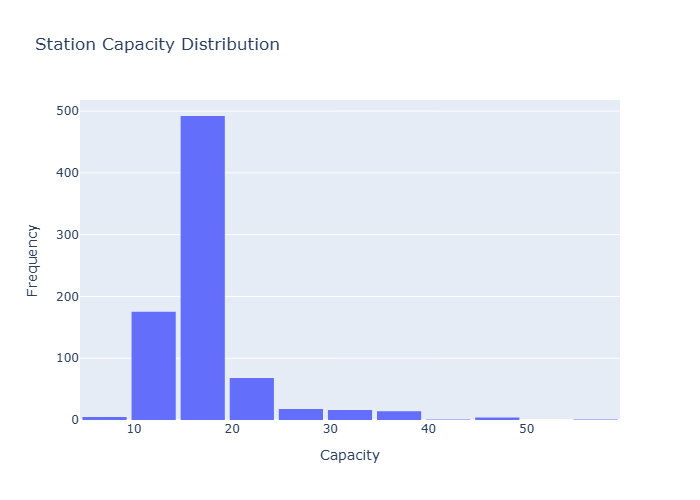

In [20]:
fig = px.histogram(
    stations,
    x='CAPACITY',
    nbins=20,
    title='Station Capacity Distribution',
    labels={'CAPACITY': 'Station Capacity'},
    color_discrete_sequence=['#636EFA']
)

fig.update_layout(
    bargap=0.1,
    xaxis_title='Capacity',
    yaxis_title='Frequency'
)

img_bytes=fig.to_image(format="png")
fig.write_image("capacity.png")  
Image(img_bytes)


In [21]:
# تابع تصنيف الرحلات تبعاً لسعتها وطباعة أول 10 صفوف
def segment_capacity(cap):
    if cap <= 15:
        return 'Small'
    elif cap <= 24:
        return 'Medium'
    else:
        return 'Large'

stations['capacity_category'] = stations['CAPACITY'].apply(segment_capacity)
stations[['CAPACITY','capacity_category']].head(10)

CAPACITY capacity_category
0        25             Large
1        19            Medium
2        19            Medium
3        24            Medium
4        15             Small
5        15             Small
6        16            Medium
7        27             Large
8        15             Small
9        15             Small

### <div dir="rtl">عملية تصنيف للطقس لثلاث فئات<div>

In [22]:
# نستطلع القيم الموجودة ونتحقق من القيم المفقودة
weather['conditions'].isnull().sum()

20

In [23]:
#نملأ الأسطر التي تحتوي على قيم محذوفة بالقيمة الأكثر وهي غائم جزئياً 
weather['conditions'].fillna('Partially cloudy', inplace=True)

In [24]:
# تابع لتصنيف الطقس
def bining_weather(condition):
    condition = condition.lower()

    if 'clear' in condition:
        return 'Sunny'
    elif 'cloud' in condition or 'overcast' in condition:
        return 'Cloudy'
    elif 'rain' in condition:
        return 'Rainy'
    else:
        return 'Cloudy'  # Fallback for unknown combos like snow


In [25]:
weather['weather_category'] = weather['conditions'].apply(bining_weather)
weather['weather_category'].value_counts()

weather_category
Cloudy    5683871
Sunny      425644
Name: count, dtype: int64

### <div dir="rtl">بناء سمة المدة الإجمالية للرحلة <div>

In [18]:
# حساب مدة الرحلة بالدقائق
weather['trip_duration_minutes'] = (
    (pd.to_datetime(weather['ended_at']) - 
     pd.to_datetime(weather['started_at'])).dt.total_seconds() / 60
).round(2)

In [19]:
print(weather[['started_at', 'ended_at', 'trip_duration_minutes']].head())

           started_at            ended_at  trip_duration_minutes
0 2024-01-25 15:49:59 2024-01-25 15:52:35                   2.60
1 2024-01-02 16:44:58 2024-01-02 16:53:25                   8.45
2 2024-01-24 15:40:15 2024-01-24 15:43:55                   3.67
3 2024-01-04 15:35:00 2024-01-04 15:37:35                   2.58
4 2024-01-05 12:27:58 2024-01-05 12:35:40                   7.70


In [22]:
#التحقق من عدم وجود قيم سالبة
negative_durations = weather[weather['trip_duration_minutes'] < 0]
if not negative_durations.empty:
    print(f"تحذير: يوجد {len(negative_durations)} رحلة بمدة زمنية سالبة!")

تحذير: يوجد 336 رحلة بمدة زمنية سالبة!


<div dir="rtl">نعالج القيم السالبة على اعتبار انه تم التبديل بين تاريخ البداية والنهاية<div>

In [25]:
# تحديد الرحلات ذات المدة السالبة
negative_mask = weather['trip_duration_minutes'] < 0

# ضرب القيم السالبة في -1 لتصحيحها
weather.loc[negative_mask, 'trip_duration_minutes'] = (
    weather.loc[negative_mask, 'trip_duration_minutes'] * -1
)


In [27]:
#اعادة التحقق
print("عدد الرحلات السالبة بعد التصحيح:", 
      len(weather[weather['trip_duration_minutes'] < 0]))

عدد الرحلات السالبة بعد التصحيح: 0


### <div dir="rtl">بناء سمة التكلفة الإجمالية للرحلة <div>

<div dir="rtl">قبل بناء سمة التكلفة الاجمالية سوف نضيف على الداتا سمة is_cbd والتي تعبر ان كانت الرحلة بدأت أو انتهت بمحطات المنطقة التجارية الرئيسية لانه من ضمن شروط التكلفة يوجد ضريبة اضافية عند استعمال محطات المنطقة التجارية الرئيسية<div>

In [39]:
#تحميل بيانات CBD وتحويلها للإسقاط المتري
cbd = gpd.read_file("DDOT_Central_Business_District_Processed.geojson").to_crs("EPSG:6933")

#استخراج المضلع
cbd_polygon = cbd.geometry.iloc[0]

# تحويل بيانات الرحلات إلى GeoDataFrame مع الإسقاط المتري
start_points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        weather['start_lng'], 
        weather['start_lat'],
        crs="EPSG:4326"  
    ).to_crs("EPSG:6933")  
)

end_points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        weather['end_lng'], 
        weather['end_lat'],
        crs="EPSG:4326"
    ).to_crs("EPSG:6933")
)

#التحقق من وجود النقاط في المضلع
weather['is_cbd'] = (
    start_points.within(cbd_polygon) | 
    end_points.within(cbd_polygon)
)

In [40]:
print(f"الرحلات التي تمر عبر المنطقة التجارية: {weather['is_cbd'].sum()}")
weather[['ride_id', 'is_cbd']].head()

الرحلات التي تمر عبر المنطقة التجارية: 1776408


ride_id  is_cbd
0  748A93D7DE8A41CD   False
1  75CBFD136F06305B   False
2  0536C9720F87E04C   False
3  9E17390C218783B5   False
4  00727D0E773CDFF7    True

In [41]:
#تصحيح نوع البيانات لتجنت خطأ 
weather['member_casual'] = weather['member_casual'].astype(str)
weather['rideable_type'] = weather['rideable_type'].astype(str)

#حساب التكلفة الاساسية
conditions = [
    # حالة 1: عضو ورحلة ≤ 45 دقيقة
    ((weather['member_casual'] == 'member') & 
     (weather['trip_duration_minutes'] <= 45)),
    
    # حالة 2: عضو ورحلة > 45 دقيقة + دراجة كلاسيكية
    ((weather['member_casual'] == 'member') & 
     (weather['trip_duration_minutes'] > 45) &
     (weather['rideable_type'] == 'classic_bike')),
    
    # حالة 3: عضو ورحلة > 45 دقيقة + دراجة كهربائية
    ((weather['member_casual'] == 'member') & 
     (weather['trip_duration_minutes'] > 45) &
     (weather['rideable_type'] == 'electric_bike')),
    
    # حالة 4: غير عضو + دراجة كلاسيكية
    ((weather['member_casual'] == 'casual') & 
     (weather['rideable_type'] == 'classic_bike')),
    
    # حالة 5: غير عضو + دراجة كهربائية
    ((weather['member_casual'] == 'casual') & 
     (weather['rideable_type'] == 'electric_bike'))
]

choices = [
    3.95,  # حالة 1
    3.95 + 0.05 * (weather['trip_duration_minutes'] - 45),  # حالة 2
    3.95 + 0.10 * (weather['trip_duration_minutes'] - 45),  # حالة 3
    1.00 + 0.05 * weather['trip_duration_minutes'],  # حالة 4
    1.00 + 0.15 * weather['trip_duration_minutes']   # حالة 5
]

weather['base_cost'] = np.select(conditions, choices, default=0)

# الضرائب الإضافية
weather['total_cost'] = (
    weather['base_cost'] +
    0.5 * weather['is_cbd']+  # ضريبة CBD
    3.0 * (weather['trip_duration_minutes'] >= 1440)  # ضريبة اليوم الكامل
).round(2)

In [42]:
# عرض عينة من النتائج
weather[['member_casual', 'rideable_type', 'trip_duration_minutes', 
                         'is_cbd', 'base_cost', 'total_cost']].head()

member_casual  rideable_type  trip_duration_minutes  is_cbd  base_cost  \
0        member   classic_bike                   2.60   False      3.950   
1        member   classic_bike                   8.45   False      3.950   
2        member   classic_bike                   3.67   False      3.950   
3        member   classic_bike                   2.58   False      3.950   
4        casual  electric_bike                   7.70    True      2.155   

   total_cost  
0        3.95  
1        3.95  
2        3.95  
3        3.95  
4        2.66

### <div dir="rtl">حساب المسافة لأقرب موقف حافلة وأقرب موقف مترو عند الانطلاق وعند الانتهاء<div>

In [45]:
#تحميل البيانات وتحويلها للإسقاط المتري (EPSG:6933)
metro_stops = gpd.read_file("Metro_Bus_Stops_Processed.geojson").to_crs("EPSG:6933")
bus_stops = gpd.read_file("Shuttle_Bus_Stops_Processed.geojson").to_crs("EPSG:6933")

#تحويل نقاط الرحلات إلى GeoDataFrame
gdf_start = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        weather['start_lng'],
        weather['start_lat'],
        crs="EPSG:4326"
    ).to_crs("EPSG:6933"),
    index=weather.index
)

gdf_end = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        weather['end_lng'],
        weather['end_lat'],
        crs="EPSG:4326"
    ).to_crs("EPSG:6933"),
    index=weather.index
)

def add_nearest_distances(gdf_points, stops):
    nearest = gpd.sjoin_nearest(
        gdf_points,
        stops[['geometry']],
        how='left',
        distance_col='distance_m'
    )
    # تجميع النتائج إذا كانت هناك مكررات
    # هذا لان الخوارزمية قد تعيد أكثر من أقرب موقف إذا كانت المسافات متساوية.
    nearest = nearest.groupby(nearest.index).first()
    return nearest['distance_m'].round(2)

#حساب المسافات
weather['start_nearest_bus_dist'] = add_nearest_distances(gdf_start, bus_stops)
weather['start_nearest_metro_dist'] = add_nearest_distances(gdf_start, metro_stops)
weather['end_nearest_bus_dist'] = add_nearest_distances(gdf_end, bus_stops)
weather['end_nearest_metro_dist'] = add_nearest_distances(gdf_end, metro_stops)

weather[[
    'ride_id',
    'start_station_name', 
    'start_nearest_bus_dist',
    'start_nearest_metro_dist',
    'end_station_name',
    'end_nearest_bus_dist',
    'end_nearest_metro_dist'
]].head()

ride_id start_station_name  start_nearest_bus_dist  \
0  748A93D7DE8A41CD        1st o st nw                  668.85   
1  75CBFD136F06305B        1st o st nw                  668.85   
2  0536C9720F87E04C        1st o st nw                  668.85   
3  9E17390C218783B5        1st o st nw                  668.85   
4  00727D0E773CDFF7        1st o st nw                  674.68   

   start_nearest_metro_dist   end_station_name  end_nearest_bus_dist  \
0                    317.23        1st l st nw                238.25   
1                    317.23  4th college st nw                614.93   
2                    317.23        1st l st nw                238.25   
3                    317.23        1st l st nw                238.25   
4                    311.02       10th g st nw                147.26   

   end_nearest_metro_dist  
0                  141.76  
1                  209.44  
2                  141.76  
3                  141.76  
4                   65.30

### <div dir="rtl">إنشاء سمة ثنائية للدلالة على ان الرحلة انطلقت او انتهت بالمنطة التجارية الرئيسية <div>

In [23]:
#تحميل بيانات CBD وتحويلها للإسقاط المتري
cbd = gpd.read_file("DDOT_Central_Business_District_Processed.geojson").to_crs("EPSG:6933")

#استخراج المضلع
cbd_polygon = cbd.geometry.iloc[0]

# تحويل بيانات الرحلات إلى GeoDataFrame مع الإسقاط المتري
start_points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        weather['start_lng'], 
        weather['start_lat'],
        crs="EPSG:4326"  
    ).to_crs("EPSG:6933")  
)

end_points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        weather['end_lng'], 
        weather['end_lat'],
        crs="EPSG:4326"
    ).to_crs("EPSG:6933")
)

# تحديد الرحلات التي تبدأ/تنتهي في CBD
start_in_cbd = start_points.within(cbd_polygon)
end_in_cbd = end_points.within(cbd_polygon)
both_in_cbd = start_in_cbd & end_in_cbd

weather['cbd'] = np.where(
    both_in_cbd,
    np.nan,  # null إذا بدأت وانتهت داخل CBD
    np.where(
        start_in_cbd,
        'start',
        np.where(
            end_in_cbd,
            'end',
            'outside'  # إذا لم تبدأ أو تنته في CBD
        )
    )
)

weather[['start_station_name', 'end_station_name', 'is_cbd','cbd']].head()


start_station_name   end_station_name  is_cbd      cbd
0        1st o st nw        1st l st nw   False  outside
1        1st o st nw  4th college st nw   False  outside
2        1st o st nw        1st l st nw   False  outside
3        1st o st nw        1st l st nw   False  outside
4        1st o st nw       10th g st nw    True      end

### <div dir="rtl">إنشاء سمة ثنائية للدلالة على أن محطة النهاية بعيدة أو قريبة من المنطقة التجارية الرئيسية<div>

In [24]:
# تحميل بيانات المنطقة التجارية CBD
cbd = gpd.read_file("DDOT_Central_Business_District_Processed.geojson").to_crs("EPSG:6933")
cbd_polygon = cbd.geometry.iloc[0]  


#استخلاص المعلومات من العمود الموجود 'cbd'
start_in_cbd = (weather['cbd'] == 'start')
end_in_cbd = (weather['cbd'] == 'end')
both_in_cbd = weather['cbd'].isna()


#تحويل نقاط نهاية الرحلات للإسقاط المتري
end_points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        weather['end_lng'],
        weather['end_lat'],
        crs="EPSG:4326"
    ).to_crs("EPSG:6933"),
    index=weather.index
)

weather['end_distance_to_cbd'] = np.where(
    end_in_cbd,
    0.0,  # إذا كانت النهاية في CBD، المسافة = 0
    end_points.distance(cbd_polygon).round(2)
)

#إنشاء السمة الثنائية (قريبة/بعيدة) مع تجاهل الرحلات الداخلية
threshold = 500  
weather['end_cbd_proximity'] = np.where(
    both_in_cbd,
    np.nan,  # إذا بدأت وانتهت في CBD
    np.where(
        weather['end_distance_to_cbd'] <= threshold,
        'near',
        'far'
    )
)

weather[['cbd', 'end_distance_to_cbd', 'end_cbd_proximity']].head()

cbd  end_distance_to_cbd end_cbd_proximity
0  outside               479.64              near
1  outside              1861.16               far
2  outside               479.64              near
3  outside               479.64              near
4      end                 0.00              near

### <div dir="rtl">تجميع المواقع الجغرافية للرحل اليومية ضمن قطاعات جغرافية <div>

In [25]:
# دالة لتطبيق Geohash على إحداثيات
def add_geohash(df, lat_col='lat', lng_col='lng', precision=6):
    df['geohash'] = df.apply(
        lambda row: pgh.encode(row[lat_col], row[lng_col], precision=precision),
        axis=1
    )
    return df

# تطبيق على بيانات الرحلات
weather = add_geohash(
    weather,
    lat_col='start_lat',
    lng_col='start_lng',
    precision=6  # دقة مناسبة لحي سكني
)

# عرض توزيع القطاعات
print(weather['geohash'].value_counts().head(10))

geohash
dqcjqg    242006
dqcjr5    196385
dqcjrn    163467
dqcjr1    161100
dqcjrh    144583
dqcjr3    143645
dqcjqc    130453
dqcjqu    129144
dqcjr9    126946
dqcjrj    124161
Name: count, dtype: int64


In [26]:
weather[['ride_id', 'start_lat', 'start_lng','geohash']].head()

ride_id  start_lat  start_lng geohash
0  748A93D7DE8A41CD  38.908642 -77.012367  dqcjre
1  75CBFD136F06305B  38.908642 -77.012367  dqcjre
2  0536C9720F87E04C  38.908642 -77.012367  dqcjre
3  9E17390C218783B5  38.908642 -77.012367  dqcjre
4  00727D0E773CDFF7  38.908691 -77.012314  dqcjre

In [27]:
#  تجميع الرحلات حسب القطاعات وعرض عدد الرحلات في كل قطاع ومتوسط مدة الرحلات في القطاع
trips_by_sector = weather.groupby('geohash').agg({
    'ride_id': 'count',
    'trip_duration_minutes': 'mean'
}).rename(columns={'ride_id': 'trip_count'})

trips_by_sector.to_csv('trips_by_sector.csv')

In [28]:
trips_by_sector.head()

trip_count  trip_duration_minutes
geohash                                   
05mbnd            1                  20.57
08dmvt            1                   7.54
0cqrm7            1                   7.66
0e80bv            1                   6.92
0kzeks            1                  10.56

### <div dir="rtl">تجزئة القطاعات الجغرافية التي حصلنا عليها إلى ثلاث فئات<div>

In [29]:
#حساب متوسط الرحلات اليومية لكل قطاع
daily_trips = weather.groupby(['geohash', 'date']).size().reset_index(name='avg_trip_count')
avg_daily_trips = daily_trips.groupby('geohash')['avg_trip_count'].mean().reset_index()

In [30]:
# تحديد الفئات باستخدام quantile
percentiles = avg_daily_trips['avg_trip_count'].quantile([0.33, 0.66]).values
avg_daily_trips['geohash_category'] = pd.cut(
    avg_daily_trips['avg_trip_count'],
    bins=[-1, percentiles[0], percentiles[1], float('inf')],
    labels=['gray', 'yellow', 'red']
)

In [31]:
avg_daily_trips.to_csv('avg_daily_trips.csv')
avg_daily_trips.head()

geohash  avg_trip_count geohash_category
0  05mbnd             1.0             gray
1  08dmvt             1.0             gray
2  0cqrm7             1.0             gray
3  0e80bv             1.0             gray
4  0kzeks             1.0             gray

### <div dir="rtl">بناء سلسلة زمنية للإيرادات اليومية الإجمالية<div>

In [55]:
#تحويل التاريخ إلى نوع datetime والتأكد من تجاهل الوقت
weather['ended_at'] = pd.to_datetime(weather['ended_at']).dt.normalize()  # .dt.normalize() يحذف جزء الوقت

#حساب الإيرادات اليومية (تجميع حسب اليوم فقط)
daily_revenue = weather.groupby('ended_at')['total_cost'].sum().reset_index()
daily_revenue.columns = ['date', 'total_revenue']

#دمج مع حالة الطقس (نأخذ الطقس السائد في اليوم)
daily_weather = weather.groupby('ended_at')['weather_category'].agg(lambda x: x.mode()[0]).reset_index()

#الدمج النهائي
time_series = pd.merge(
    daily_revenue,
    daily_weather,
    left_on='date',
    right_on='ended_at',
    how='left'
).drop(columns=['ended_at'])

#تعيين التاريخ كمفهرس للسلسلة الزمنية
time_series = time_series.set_index('date')

In [56]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 369 entries, 2000-01-01 to 2030-01-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_revenue     369 non-null    float64
 1   weather_category  369 non-null    object 
dtypes: float64(1), object(1)
memory usage: 8.6+ KB


# <div dir="rtl">مهمة 02  : الاستكشاف والتحليل<div>

## <div dir="rtl">[a] دراسة حالة الدراجات والمحطات<div>

### <div dir="rtl">تعين أكثر 5 محطات انطلاق ورسم مخطط شريطي<div>


أكثر 5 محطات انطلاق من حيث عدد الرحلات:
start_station_name_matched
Ballston Metro / Stuart St & 9th St N            18975
West Hyattsville Metro                           18128
Wilson Blvd & N Franklin Rd                      12525
Clarendon Metro / Wilson Blvd & N Highland St    11390
15th St & N Scott St                              9079
Name: count, dtype: int64

✅ تم حفظ المخطط بنجاح باسم top_5_start_stations.png


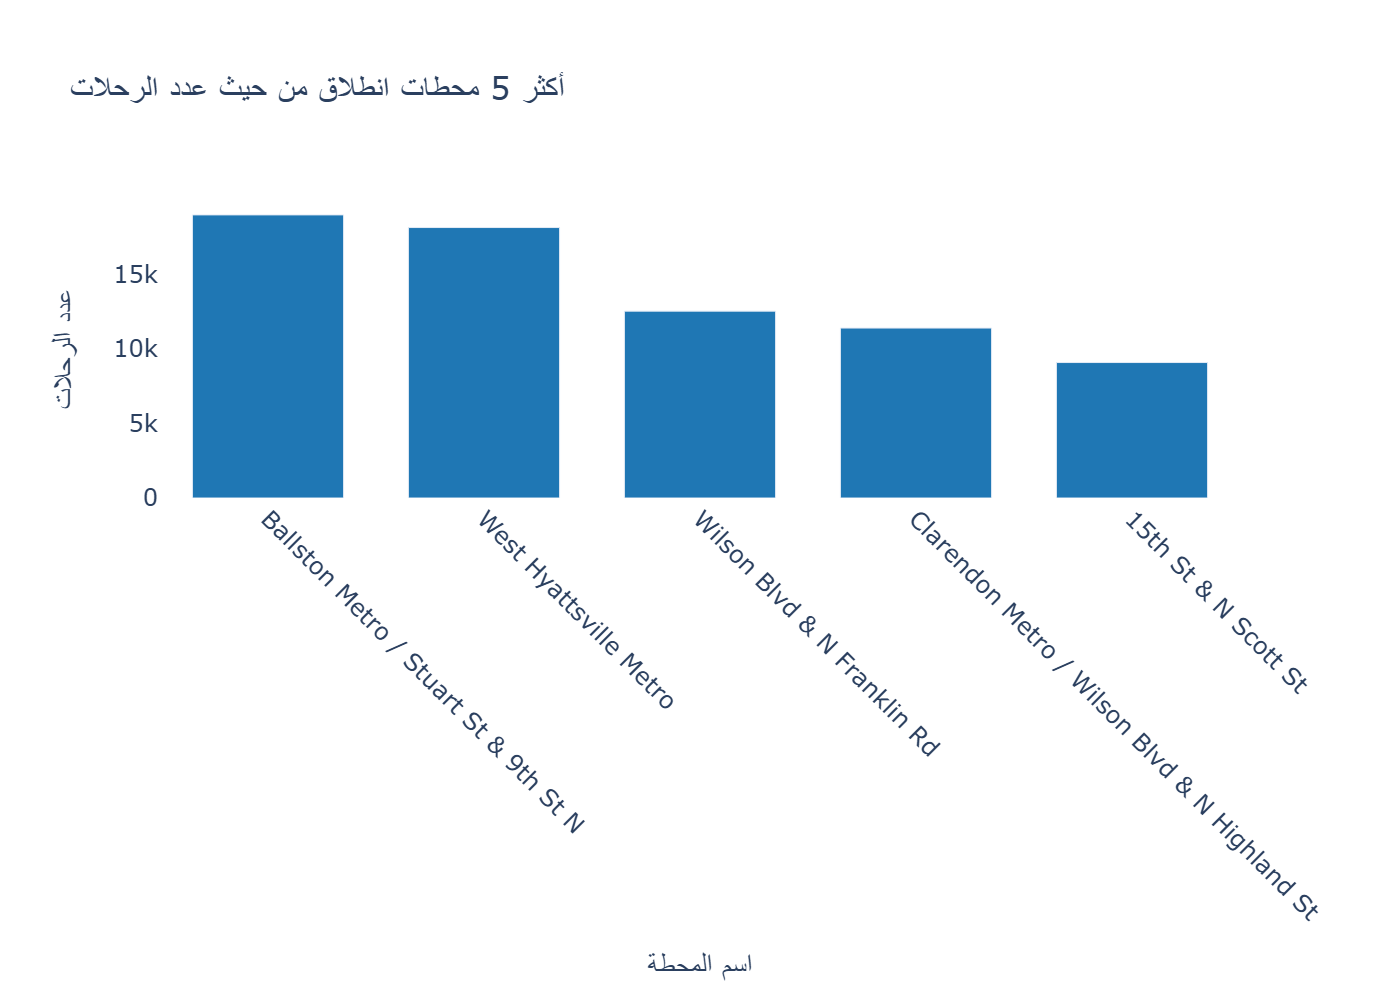

In [ ]:
# أكثر 5 محطات انطلاق من حيث عدد الرحلات
start_station_counts = trips['start_station_name_matched'].value_counts().nlargest(5)

print("\nأكثر 5 محطات انطلاق من حيث عدد الرحلات:")
print(start_station_counts)

# إعداد البيانات للمخطط
stations = start_station_counts.index.tolist()
counts = start_station_counts.values.tolist()

# رسم المخطط باستخدام plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=stations,
    y=counts,
    name='عدد الرحلات',
    marker_color='#1f77b4'
))

fig.update_layout(
    title='أكثر 5 محطات انطلاق من حيث عدد الرحلات',
    xaxis_title='اسم المحطة',
    yaxis_title='عدد الرحلات',
    xaxis_tickangle=45,
    plot_bgcolor='white',
    width=800,
    height=500,
    title_font_size=16,
    bargap=0.3
)

# اسم الملف
filename = "top_5_start_stations.png"

# حفظ وعرض الصورة
try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    
    # عرض الصورة باستخدام IPython
    display(Image(filename=filename))
    
except Exception as e:
    print(f"\n❌ حدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido باستخدام: pip install -U plotly kaleido")


<div dir="rtl">Ballston Metro / Stuart St & 9th St N هي المحطة الأكثر استخدامًا في الانطلاق، بعدد رحلات يقارب 18 ألف.<div>
<div dir="rtl">West Hyattsville Metro تأتي في المركز الثاني بعدد مشابه تقريبًا.<div>
<div dir="rtl">المحطات التالية (مثل Wilson Blvd وClarendon Metro) لها عدد رحلات أقل نسبيًا، لكنها لا تزال من بين الأعلى.<div>
<div dir="rtl">الفرق بين المحطة الأولى والخامسة واضح، مما يشير إلى أن بعض المحطات أكثر جذبًا من غيرها كبداية للرحلات.<div>

### <div dir="rtl">توزع عدد رحلات حسب نوع الدراجة ونوع الاشتراك مع مخطط شريطي<div>


=== تحليل توزيع عدد الرحلات حسب نوع الدراجة ونوع الاشتراك ===

توزيع عدد الرحلات حسب نوع الدراجة ونوع الاشتراك:
member_casual   casual   member
rideable_type                  
classic_bike    943494  1761221
electric_bike  1108184  2296616

✅ تم حفظ المخطط بنجاح باسم ride_type_member_distribution.png


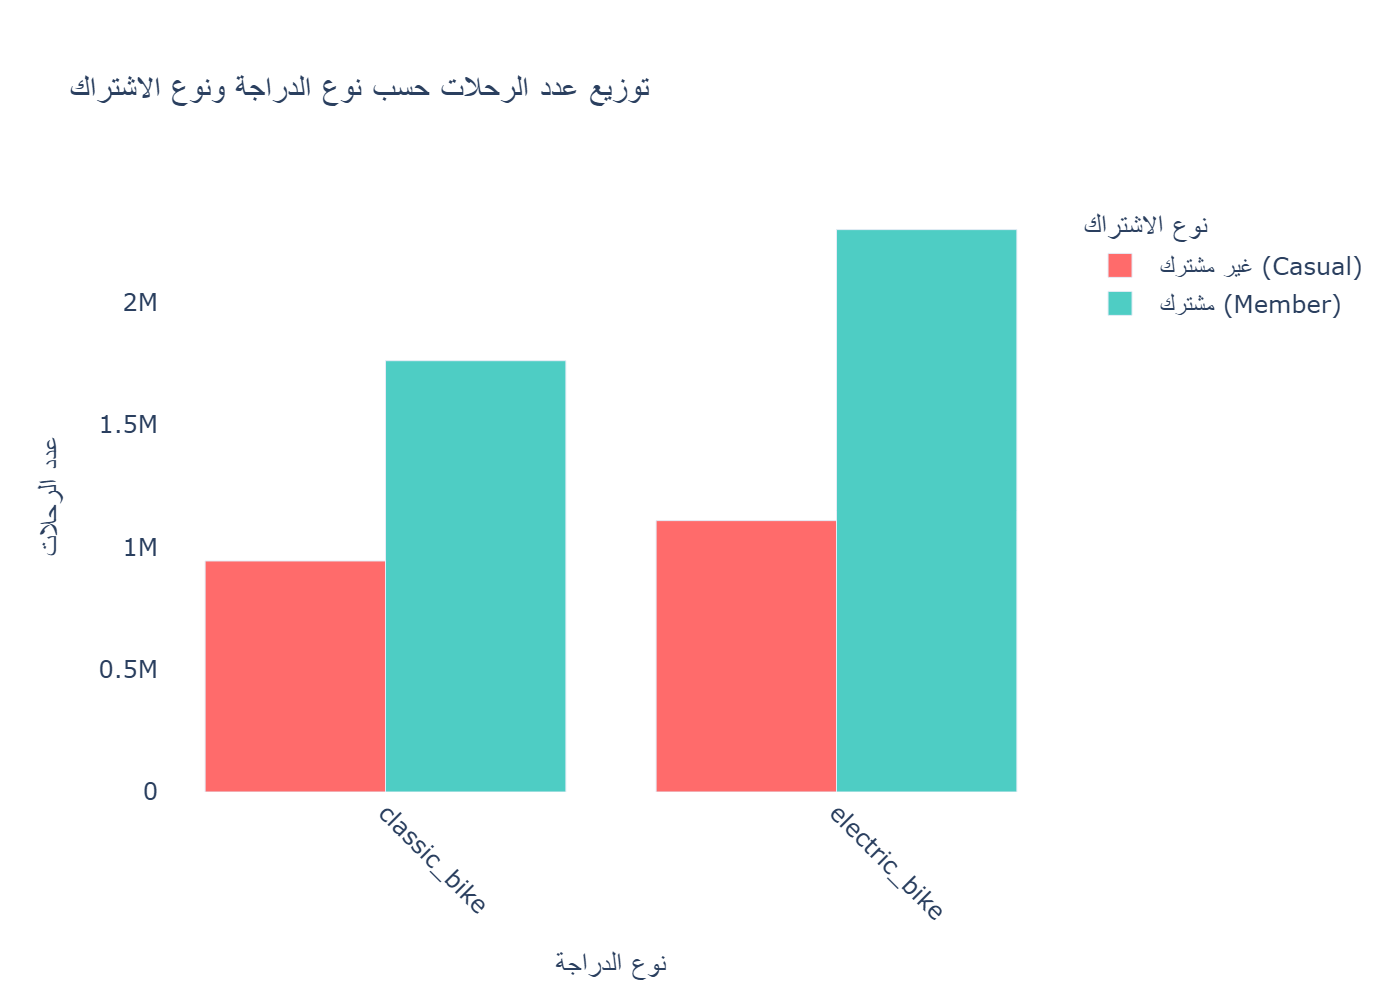

In [45]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import Image, display
print("\n=== تحليل توزيع عدد الرحلات حسب نوع الدراجة ونوع الاشتراك ===")

# حساب توزيع الرحلات حسب نوع الدراجة ونوع الاشتراك (افتراض أن trips موجود)
ride_type_member_dist = pd.crosstab(trips['rideable_type'], trips['member_casual'])

print("\nتوزيع عدد الرحلات حسب نوع الدراجة ونوع الاشتراك:")
print(ride_type_member_dist)

# إعداد البيانات للمخطط
categories = ride_type_member_dist.index
casual_values = ride_type_member_dist['casual']
member_values = ride_type_member_dist['member']

# إنشاء مخطط شريطي باستخدام plotly.graph_objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=categories,
    y=casual_values,
    name='غير مشترك (Casual)',
    marker_color='#FF6B6B'  # لون وردي فاتح للتمييز
))

fig.add_trace(go.Bar(
    x=categories,
    y=member_values,
    name='مشترك (Member)',
    marker_color='#4ECDC4'  # لون تركوازي للتمييز
))

# إعداد التنسيق المحسن
fig.update_layout(
    title='توزيع عدد الرحلات حسب نوع الدراجة ونوع الاشتراك',
    xaxis_title='نوع الدراجة',
    yaxis_title='عدد الرحلات',
    barmode='group',
    legend_title='نوع الاشتراك',
    xaxis=dict(tickangle=45, tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    title_font_size=16,
    width=900,
    height=600,
    plot_bgcolor='white',  # خلفية بيضاء لتحسين الوضوح
    bargap=0.2  # مسافة بين الأشرطة
)
filename = "ride_type_member_distribution.png"
try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    display(Image(filename=filename))
except Exception as e:
    print(f"\nحدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido وترقية plotly باستخدام: pip install --upgrade plotly kaleido")

<div dir="rtl">المشتركون (Members) قاموا بعدد أكبر بكثير من الرحلات مقارنة بغير المشتركين، سواء على الدراجات التقليدية أو الكهربائية.<div>
<div dir="rtl">كلا الفئتين (مشترك وغير مشترك) يستخدمون الدراجات الكهربائية أكثر من الدراجات التقليدية، لكن الفرق أوضح عند المشتركين.<div>
<div dir="rtl">أكثر نوع مستخدم من الدراجات هو electric_bike من قبل المشتركين.<div>

### <div dir="rtl">sunburst مخطط يعرض توزع الرحلات حسب نوع الدرجة ونوع الرحلة ونوع الاشتراك لأكثر من 5محطات انطلاق<div>

C:\Users\User\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




✅ تم حفظ المخطط بنجاح باسم sunburst_top5_stations.png


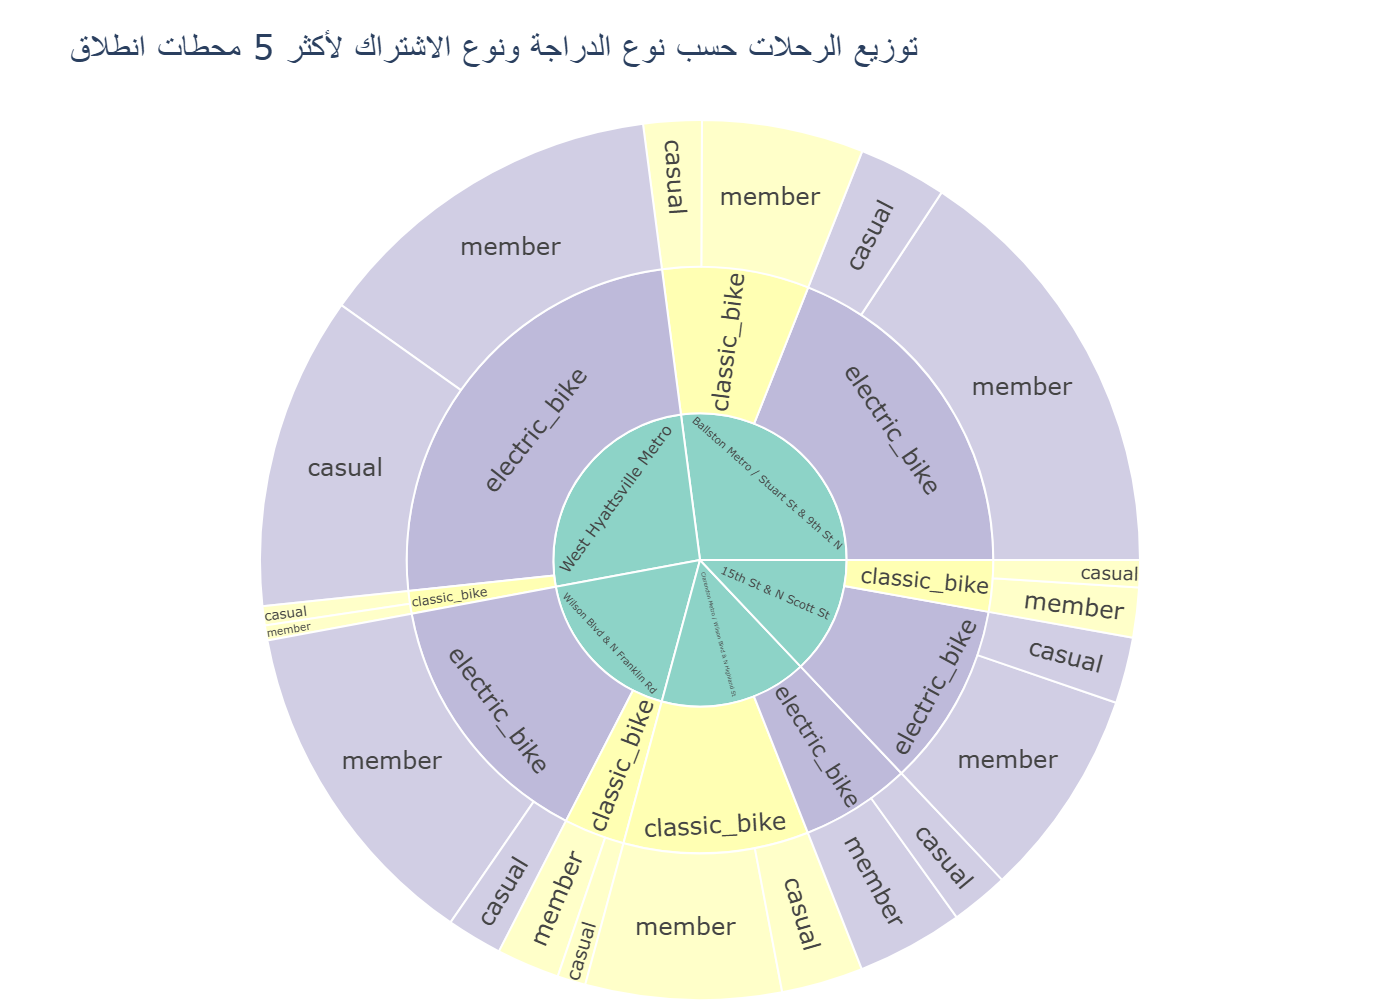

In [48]:
import pandas as pd
import plotly.express as px
from IPython.display import Image, display
# تأكد أن trips يحتوي على الأعمدة التالية:
# 'start_station_name_matched', 'rideable_type', 'member_casual'

# اختيار أكثر 5 محطات انطلاق نشاطًا
top_stations = (
    trips['start_station_name_matched']
    .value_counts()
    .head(5)
    .index
)

# تصفية البيانات لهذه المحطات فقط
filtered_df = trips[trips['start_station_name_matched'].isin(top_stations)]

# إنشاء عمود للعد
filtered_df['trip_count'] = 1

# إنشاء Sunburst chart
fig = px.sunburst(
    filtered_df,
    path=['start_station_name_matched', 'rideable_type', 'member_casual'],
    values='trip_count',
    color='rideable_type',
    color_discrete_sequence=px.colors.qualitative.Set3,
    title='توزيع الرحلات حسب نوع الدراجة ونوع الاشتراك لأكثر 5 محطات انطلاق'
)

# تنسيق الشكل
fig.update_layout(
    width=800,
    height=700,
    margin=dict(t=60, l=0, r=0, b=0)
)
filename = "sunburst_top5_stations.png"
try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    display(Image(filename=filename))
except Exception as e:
    print(f"❌ حدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido باستخدام: pip install -U kaleido")

<div dir="rtl"> الدراجات الكهربائية (electric_bike) هي الأكثر استخدامًا في جميع المحطات تقريبًا.<div>
<div dir="rtl">المشتركون (member) يسيطرون على أغلب الرحلات في المحطات الخمس، خاصةً عند استخدام الدراجات الكهربائية.<div>
<div dir="rtl"> المحطة West Hyattsville Metro تشهد أكبر عدد رحلات بشكل عام، خصوصًا من المشتركين على الدراجات الكهربائية.<div>
<div dir="rtl"> المحطة Ballston Metro / Stuart St & 9th St N يظهر فيها توازن ملحوظ بين المشتركين وغير المشتركين مقارنة بالمحطات الأخرى.<div>
<div dir="rtl"> المحطات الأخرى مثل Wilson Blvd & N Franklin Rd وClarendon Metro / Wilson Blvd & N Highland St تُظهر أيضًا تفوقًا واضحًا لرحلات المشتركين على الدراجات الكهربائية<div>


### <div dir="rtl">رسم مخطط Histogram يعرض توزع سعة المحطات الدرجات ورسم مخطط bar  يعرض توزع الرحل حسب فئة سعة محطة الانطلاق والانتهاء<div>

In [113]:
import geopandas as gpd
stations_gdf = gpd.read_file('Merged_Capital_Bikeshare_Parking_Zones.geojson')


=== توزيع سعة محطات الدراجات ===

توزيع سعة المحطات:
CAPACITY
(7.953, 17.4]    457
(17.4, 26.8]     287
(26.8, 36.2]      38
(36.2, 45.6]       7
(45.6, 55.0]       5
Name: count, dtype: int64

✅ تم حفظ المخطط بنجاح باسم station_capacity_distribution.png


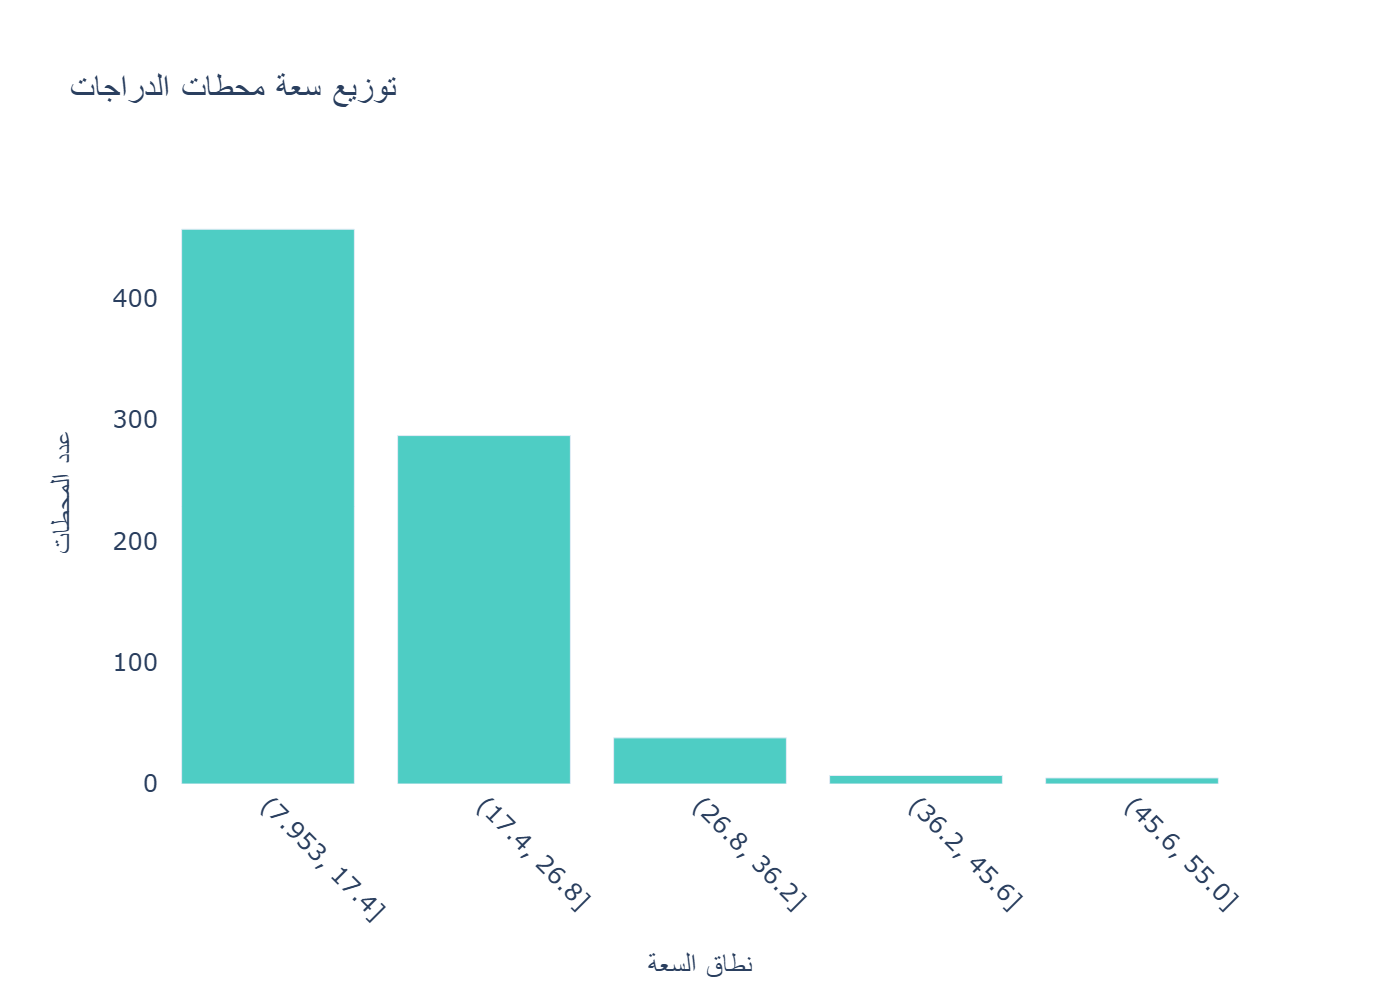

In [57]:
import pandas as pd
import plotly.graph_objects as go

print("\n=== توزيع سعة محطات الدراجات ===")

capacities = stations_gdf['CAPACITY'].dropna()

capacity_bins = pd.cut(capacities, bins=5)  # تقسيم السعات إلى 5 فئات
capacity_dist = capacity_bins.value_counts().sort_index()

print("\nتوزيع سعة المحطات:")
print(capacity_dist)

# إنشاء مخطط شريطي
fig = go.Figure()
fig.add_trace(go.Bar(
    x=capacity_dist.index.astype(str),  # تحويل الفئات إلى نصوص
    y=capacity_dist.values,
    marker_color='#4ECDC4'
))

fig.update_layout(
    title='توزيع سعة محطات الدراجات',
    xaxis_title='نطاق السعة',
    yaxis_title='عدد المحطات',
    xaxis=dict(tickangle=45),
    width=800,
    height=500,
    plot_bgcolor='white'
)

filename = "station_capacity_distribution.png"

try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    display(Image(filename=filename))
    
except Exception as e:
    print(f"\nحدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido وترقية plotly باستخدام: pip install --upgrade plotly kaleido")

<div dir="rtl">الدراجة الكلاسيكية: عدد الأحداث لأعضاء الاشتراك أعلى بشكل ملحوظ مقارنةً بغير الأعضاء.<div>
<div dir="rtl">الدراجة الكهربائية: الفجوة بين عدد الأحداث لأعضاء الاشتراك وغير الأعضاء أقل، مما يدل على اهتمام أكبر من غير الأعضاء بهذا النوع.<div>
<div dir="rtl">يظهر أن العضوية تؤثر بشكل أكبر في استخدام الدراجة الكلاسيكية، بينما الدراجة الكهربائية تجذب كل من الأعضاء وغير الأعضاء بشكل متقارب.<div>


## <div dir="rtl"> [b] دراسة مدة الرحلة<div>

### <div dir="rtl">.  رسم مخطط Histogram يعرض توزع مدة الرحلة بالدقائق 
 <div>

<div dir="rtl"> لتحديد العدد المناسب من ال bins نستعين بالمعلومات الاحصائية الاساسية لمعرفة مجال القيم تقريباً<div>

In [29]:
weather['trip_duration_minutes'].value_counts().head(20)


trip_duration_minutes
4.98    5146
5.12    5109
4.97    5109
5.00    5100
5.38    5099
4.78    5071
5.62    5069
4.63    5068
5.22    5066
5.63    5066
5.02    5064
5.08    5062
5.35    5060
5.18    5050
5.23    5045
5.42    5041
5.72    5041
5.17    5036
4.75    5034
4.88    5032
Name: count, dtype: int64

In [30]:
weather['trip_duration_minutes'].describe()

count    6.109515e+06
mean     1.269215e+02
std      5.313411e+04
min      0.000000e+00
25%      5.580000e+00
50%      9.740000e+00
75%      1.676000e+01
max      2.891464e+07
Name: trip_duration_minutes, dtype: float64

<div dir="rtl">نلاحظ وجود قيمة شاذة عند القيمة العظمى max ما يعادل من الوقت 60 سنة وهذا غير واقعي، لذا نتحقق من قائمة قيم الرحلات تنازلياً لاكتشاف وتحديد جميع القيم الشاذة ومعرفة القيمة العظمى الفعلية<div>

In [34]:
weather = weather[weather['trip_duration_minutes'] <= 2000]
weather = weather[weather['trip_duration_minutes'] > 0]

In [35]:
# التأكد من البيانات بعد عملية الفلترة
weather['trip_duration_minutes'].describe()

count    6.108649e+06
mean     1.525634e+01
std      3.144317e+01
min      1.000000e-02
25%      5.580000e+00
50%      9.740000e+00
75%      1.676000e+01
max      1.559930e+03
Name: trip_duration_minutes, dtype: float64

<div dir="rtl">نلاحظ ان القيم هي عشرية أي دقائق وثواني وأجزاء ثواني,لذا نقوم بتقريبها لسهولة التعامل معها وتمثيلها<div>

In [38]:
weather['trip_duration_rounded'] = weather['trip_duration_minutes'].round().astype(int)

<div dir="rtl">لاحصاء تمركز وتوزيع القيم، نلاحظ أن معظم القيم تتمركز في المجال بين 2 دقيقة إلى  20 دقيقة <div>

In [41]:
weather['trip_duration_rounded'].value_counts().head(20)


trip_duration_rounded
6     407210
5     402644
4     388837
7     381912
8     367462
9     329408
3     310215
10    307587
11    271240
12    249353
13    216983
2     212068
14    197632
15    171814
16    155012
17    133052
18    120970
19    104551
1     103465
20     95421
Name: count, dtype: int64

<div dir="rtl"> نقوم بتصنيف الرحلات تباعاً إلى رحلات عادية ورحلات طويلة نظراً لأن هناك فجوة بين قيم مدة الرحلات والتي معظمها يتفاوت بين 2د إلى 120 د ومن ثم رسمها <div>

In [44]:
normal_trips = weather[weather['trip_duration_rounded'] <= 120]
long_trips = weather[weather['trip_duration_rounded'] > 120]

<div dir="rtl">اعتماداً على تصنيف الرحلات, نقوم بتحديد nbins=24 وذلك لكي يتم عرض توزيع الرحلات كل 5د <div>

In [77]:
fig1 = px.histogram(
    normal_trips,
    x='trip_duration_rounded',
    nbins=24,  #each 5 min
    title='Trip Duration Distribution (Up to 2 Hours)',
    labels={'trip_duration_rounded': 'Trip Duration (Minutes)'},
    color_discrete_sequence=['#00BFC4']
)

fig1.write_image("histogram_normal_trip_duration.png")

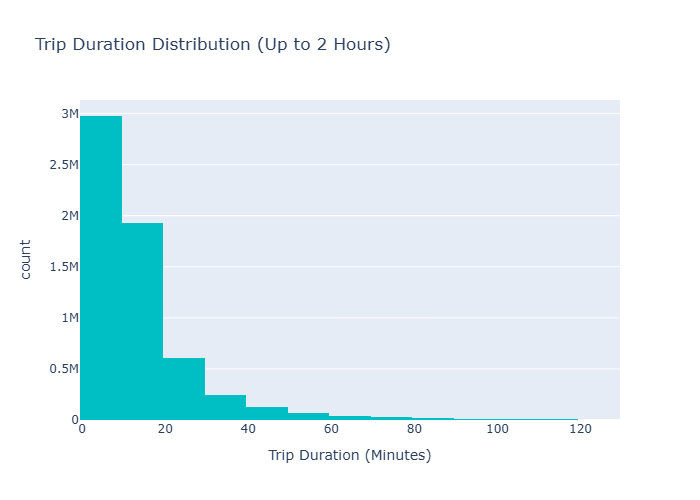

In [40]:
display(Image("histogram_normal_trip_duration.png"))

<div dir="rtl">اعتماداً على تصنيف الرحلات, نقوم بتحديد nbins=47 للرحلات الطويلة وذلك لكي يتم عرض توزيع الرحلات كل 30د <div>

In [42]:
fig2 = px.histogram(
    long_trips,
    x='trip_duration_rounded',
    nbins=47,  # each 30min
    title='Trip Duration Distribution (Over 2 Hours)',
    labels={'trip_duration_rounded': 'Trip Duration (Minutes)'},
    color_discrete_sequence=['#F8766D']
)

fig2.write_image("histogram_long_trip_duration.png")


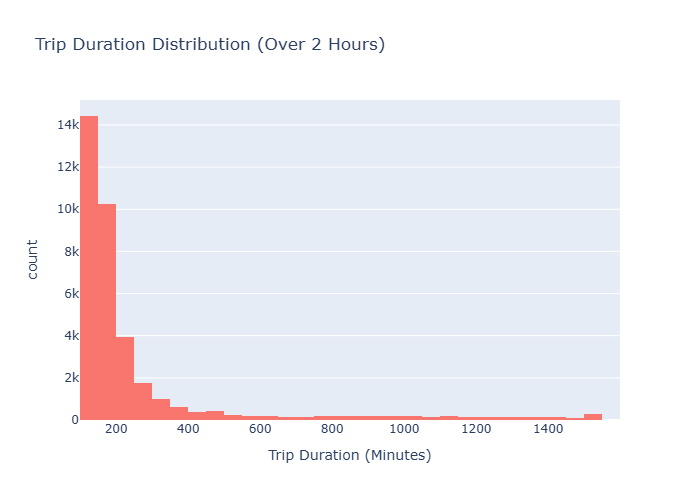

In [46]:
display(Image("histogram_long_trip_duration.png"))

### <div dir="rtl">ماذا تستنج؟ <div>

<div dir="rtl"> من المخططات السابقة لاحظنا أن معظم سائقي الدراجات يقومون برحلات قصيرة وقليل منهم رحلات طويلة, وبالتالي فإن عدد الدراجات المتاحة يتجدد كل 10 دقائق تقريباً في المحطات المختلفة وفي حال وجود نسبة كبيرة من الاشخاص الذين يقومون برحلات طويلة في نفس المحطة فنجد ضرورة لتوفير عدد أكبر من الدراجات, ونستنتج أن هناك احتمال أن يوجد عينة من الأشخاص يقومون بتجربة قيادة الدراجات ولذلك مدة رحلاتهم قصيرة ونستطيع الاستفادة من هذه المعلومات في حال التخطيط للأنشطة والفعاليات التعليمية وغيرها  <div>

### <div dir="rtl">رسم مخطط صندوقي Box يعرض توزع مدة الرحلة بالدقائق حسب نوع الدراجة
<div>

<div dir="rtl">أكملنا رسم المخططات تباعاً للتصنيف السابق لتسهيل عملية تحليل البيانات وقراءة المخططات<div>

In [ ]:
fig3 = px.box(
    normal_trips,  
    x='rideable_type',
    y='trip_duration_rounded',
    title='Trip Duration by Bike Type',
    labels={
        'rideable_type': 'Bike Type',
        'trip_duration_rounded': 'Trip Duration (Minutes)'
    },
    color='rideable_type',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig3.write_image("box_plot_trip_duration_bike_type.png")

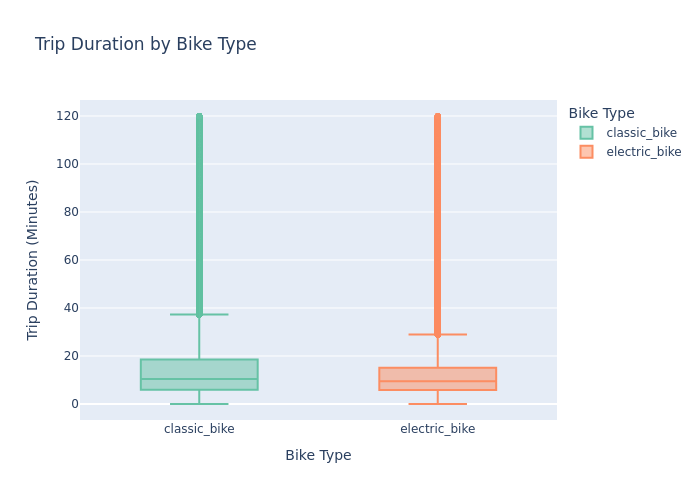

In [46]:
display(Image("box_plot_trip_duration_bike_type.png"))

In [ ]:
fig4 = px.box(
    long_trips,  
    x='rideable_type',
    y='trip_duration_rounded',
    title='Trip Duration by Bike Type',
    labels={
        'rideable_type': 'Bike Type',
        'trip_duration_rounded': 'Trip Duration (Minutes)'
    },
    color='rideable_type',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig4.write_image("box_plot_long_trip_duration_bike_type.png")

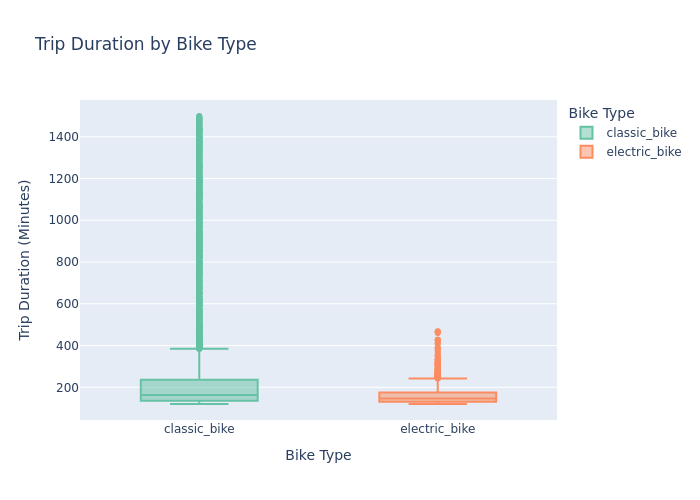

In [48]:
display(Image("box_plot_long_trip_duration_bike_type.png"))

### <div dir="rtl">ماذا تستنج؟ <div>

<div dir="rtl"> نلاحظ أن من يقود الدراجات الكهربائية تكون رحلاته مدتها أقصر وأسرع, قد يكون ذلك لضرورات المواعيد وبالتالي لها حاجة أكبر ان كانت اسرع ومن المهم توفير عدد جيد منها، اما الدراجات العادية ف يكثر استخدامها للرحلات الطويلة، قد يكون ذلك للتفضيل الشخصي او لوفرتها او لسهولة استعمالها بدون الاعتماد على طاقتها الكهربائية والشحن أو حتى لأنها قد تكون أرخص<div>

### <div dir="rtl"> رسم مخطط صندوقي Box يعرض توزع مدة الرحلة بالدقائق حسب نوع الاشتراك
<div>

In [ ]:
fig5 = px.box(
    normal_trips, 
    x='member_casual',
    y='trip_duration_rounded',
    title='Trip Duration by Membership Type',
    labels={
        'member_casual': 'Member Type',
        'trip_duration_rounded': 'Trip Duration (Minutes)'
    },
    color='member_casual',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig5.write_image("box_plot_member_trip_duration.png")


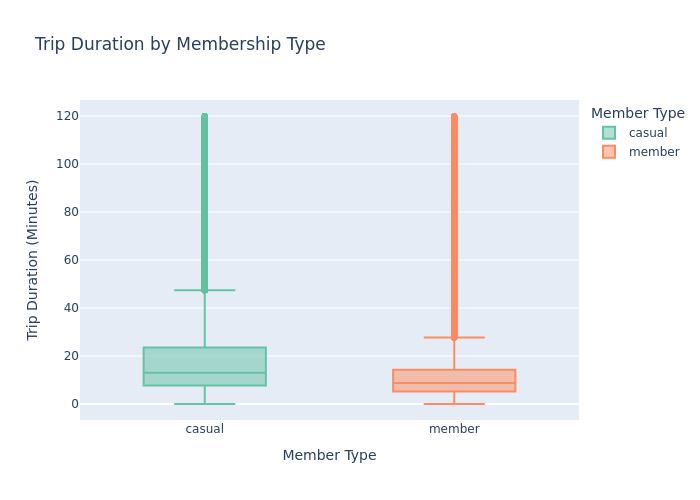

In [50]:
display(Image("box_plot_member_trip_duration.png"))

In [ ]:
fig6 = px.box(
    long_trips, 
    x='member_casual',
    y='trip_duration_rounded',
    title='Trip Duration by Membership Type',
    labels={
        'member_casual': 'Member Type',
        'trip_duration_rounded': 'Trip Duration (Minutes)'
    },
    color='member_casual',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig6.write_image("box_plot_member_long_trip_duration.png")


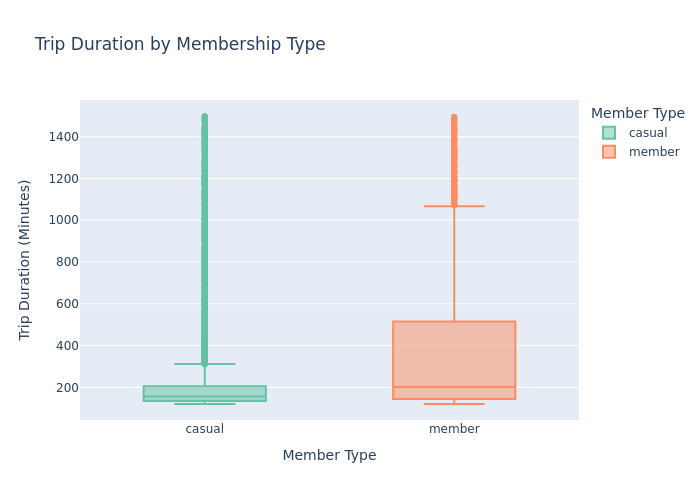

In [52]:
display(Image("box_plot_member_long_trip_duration.png"))

### <div dir="rtl">ماذا تستنج؟ <div>

<div dir="rtl">في الرحلات التي تتجاوز الساعتين نلاحظ أن قليل من المشتركين يستخدمون الدراجات للرحلات القصيرة بل متوسط مدة رحلاتهم تفوق بفرق واضح متوسط مدة رحلات غير المشتركين، وبالتالي قد يكون المشتركين من الفئة الرياضية، نلاحظ في مخطط أقل من ساعتين فإن النسبة الأكبر من السائقين هم من غير المشتركين والتي متوسط مدة رحلاتهم حوالي ال 15د وبشكل عام فإن المخططات تظهر تنوع كبير وتوزيع شامل في كل من الفئتين     <div>

### <div dir="rtl"> تعيين مجموعة الرحلات التي تجاوزت مدتها اليوم الواحد ورسم محطات الدراجات ضمن خريطة تعرض واشنطن العاصمة بتحديد حجم النقطة تبعا لعدد الرحلات تجاوزت مدة يوم) التي استقبلتها (مجموع الانطلاق والانتهاء)<div>


In [54]:
over_day = weather[weather['trip_duration_rounded'] > 1440]
print(f"Number of Trips lasted for over 24 hours (1 day): {len(over_day['trip_duration_rounded'])}")
over_day.head(5)


Number of Trips lasted for over 24 hours (1 day): 388


ride_id rideable_type          started_at            ended_at  \
14742  45ECB714FB05AE24  classic_bike 2024-01-25 11:18:14 2024-01-26 12:10:40   
23974  39F7EA3B307BA4EA  classic_bike 2024-01-22 08:23:19 2024-01-23 09:23:00   
45519  AD11CE697E5DC9BF  classic_bike 2024-01-06 09:30:13 2024-01-07 10:29:58   
59078  5F2FAB798BF9D285  classic_bike 2024-01-01 00:28:09 2024-01-02 01:28:00   
59105  1A12B3C3584C9759  classic_bike 2024-01-24 15:23:38 2024-01-25 16:23:30   

                             start_station_name start_station_id  \
14742               kenilworth terr hayes st ne            31717   
23974  tenleytown wisconsin ave albemarle st nw            31303   
45519  eastern market 7th north carolina ave se            31610   
59078                              18th c st nw            31284   
59105               22nd st constitution ave nw            31292   

             end_station_name end_station_id  start_lat  start_lng  ...  \
14742  rhode island ave metro          31516  38.900467 -76.947289  ...   
23974                 Unknown        Unknown  38.947605 -77.079384  ...   
45519                 Unknown        Unknown  38.886951 -76.996803  ...   
59078                 Unknown        Unknown  38.893513 -77.041542  ...   
59105                 Unknown        Unknown  38.892441 -77.048950  ...   

       humidity  windspeed cloudcover        conditions  year  month day  \
14742      91.4       11.2       99.8    Rain, Overcast  2024      1  25   
23974      57.6       15.8       36.0  Partially cloudy  2024      1  22   
45519      80.1       27.3       97.0    Rain, Overcast  2024      1   6   
59078      74.7       21.9       90.3    Rain, Overcast  2024      1   1   
59105      72.3        8.9       96.6          Overcast  2024      1  24   

        day_name trip_duration_minutes  trip_duration_rounded  
14742   Thursday               1492.43                   1492  
23974     Monday               1499.68                   1500  
45519   Saturday               1499.75                   1500  
59078     Monday               1499.85                   1500  
59105  Wednesday               1499.87                   1500  

[5 rows x 36 columns]

<div dir="rtl">لجمع كلاً من محطات البداية والنهاية نقوم بداية بعمل نسخة وبالتخصيص فقط العواميد التي تهمنا في الرسم ثم تقسيمها الى 2 من الداتافريمز وذلك للمعالجة المسبقة للجمع والدمج<div>

In [57]:
over_day_start = weather[weather['trip_duration_rounded'] > 1440][['start_station_name', 'geometry', 'trip_duration_rounded']].copy()
#تغيير الاسم لتوحيده في كلاً من بيانات البداية والنهاية عند الدمج
over_day_start.rename(columns={'start_station_name': 'station_name'}, inplace=True)
over_day_start['station_as'] = 'start'

over_day_start.head()

station_name                    geometry  \
14742               kenilworth terr hayes st ne  POINT (-76.94729 38.90047)   
23974  tenleytown wisconsin ave albemarle st nw  POINT (-77.07938 38.94761)   
45519  eastern market 7th north carolina ave se   POINT (-76.9968 38.88695)   
59078                              18th c st nw  POINT (-77.04154 38.89351)   
59105               22nd st constitution ave nw  POINT (-77.04895 38.89244)   

       trip_duration_rounded station_as  
14742                   1492      start  
23974                   1500      start  
45519                   1500      start  
59078                   1500      start  
59105                   1500      start

<div dir="rtl">ان بيانات محطات النهاية قد تم تخزينها مسبقا كسلسلة نصية، لذلك نقوم بمعالجته حتى نقوم بتحويله لاحقا الى geometry and point type وذلك لنشكل  geo dataframe نستخدمها لاحقا في الرسم
<div>

In [68]:
# لا نحتاج لتحويل باستخدام wkt.loads إذا كانت القيم بالفعل كائنات هندسية
over_day_end['geometry'] = over_day_end['end_geometry']
over_day_end = over_day_end.drop(columns=['end_geometry'])

# تحويل إلى GeoDataFrame
over_day_end = gpd.GeoDataFrame(over_day_end, geometry='geometry', crs="EPSG:4326")


In [70]:
#عملية الدمج
combined_over_day_stations = pd.concat([over_day_start, over_day_end])

In [72]:
#نحتاج الى احصاء كل محطة الرحلات التي (انطلقت منها/ انتهت بها ) لذا نقوم بإحصائها وتخزينها
station_map_data = (
    combined_over_day_stations
    .groupby(['station_name', 'geometry', 'station_as'])
    .size()
    .reset_index(name='trip_count')
)


<div dir="rtl">نقوم بتحديد أكبر عدد لمجموع الرحلات (التي انطلقت او انتهت) لمحطة ما مع فحص باقي الاحصائيات<div>

In [75]:
station_map_data['trip_count'].describe()

count    431.000000
mean       1.800464
std        1.640221
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       16.000000
Name: trip_count, dtype: float64

<div dir="rtl"> نقوم بجعل الداتافريم instance من geo dataframe ثم نستخرج من ال geometry كل من خطوط الطول والعرض التي سيتم استخدامها في الرسم ونحدد قيمة مناسبة للzoom وذلك لإظهار التوزع بشكل واضح <div>

In [ ]:
station_map_data = gpd.GeoDataFrame(station_map_data, geometry='geometry', crs="EPSG:4326")
station_map_data['lat'] = station_map_data.geometry.y
station_map_data['lon'] = station_map_data.geometry.x
fig = px.scatter_mapbox(
    station_map_data,
    lat='lat',
    lon='lon',
    size='trip_count',
    hover_name='station_name',
    title='Start + End Stations of Over-the-Day Trips',
    mapbox_style='carto-positron',
    size_max=15,
    zoom=11
)

fig.show()


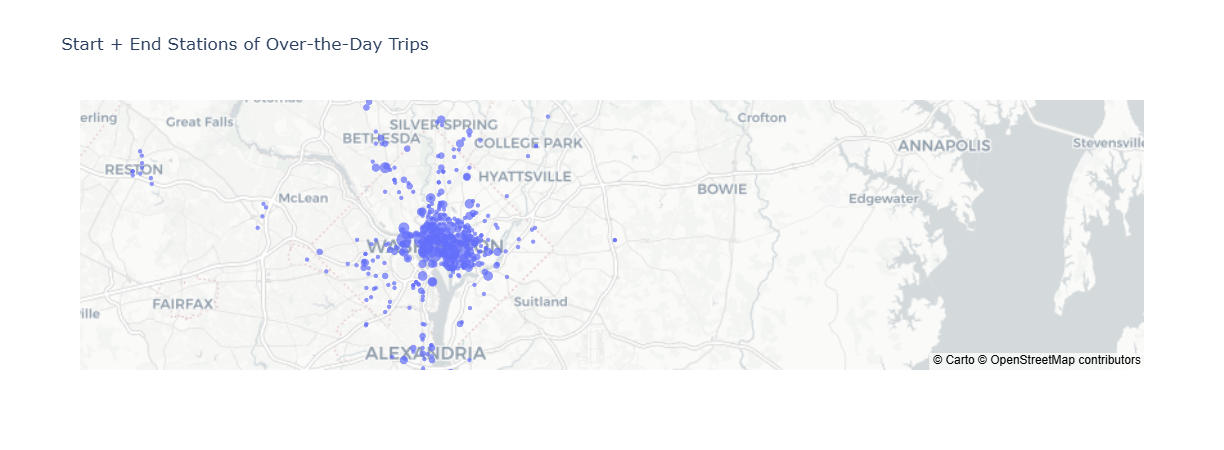

In [2]:
display(Image("b.png"))

### <div dir="rtl">ماذا تستنج؟ <div>

<div dir="rtl">يوجد توزيع كبير وشامل على معظم المحطات التي شملت رحلات مدتها زادت عن يوم كامل, وهناك محطات تبعد مسافات كبيرة عن مركز العاصمة, فقد يكون معظم السائقين مسافرين ومتجهين من أو إلى أطراف المدينة. <div>

## <div dir="rtl"> [c] الدراسة المالية<div>

### <div dir="rtl">توزع حسب تكلفة الرحلة<div>


✅ تم حفظ المخطط بنجاح باسم cost_distribution_plot.png


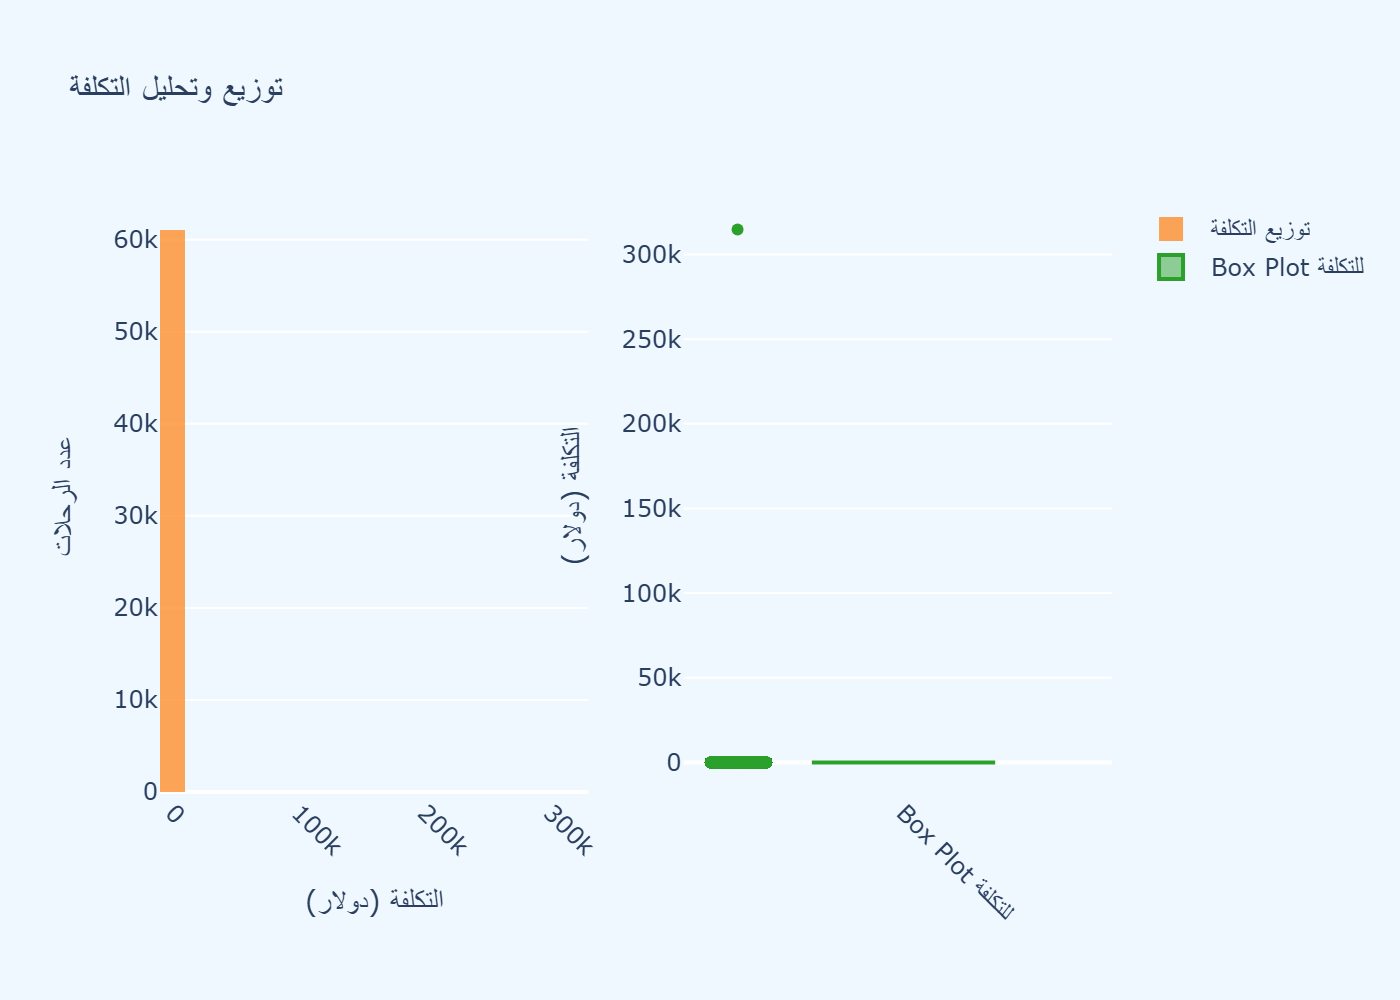

In [ ]:
weather_sample = weather.sample(frac=0.01)


fig = go.Figure()

# إضافة مخطط Histogram
fig.add_trace(go.Histogram(
    x=weather_sample['total_cost'],
    name='توزيع التكلفة',
    marker_color='#ff7f0e',  
    opacity=0.7,
    nbinsx=30,  
    xaxis='x1',
    yaxis='y1'
))

# إضافة مخطط Box
fig.add_trace(go.Box(
    y=weather_sample['total_cost'],
    name='Box Plot للتكلفة',
    marker_color='#2ca02c',  
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8,
    xaxis='x2',
    yaxis='y2'
))

# تحديث التخطيط
fig.update_layout(
    title='توزيع وتحليل التكلفة',
    xaxis1=dict(
        title='التكلفة (دولار)',
        domain=[0, 0.45],
        tickangle=45
    ),
    xaxis2=dict(
        title='',
        domain=[0.55, 1.0],
        tickangle=45
    ),
    yaxis1=dict(
        title='عدد الرحلات',
        domain=[0, 1.0]
    ),
    yaxis2=dict(
        title='التكلفة (دولار)',
        domain=[0, 1.0],
        anchor='x2'
    ),
    plot_bgcolor='#f0f8ff',  
    paper_bgcolor='#f0f8ff',
    width=1200,
    height=500,
    title_font_size=16,
    showlegend=True,
    grid=dict(rows=1, columns=2)
)


filename = "cost_distribution_plot.png"


try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    display(Image(filename=filename))
except Exception as e:
    print(f"\n❌ حدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido باستخدام: pip install -U plotly kaleido")

<div dir="rtl">توزيع التكلفة:يظهر التوزيع وجود مجموعة كبيرة من التكاليف المتدنية، مع وجود عدد قليل من القيم المرتفعة بشكل ملحوظ، مما يشير إلى وجود نقاط متطرفة (outliers).<div>
<div dir="rtl">مخطط الصندوق:يُظهر مخطط الصندوق الوسيط (median) والمدى interquartile (IQR) للتكلفة.<div>
<div dir="rtl">يمكن ملاحظة أن معظم القيم تتجمع في الجزء السفلي من نطاق التكلفة، مما يعني أن هناك عددًا قليلًا من التكاليف العالية التي تؤثر على المتوسط.<div>
<div dir="rtl">النقاط المتطرفة:تشير النقاط التي تقع خارج المدى (whiskers) إلى وجود تكاليف غير عادية قد تحتاج إلى تحليل إضافي لفهم أسبابها.<div>

### <div dir="rtl">مخطط نقطي scatter تكلفة الرحلة ضد المدة الزمنية<div>


✅ تم حفظ المخطط بنجاح باسم scatter_trend_plot.png


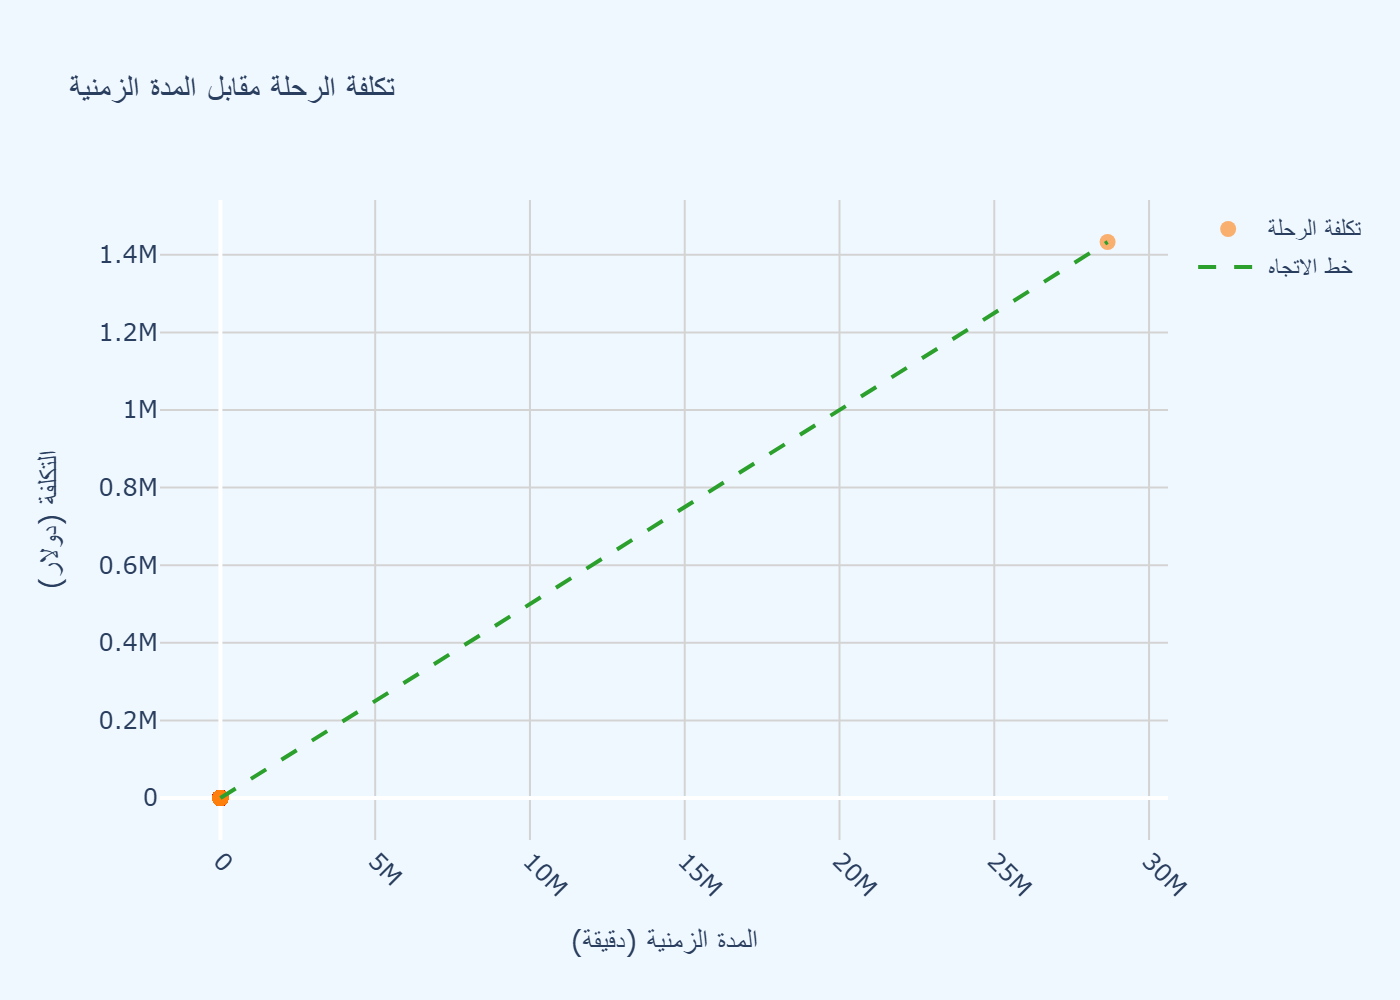

In [14]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image, display


weather_sample = weather.sample(frac=0.01)


x = weather_sample['trip_duration_minutes']
y = weather_sample['total_cost']
coefficients = np.polyfit(x, y, 1) 
trend_line = np.poly1d(coefficients)
x_range = np.linspace(x.min(), x.max(), 100)
y_trend = trend_line(x_range)


fig = go.Figure()


fig.add_trace(go.Scatter(
    x=weather_sample['trip_duration_minutes'],
    y=weather_sample['total_cost'],
    mode='markers',
    name='تكلفة الرحلة',
    marker=dict(color='#ff7f0e', size=8, opacity=0.6)
))


fig.add_trace(go.Scatter(
    x=x_range,
    y=y_trend,
    mode='lines',
    name='خط الاتجاه',
    line=dict(color='#2ca02c', width=2, dash='dash')
))

fig.update_layout(
    title='تكلفة الرحلة مقابل المدة الزمنية',
    xaxis_title='المدة الزمنية (دقيقة)',
    yaxis_title='التكلفة (دولار)',
    plot_bgcolor='#f0f8ff',  # خلفية فاتحة تشبه السماء
    paper_bgcolor='#f0f8ff',
    width=800,
    height=500,
    title_font_size=16,
    showlegend=True,
    xaxis=dict(tickangle=45, gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray')
)

filename = "scatter_trend_plot.png"


try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    display(Image(filename=filename))
except Exception as e:
    print(f"\n❌ حدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido باستخدام: pip install -U plotly kaleido")

<div dir="rtl">العلاقة الخطية:يظهر المخطط وجود علاقة خطية واضحة بين مدة الرحلة (بالدقائق) وتكلفة الرحلة (بالدنانير). كلما زادت مدة الرحلة، زادت التكلفة بشكل متناسب.<div>
<div dir="rtl">خط الاتجاه:الخط المنقط يمثل خط الاتجاه الذي يوضح كيفية تغير التكلفة مع تغير مدة الرحلة. هذه العلاقة تشير إلى أن الاختيار الأمثل للمدة يمكن أن يؤثر بشكل مباشر على التكلفة.<div>
<div dir="rtl">تحليل التكلفة:يمكن أن يكون هناك نقطة معينة تتطلب تحليلًا إضافيًا لتحديد إذا كان هناك نطاق زمني محدد يمكن أن يؤدي إلى تحقيق أفضل قيمة مقابل التكلفة.<div>

### <div dir="rtl">مخطط نقطي scatter تكلفة الرحلة ضد درجة الحرارة حسب فئة الدراجة<div>


✅ تم حفظ المخطط بنجاح باسم scatter_temperature_cost.png


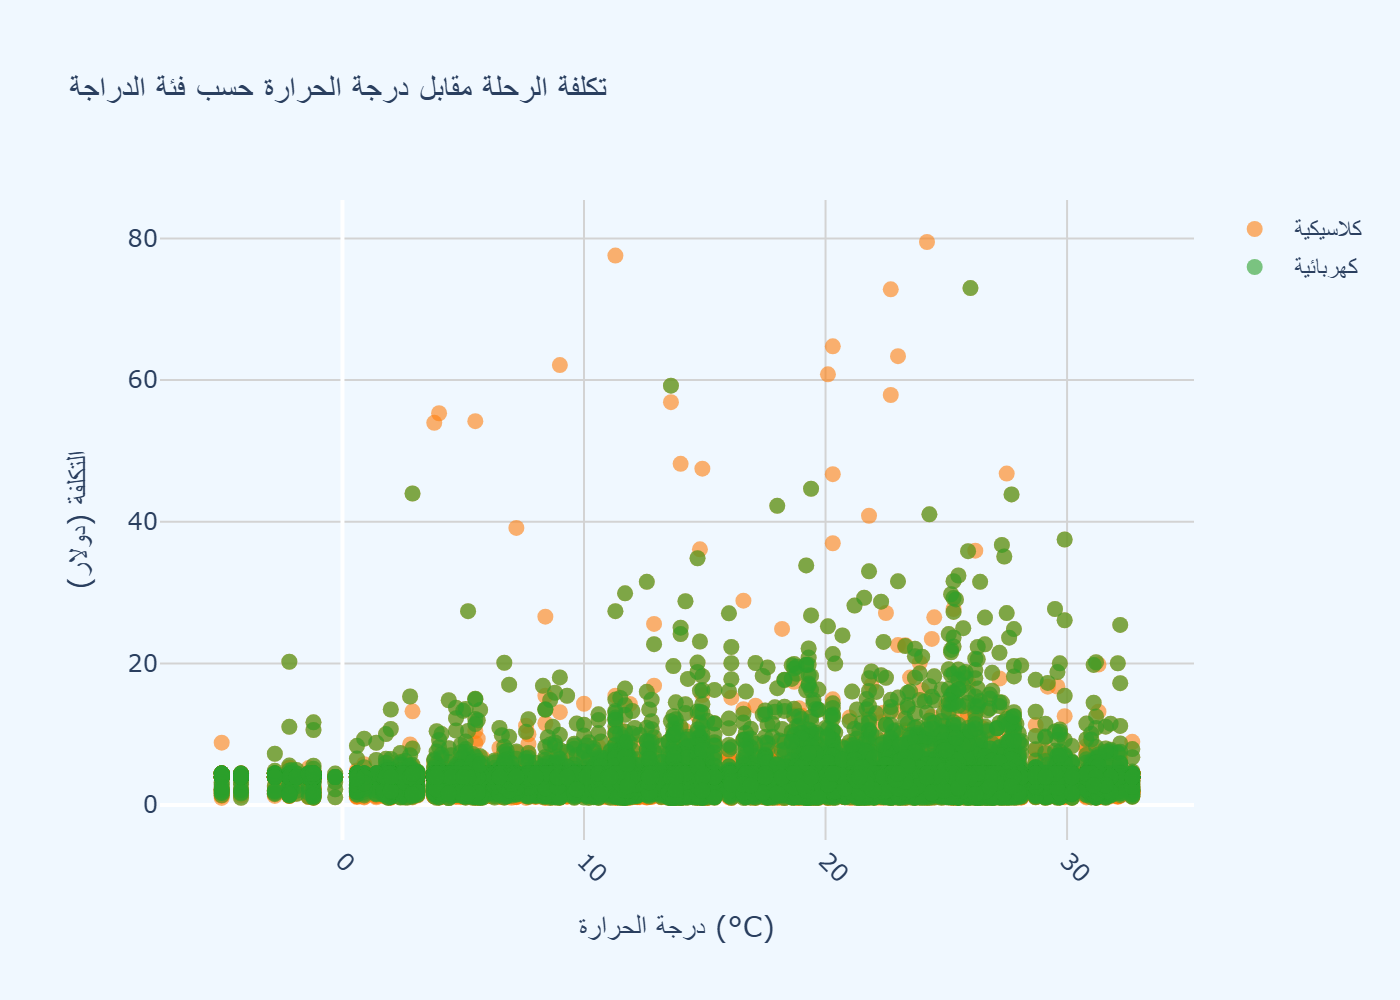

In [21]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image, display

weather_sample = weather.sample(frac=0.01)


fig = go.Figure()


fig.add_trace(go.Scatter(
    x=weather_sample['temp'],
    y=weather_sample['total_cost'],
    mode='markers',
    name='كلاسيكية',
    marker=dict(
        color='#ff7f0e', 
        size=8,
        opacity=0.6
    ),
    customdata=weather_sample['rideable_type'],
    visible=True
))

fig.add_trace(go.Scatter(
    x=weather_sample[weather_sample['rideable_type'] == 'electric_bike']['temp'],
    y=weather_sample[weather_sample['rideable_type'] == 'electric_bike']['total_cost'],
    mode='markers',
    name='كهربائية',
    marker=dict(
        color='#2ca02c',  
        size=8,
        opacity=0.6
    ),
    customdata=weather_sample[weather_sample['rideable_type'] == 'electric_bike']['rideable_type'],
    visible=True
))


fig.update_layout(
    title='تكلفة الرحلة مقابل درجة الحرارة حسب فئة الدراجة',
    xaxis_title='درجة الحرارة (°C)',
    yaxis_title='التكلفة (دولار)',
    plot_bgcolor='#f0f8ff', 
    paper_bgcolor='#f0f8ff',
    width=800,
    height=500,
    title_font_size=16,
    showlegend=True,
    xaxis=dict(tickangle=45, gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray')
)


filename = "scatter_temperature_cost.png"


try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    display(Image(filename=filename))
except Exception as e:
    print(f"\n❌ حدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido باستخدام: pip install -U plotly kaleido")

<div dir="rtl">العلاقة بين درجة الحرارة والإعدادات:هناك اتجاه عام يُظهر أن الإعدادات اليومية تزداد مع ارتفاع درجة الحرارة، مما يشير إلى أن الأيام الأكثر حرارة قد تجذب مزيدًا من الأنشطة.<div>
<div dir="rtl">العلاقة بين الرطوبة والإعدادات:تُظهر النقاط المتعلقة بالرطوبة تباينًا أكبر، حيث لا يظهر تأثير مباشر واضح بين نسبة الرطوبة وعدد الإعدادات.<div>
<div dir="rtl">التوجه العام:يظهر أن درجة الحرارة تؤثر بشكل أكبر على الإعدادات اليومية مقارنةً بالرطوبة، مما يشير إلى أن الأنشطة تفضل الأجواء الدافئة أكثر من الرطبة.<div>

### <div dir="rtl">عرض السلسلة الزمنية لإجمالي الإيرادات اليومية والأسبوعية باستخدام مخطط line<div>

In [ ]:
time_series_reset = time_series.reset_index()
time_series_reset['date'] = pd.to_datetime(time_series_reset['date'])
# حساب الإيرادات الأسبوعية 
weekly_revenue = time_series_reset.resample('W-Sun', on='date')['total_revenue'].sum().reset_index()

fig = go.Figure()

#  خط الإيرادات اليومية
fig.add_trace(go.Scatter(
    x=time_series_reset['date'],
    y=time_series_reset['total_revenue'],
    mode='lines',
    name='الإيرادات اليومية',
    line=dict(color='#ff7f0e', width=2),
))

#  خط الإيرادات الأسبوعية
fig.add_trace(go.Scatter(
    x=weekly_revenue['date'],
    y=weekly_revenue['total_revenue'],
    mode='lines',
    name='الإيرادات الأسبوعية',
    line=dict(color='#2ca02c', width=2),
))


fig.update_layout(
    title='الإيرادات اليومية والأسبوعية)',
    xaxis_title='التاريخ',
    yaxis_title='الإيرادات',
    plot_bgcolor='#f0f8ff',  
    paper_bgcolor='#f0f8ff',
    width=1400,
    height=600,
    title_font_size=16,
    showlegend=True,
    xaxis=dict(
        tickformat='%Y-%m-%d',
        tickangle=45,
        showgrid=True,
        type='date'  
    ),
    yaxis=dict(gridcolor='lightgray',tickformat=',.0f')
)

filename = "2c4.png"


fig.write_image(
    filename, 
    engine="kaleido", 
    scale=2, 
    width=1200, 
    height=600
)


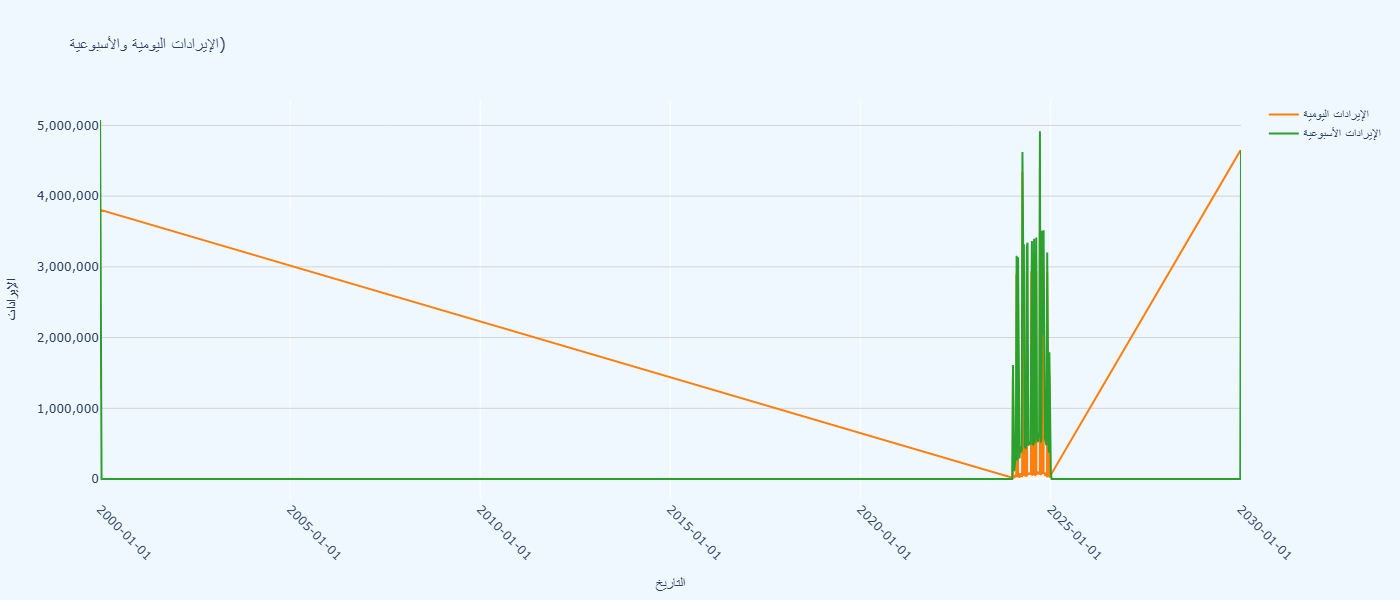

In [3]:
display(Image("2c4.png"))

<div dir="rtl">ماذا نلاحظ من المخطط؟<div>
<div dir="rtl">نلاحظ أولاً أن البيانات غير متوازنة اي هناك معلومات عن الرحلات أقل بين 2000 و 2024 بينما تتركز البيانات من 2024 الى 2025<div>
<div dir="rtl">ثانياً: يوجد فرق كبير في الايرادات من يوم الى يوم او من اسبوع الى اسبوع اي يوجد احداث موسمية او ربما تتعلق بالطقس تؤثر على الرحلات<div>
<div dir="rtl">ثالثاً: لاحظنا من دراسة المخطط التفاعلي ان اعلى قيمة للايرادات تم تسجيلها في شهر 9 وتم تسجيل قيم عالية اًيضاً في شهر 4و 3 واغلب القيم المنخفضة للايرادات كانت بين الاشهر 6 و 7 و8 وهذا يدل ايضا على تأثير الفصول على الرحلات<div>

### <div dir="rtl"> عرض السلسلة الزمنية لمتوسط الايرادات الشهري<div>

In [ ]:
# حساب المتوسط الشهري للإيرادات
monthly_avg = time_series_reset.resample('M', on='date')['total_revenue'].mean().reset_index()


fig = go.Figure()
fig.add_trace(go.Scatter(
    x=monthly_avg['date'],
    y=monthly_avg['total_revenue'],
    mode='lines+markers',
    name='متوسط الإيرادات الشهرية',
    line=dict(color='#1f77b4', width=3),
    marker=dict(size=8, symbol='circle')
))

fig.update_layout(
    title='متوسط الإيرادات الشهرية (2024-2025)',
    xaxis_title='الشهر',
    yaxis_title='متوسط الإيرادات',
    plot_bgcolor='#f0f8ff',
    paper_bgcolor='#f0f8ff',
    width=1400,
    height=600,
    xaxis=dict(
        tickformat='%b %Y',  
        tickangle=45,
        showgrid=True,
        type='date',
        range=['2024-01-01', '2025-12-31']  # يحدد النطاق الزمني
    ),
    yaxis=dict(
        gridcolor='lightgray',
        tickformat=',.0f',
    ),
    hovermode='x unified'
)

filename = "2c5.png"
fig.write_image(
    filename,
    engine="kaleido",
    scale=2,
    width=1400,
    height=600
)

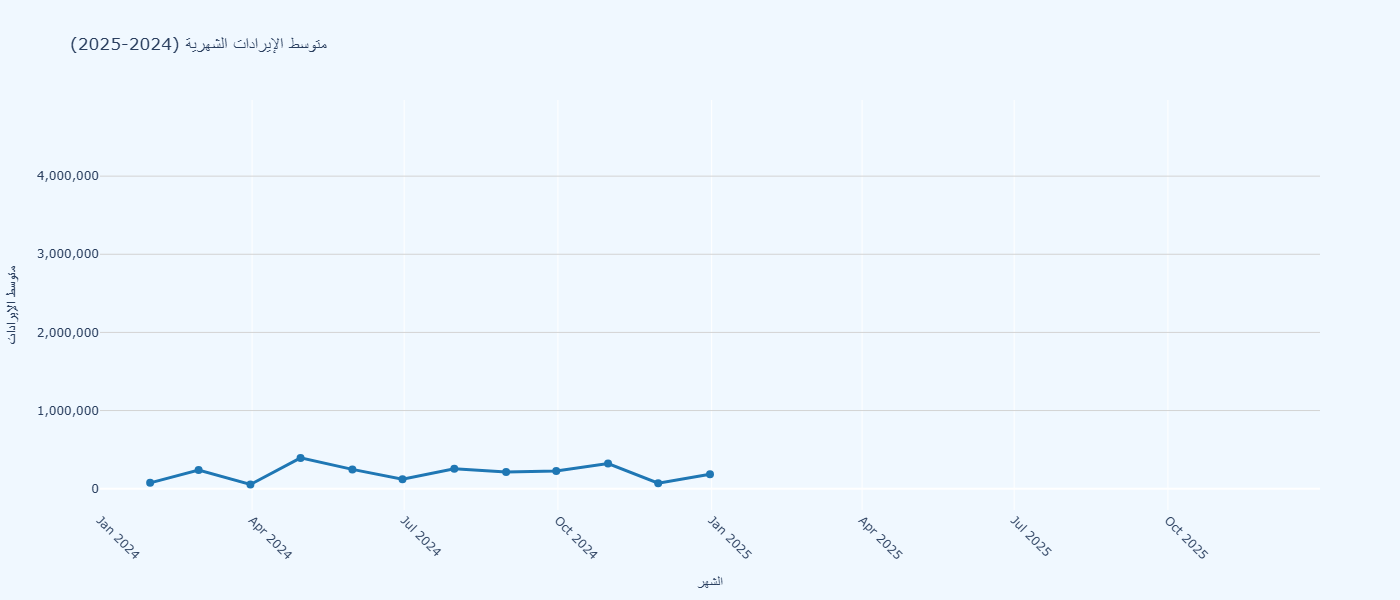

In [4]:
display(Image("2c5.png"))

<div dir="rtl">ماذا نلاحظ من المخطط؟<div>
<div dir="rtl">كما لاحظنا من المخطط الذي سبقه يوجد تفاوت بين قيم الايرادات بين الاشهر واكثر الايرادات تظهر في اشهر الربيع او الصيف <div>

## <div dir="rtl"> [d]التحليل المكاني لرحلات الدراجات<div>

### <div dir="rtl">عرض مخطط حراري جيوغرافي Heatmap Geographic لعدد الرحالت في كل في كل منطقة سكنية<div>

In [ ]:
residential_zones = gpd.read_file("Residential_and_Visitor_Parking_Zones_Processed.geojson").to_crs("EPSG:4326")


start_points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        weather['start_lng'], 
        weather['start_lat'],
        crs="EPSG:4326"
    )
)

end_points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        weather['end_lng'], 
        weather['end_lat'],
        crs="EPSG:4326"
    )
)

start_zones = gpd.sjoin(start_points, residential_zones, how="left", predicate="within")
end_zones = gpd.sjoin(end_points, residential_zones, how="left", predicate="within")

weather['start_zone'] = start_zones['RPP_ZONE']
weather['end_zone'] = end_zones['RPP_ZONE']

weather['start_zone'] = weather['start_zone'].fillna('None')
weather['end_zone'] = weather['end_zone'].fillna('None')

start_counts = weather[weather['start_zone'] != 'None'].groupby('start_zone').size()
end_counts = weather[weather['end_zone'] != 'None'].groupby('end_zone').size()
both_counts = weather[(weather['start_zone'] == weather['end_zone']) & 
                      (weather['start_zone'] != 'None')].groupby('start_zone').size()

trip_counts = pd.DataFrame({
    'start_count': start_counts,
    'end_count': end_counts,
    'both_count': both_counts
}).fillna(0)

trip_counts['total_trips'] = (trip_counts['start_count'] + 
                              trip_counts['end_count'] - 
                              trip_counts['both_count'])

residential_zones = residential_zones.merge(trip_counts['total_trips'], 
                                            left_on='RPP_ZONE', 
                                            right_index=True, 
                                            how='left')

residential_zones['total_trips'] = residential_zones['total_trips'].fillna(0)

m = folium.Map(location=[38.9, -77.0], zoom_start=12)

folium.Choropleth(
    geo_data=residential_zones,
    name="choropleth",
    data=residential_zones,
    columns=["RPP_ZONE", "total_trips"],
    key_on="feature.properties.RPP_ZONE",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Bike Trips per Residential Zone"
).add_to(m)

folium.LayerControl().add_to(m)

m.save("Washington_heatmap.html")

outside_trips = weather[(weather['start_zone'] == 'None') & 
                        (weather['end_zone'] == 'None')]
total_outside_trips = outside_trips.shape[0]
print(f"Total number of trips outside residential areas: {total_outside_trips}")

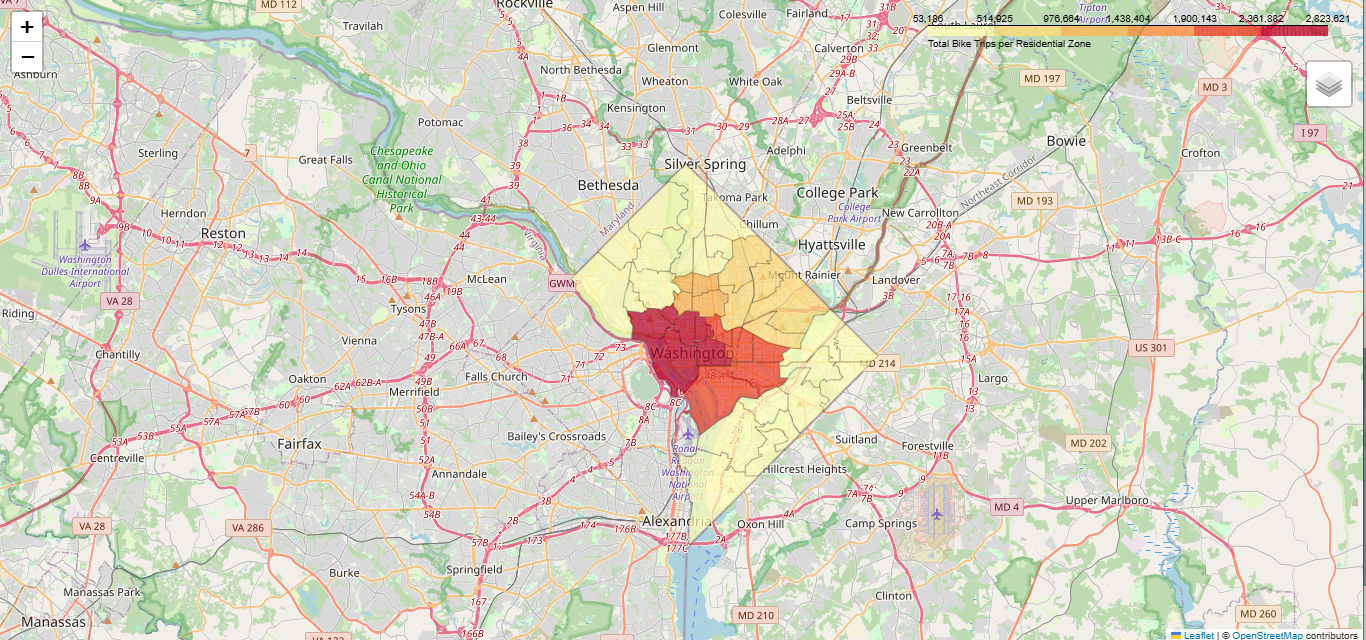

In [6]:
display(Image("resi.png"))

### <div dir="rtl">عرض مخطط شريطي Bar لتوزع فئات القطاعات الجغرافية Geographic hash<div>

In [ ]:
category_counts = avg_daily_trips['geohash_category'].value_counts().reset_index()
category_counts.columns = ['geohash_category', 'count']

fig = px.bar(
    category_counts,
    x='geohash_category',
    y='count',
    title='Distribution of Geographic Hash Categories',
    labels={'geohash_category': 'Category', 'count': 'Number of Geohashes'},
    color='geohash_category',
    color_discrete_map={'gray': 'gray', 'yellow': 'yellow', 'red': 'red'},
    category_orders={'geohash_category': ['gray', 'yellow', 'red']}
)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Number of Geohashes',
    showlegend=False
)

fig.write_image('geohash_category_distribution.png')

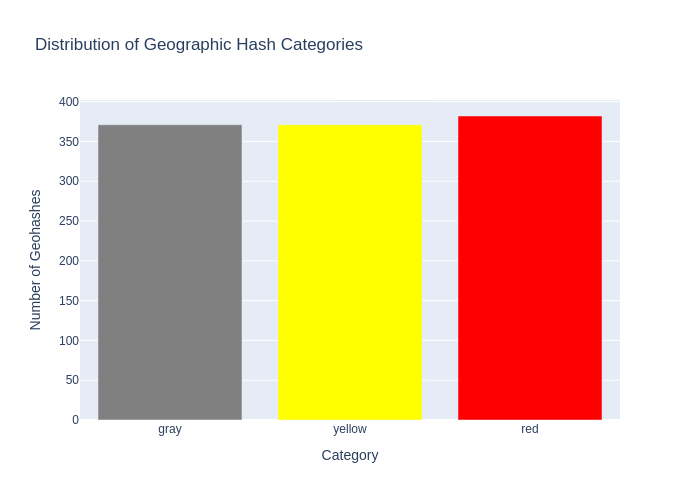

In [7]:
display(Image("geohash_category_distribution.png"))

### <div dir="rtl">عرض مخطط Histogram لتوزع البعد عن المنطقة التجارية الرئيسية والمسافة لاقرب نقطة مترو والمسافة لاقرب موقف حافلة<div>

In [ ]:
# Melt for tidy plotting
dist_df = weather[['end_distance_to_cbd', 'end_nearest_metro_dist', 'end_nearest_bus_dist']].copy()
dist_df = dist_df.rename(columns={
    'end_distance_to_cbd': 'CBD',
    'end_nearest_metro_dist': 'Metro',
    'end_nearest_bus_dist': 'Bus'
})

dist_melted = dist_df.melt(var_name='Distance_Type', value_name='Distance')

# Optional: remove extreme outliers
dist_melted = dist_melted[dist_melted['Distance'] < 5000]

fig = px.histogram(
    dist_melted,
    x='Distance',
    color='Distance_Type',
    nbins=100,
    barmode='overlay',
    opacity=0.6,
    title='Distribution of Distances to Key Locations',
    labels={'Distance': 'Distance (meters)', 'Distance_Type': 'Type'}
)

fig.update_layout(showlegend=True)
fig.show()

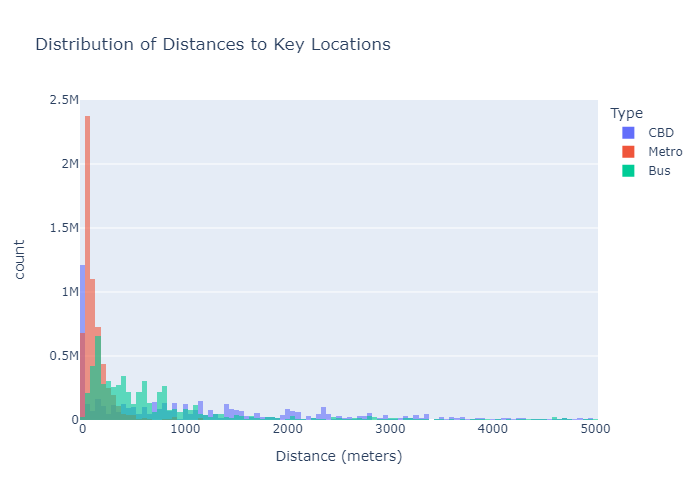

In [8]:
display(Image("histogram_Distance_Type.png"))

### <div dir="rtl">عرض مخطط شريطي Bar لتوزع الرحالت فيما إذا كانت الرحلة داخل المنطقة التجارية الرئيسية بالكامل ام خارجه<div>


In [ ]:
# Count number of trips by CBD status
cbd_counts = weather['is_cbd'].value_counts().reset_index()
cbd_counts.columns = ['is_cbd', 'trip_count']

# Convert bool to readable text
cbd_counts['label'] = cbd_counts['is_cbd'].map({True: 'Inside CBD', False: 'Outside CBD'})

# Create bar chart
fig = px.bar(
    cbd_counts,
    x='label',
    y='trip_count',
    color='label',
    title='Distribution of Trips: Inside vs Outside Main Commercial Area',
    labels={'trip_count': 'Number of Trips', 'label': 'CBD Status'},
    color_discrete_map={'Inside CBD': 'royalblue', 'Outside CBD': 'lightgray'}
)

fig.update_layout(showlegend=False)
img_bytes=fig.to_image(format="png")
fig.write_image("bar_Distance_Type.png")  
Image(img_bytes)

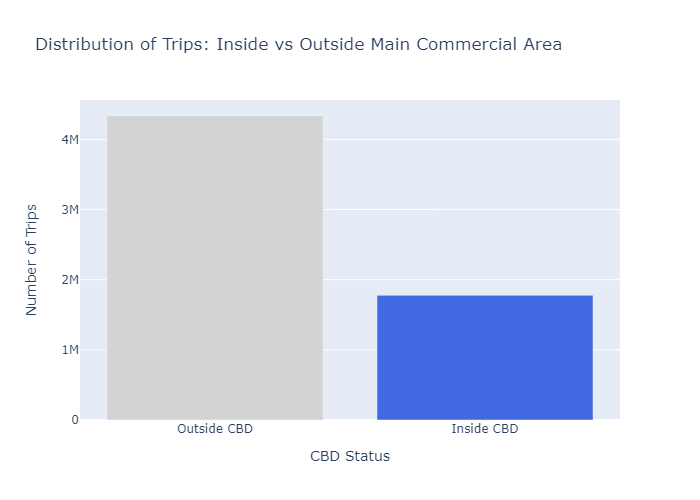

In [9]:
display(Image("bar_Distance_Type.png"))

### <div dir="rtl">عرض مخطط شريطي Bar لتوزع الرحلات التي مرت ضمن المنطقة التجارية الرئيسية حسب نوع الدراجة ونوع االشتراك<div>

In [ ]:
# تصفية البيانات لتشمل فقط الرحلات التي مرت ضمن المنطقة التجارية الرئيسية
cbd_trips = weather[weather['is_cbd'] == True]

# إنشاء مخطط أعمدة باستخدام Plotly Express
fig = px.histogram(
    cbd_trips,
    x='member_casual',
    color='rideable_type',  # تقسيم حسب نوع الدراجة
    barmode='group',  # عرض الأعمدة بشكل متوازٍ (بدلاً من مكدسة)
    title='توزيع الرحلات ضمن المنطقة التجارية الرئيسية حسب نوع الاشتراك ونوع الدراجة',
    labels={
        'member_casual': 'نوع الاشتراك',
        'rideable_type': 'نوع الدراجة',
        'count': 'عدد الرحلات'
    },
    color_discrete_sequence=px.colors.qualitative.Set2  # ألوان مميزة
)

# تخصيص تخطيط المخطط
fig.update_layout(
    xaxis_title="نوع الاشتراك",
    yaxis_title="عدد الرحلات",
    legend_title="نوع الدراجة",
    font=dict(size=12),
    showlegend=True
)

# حفظ المخطط كصورة
fig.write_image("histogram_cbd_trips_by_subscription_and_bike_type.png")

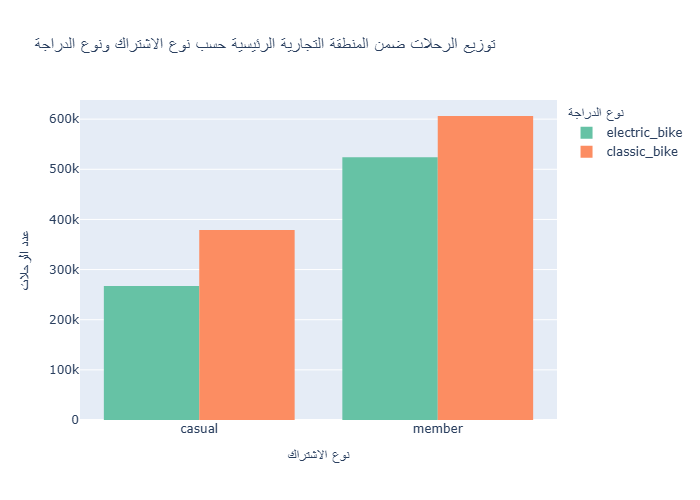

In [10]:
display(Image("histogram_cbd_trips_by_subscription_and_bike_type.png"))

### <div dir="rtl">دراسة االرتباط بين فئة البعد عن المنطقة التجارية الرئيسية ونوع االشتراك باستخدام تحليل square chi<div>

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# إنشاء جدول التبادل
contingency_table = pd.crosstab(weather['end_cbd_proximity'], weather['member_casual'])

# طباعة جدول التبادل
print("جدول التبادل:")
print(contingency_table)

# إجراء اختبار كاي-تربيع
chi2, p, dof, expected = chi2_contingency(contingency_table)

# طباعة النتائج
print("\nنتائج اختبار كاي-تربيع:")
print(f"قيمة Chi-Square: {chi2}")
print(f"قيمة P-value: {p}")
print(f"درجات الحرية: {dof}")

# تفسير النتيجة
if p < 0.05:
    print("يوجد ارتباط إحصائي بين فئة القرب من المنطقة التجارية ونوع الاشتراك.")
else:
    print("لا يوجد ارتباط إحصائي بين فئة القرب من المنطقة التجارية ونوع الاشتراك.")

جدول التبادل:
member_casual       casual   member
end_cbd_proximity                  
far                1267368  2662665
near                784310  1395172

نتائج اختبار كاي-تربيع:
قيمة Chi-Square: 8781.628728620643
قيمة P-value: 0.0
درجات الحرية: 1
يوجد ارتباط إحصائي بين فئة القرب من المنطقة التجارية ونوع الاشتراك.


<div dir="rtl">بناءً على نتائج اختبار كاي-تربيع، هناك ارتباط إحصائي قوي بين فئة القرب من المنطقة التجارية الرئيسية (end_cbd_proximity) ونوع الاشتراك (member_casual)، حيث تشير قيمة P-value (0.0) إلى رفض الفرضية الصفرية. من جدول التبادل، نلاحظ أن المستخدمين الأعضاء (member) يميلون بشكل أكبر إلى استخدام الدراجات بالقرب من المنطقة التجارية (near) مقارنة بالمستخدمين العرضيين (casual)، بينما يتوزع المستخدمون العرضيون بشكل أكثر توازناً بين المناطق القريبة والبعيدة (far). هذا يشير إلى أن الأعضاء قد يفضلون استخدام الدراجات في المناطق التجارية المركزية مقارنة بالمستخدمين العرضيين.<div>

## <div dir="rtl"> [e]دراسة تأثير حالة الطقس <div>

### <div dir="rtl">متوسط درجة الحرارة سرعة الرياح والرطوبة اليومية مخطط Line<div>


✅ تم حفظ المخطط بنجاح باسم daily_weather_line_plot.png


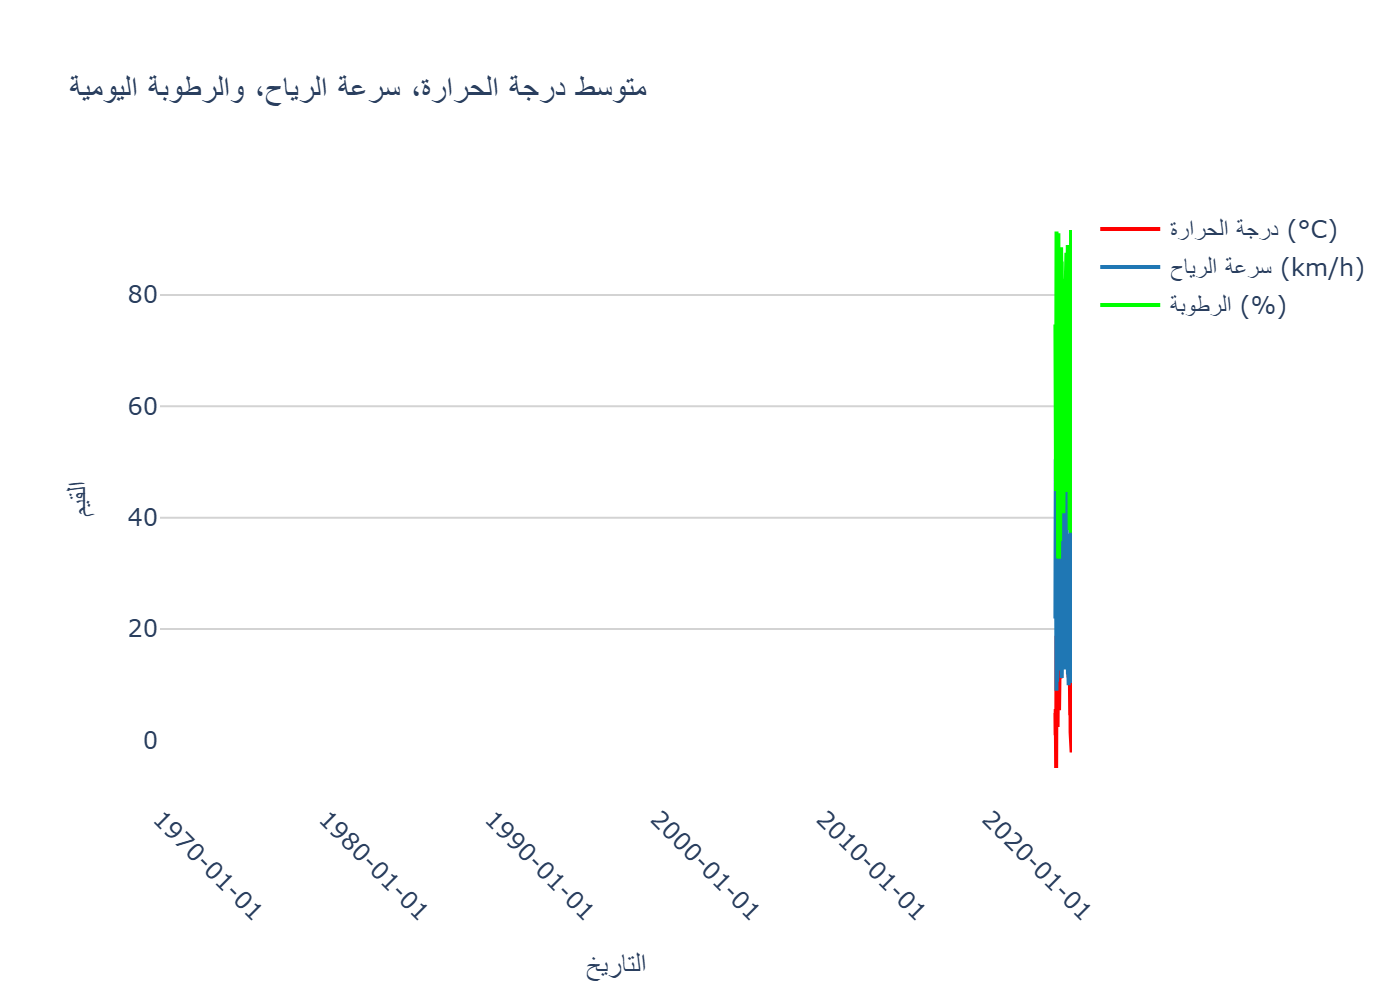

In [63]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import Image, display


weather['date'] = pd.to_datetime(weather['date'])


daily_weather = weather.groupby(weather['date'].dt.date)[['temp', 'windspeed', 'humidity']].mean().reset_index()


fig = go.Figure()


fig.add_trace(go.Scatter(
    x=daily_weather['date'],
    y=daily_weather['temp'],
    name='درجة الحرارة (°C)',
    mode='lines',
    line=dict(color='#ff0000', width=2)
))


fig.add_trace(go.Scatter(
    x=daily_weather['date'],
    y=daily_weather['windspeed'],
    name='سرعة الرياح (km/h)',
    mode='lines',
    line=dict(color='#1f77b4', width=2)
))

fig.add_trace(go.Scatter(
    x=daily_weather['date'],
    y=daily_weather['humidity'],
    name='الرطوبة (%)',
    mode='lines',
    line=dict(color='#00ff00', width=2)
))

fig.update_layout(
    title='متوسط درجة الحرارة، سرعة الرياح، والرطوبة اليومية',
    xaxis_title='التاريخ',
    yaxis_title='القيم',
    plot_bgcolor='white',
    width=800,
    height=500,
    title_font_size=16,
    showlegend=True,
    xaxis=dict(
        tickformat='%Y-%m-%d',
        tickangle=45
    ),
    yaxis=dict(
        gridcolor='lightgray'
    )
)

filename = "daily_weather_line_plot.png"

try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    
    display(Image(filename=filename))
    
except Exception as e:
    print(f"\n❌ حدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido باستخدام: pip install -U plotly kaleido")

<div dir="rtl">متوسط درجة الحرارة:يُظهر المخطط ارتفاعًا ملحوظًا في متوسط درجة الحرارة خلال السنوات الأخيرة، مما يشير إلى اتجاه نحو ارتفاع درجات الحرارة.<div>
<div dir="rtl">سرعة الرياح:تظل سرعة الرياح شبه مستقرة على مدار الفترة الزمنية، مع بعض التغيرات الطفيفة.<div>
<div dir="rtl">التوجه العام:يمكن ملاحظة أن التغير في درجات الحرارة أكثر وضوحًا مقارنةً بتغير سرعة الرياح، مما قد يشير إلى تأثيرات التغير المناخي.<div>

### <div dir="rtl">عرض مخططBOX للايرادات اليومية حسب حالة الطقس<div>


✅ تم حفظ المخطط بنجاح باسم daily_revenue_box_plot.png


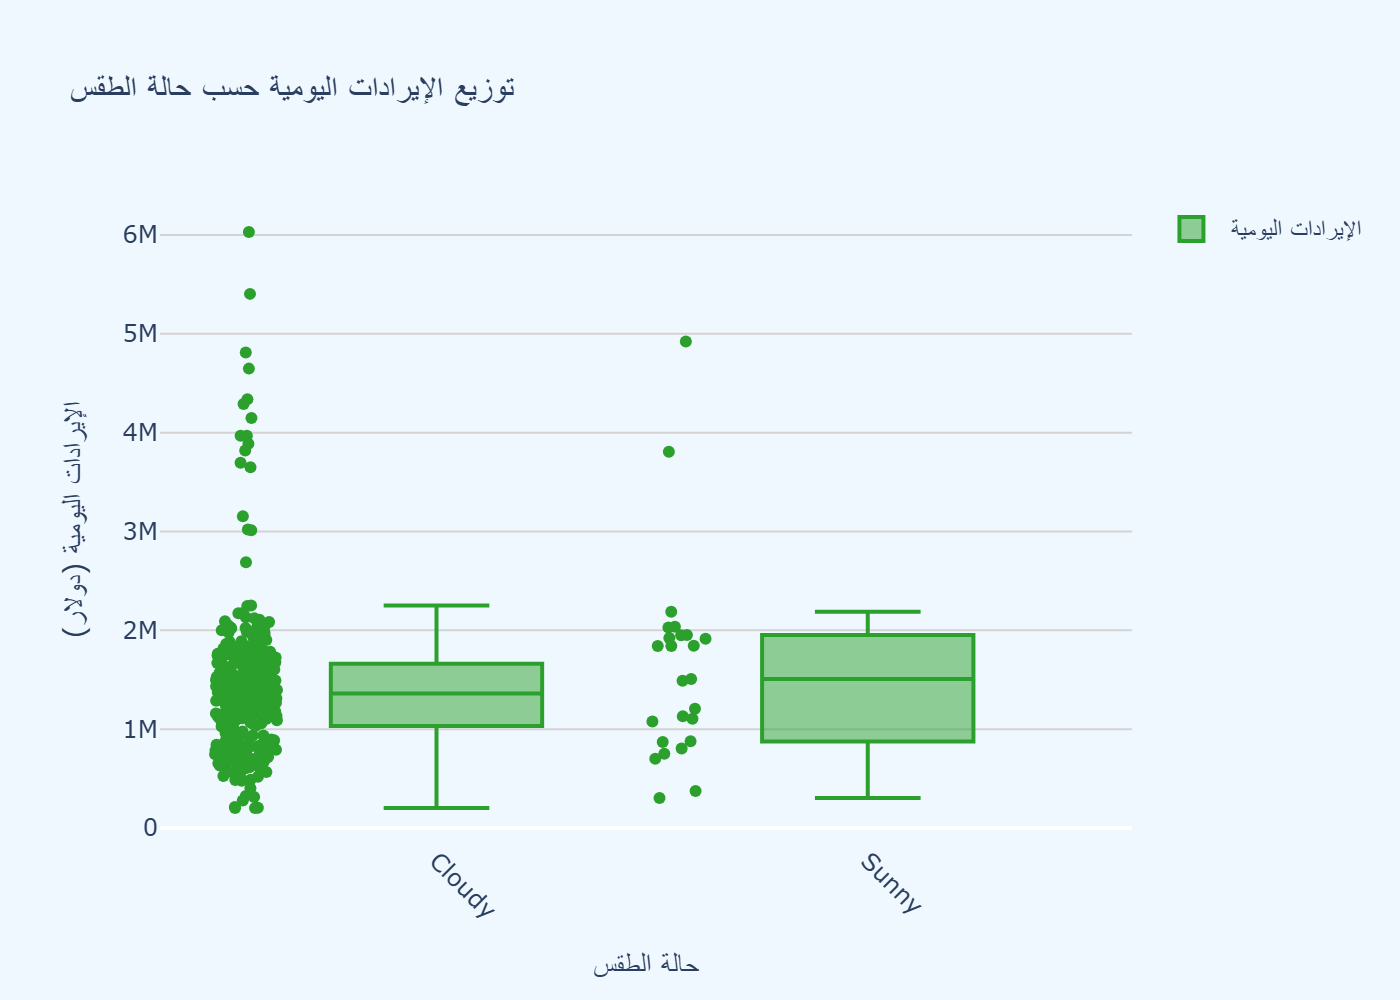

In [63]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import Image, display

time_series_reset = time_series.reset_index()

fig = go.Figure()

fig.add_trace(go.Box(
    y=time_series_reset['total_revenue'],
    x=time_series_reset['weather_category'],
    name='الإيرادات اليومية',
    marker_color='#2ca02c',  
    boxpoints='all',  
    jitter=0.3,  
    pointpos=-1.8  
))

# تحديث تنسيق المخطط
fig.update_layout(
    title='توزيع الإيرادات اليومية حسب حالة الطقس',
    xaxis_title='حالة الطقس',
    yaxis_title='الإيرادات اليومية (دولار)',
    plot_bgcolor='#f0f8ff', 
    paper_bgcolor='#f0f8ff',
    width=800,
    height=500,
    title_font_size=16,
    showlegend=True,
    xaxis=dict(tickangle=45),
    yaxis=dict(gridcolor='lightgray')
)


filename = "daily_revenue_box_plot.png"


try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    display(Image(filename=filename))
except Exception as e:
    print(f"\n❌ حدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido باستخدام: pip install -U plotly kaleido")

<div dir="rtl">حالة الطقس الغائم:تحتوي على مجموعة واسعة من القيم، مع وجود نقاط متطرفة (outliers) تشير إلى أيام ذات إعدادات عالية جدًا.<div>
<div dir="rtl">الوسيط (median) للإعدادات اليومية يبدو أقل مقارنةً بحالة الطقس المشمس.<div>
<div dir="rtl">حالة الطقس المشمس:تتميز بتوزيع أكثر تركيزًا مع قيم أعلى في المتوسط.<div>
<div dir="rtl">الوسيط للإعدادات اليومية مرتفع، مما يدل على أن الأيام المشمسة تميل إلى تقديم إعدادات أعلى بشكل عام.<div>

### <div dir="rtl">دراسة الارتباط الخطي بين درجة الحرارة والرطوبة والايرادات اليومية<div>

معاملات الارتباط الخطي:
                   temp  humidity  total_revenue
temp           1.000000  0.157707       0.355359
humidity       0.157707  1.000000      -0.079187
total_revenue  0.355359 -0.079187       1.000000

✅ تم حفظ المخطط بنجاح باسم correlation_plot.png


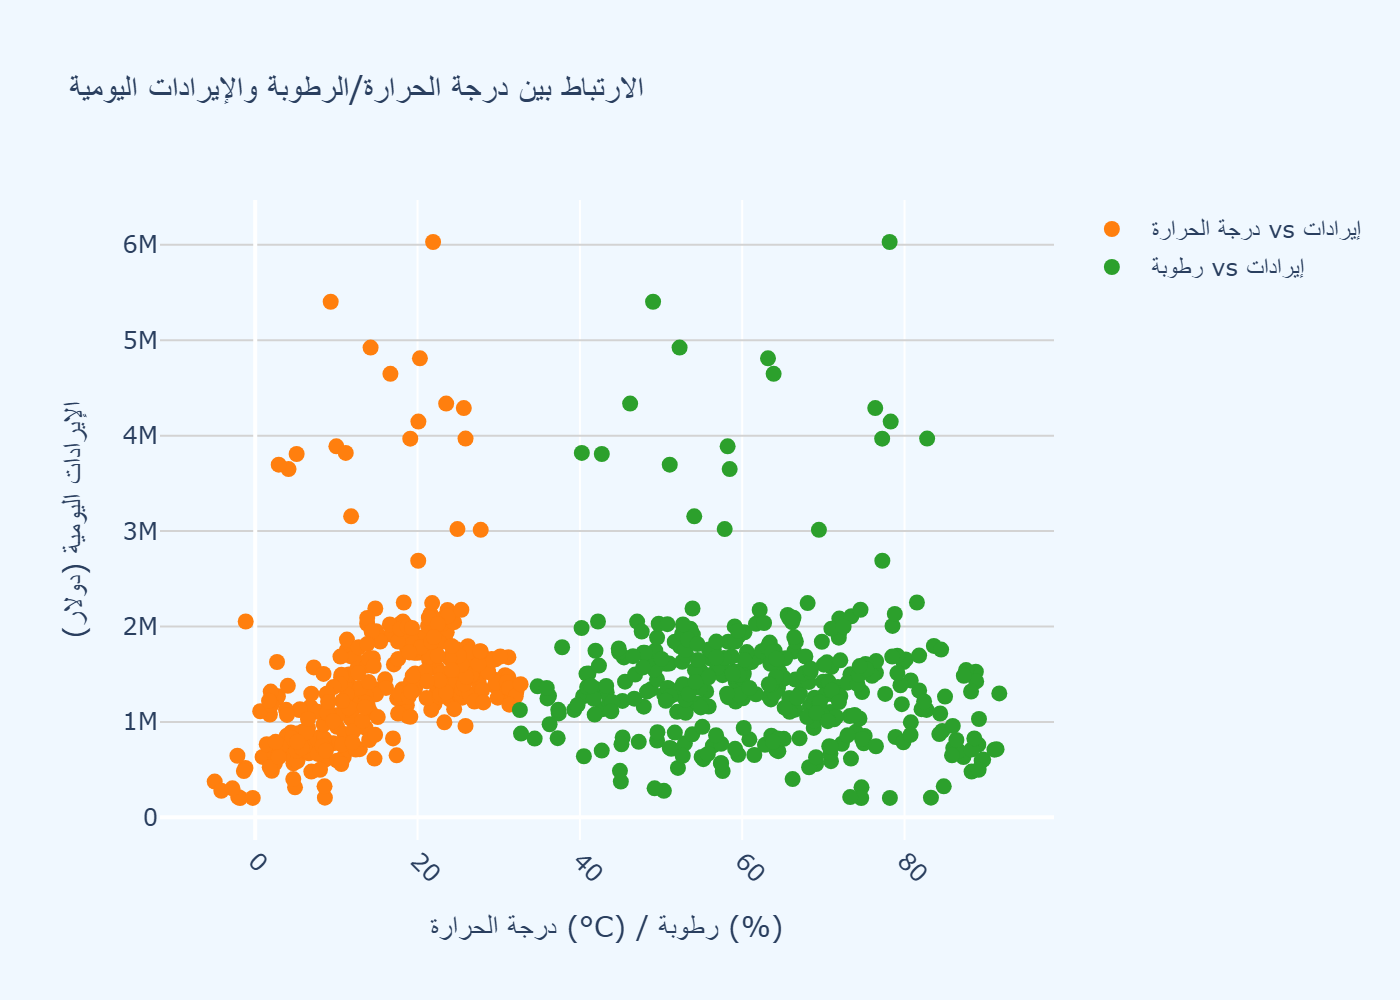

In [71]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image, display


weather['ended_at'] = pd.to_datetime(weather['ended_at']).dt.normalize()


daily_weather_stats = weather.groupby('ended_at')[['temp', 'humidity']].mean().reset_index()


time_series_reset = time_series.reset_index()
combined_data = pd.merge(
    time_series_reset,
    daily_weather_stats,
    left_on='date',
    right_on='ended_at',
    how='left'
).drop(columns=['ended_at'])


correlation_matrix = combined_data[['temp', 'humidity', 'total_revenue']].corr()


print("معاملات الارتباط الخطي:")
print(correlation_matrix)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=combined_data['temp'],
    y=combined_data['total_revenue'],
    mode='markers',
    name='درجة الحرارة vs إيرادات',
    marker=dict(color='#ff7f0e', size=8)
))

fig.add_trace(go.Scatter(
    x=combined_data['humidity'],
    y=combined_data['total_revenue'],
    mode='markers',
    name='رطوبة vs إيرادات',
    marker=dict(color='#2ca02c', size=8)
))


fig.update_layout(
    title='الارتباط بين درجة الحرارة/الرطوبة والإيرادات اليومية',
    xaxis_title='درجة الحرارة (°C) / رطوبة (%)',
    yaxis_title='الإيرادات اليومية (دولار)',
    plot_bgcolor='#f0f8ff',
    paper_bgcolor='#f0f8ff',
    width=800,
    height=500,
    title_font_size=16,
    showlegend=True,
    xaxis=dict(tickangle=45),
    yaxis=dict(gridcolor='lightgray')
)


filename = "correlation_plot.png"


try:
    fig.write_image(filename, engine="kaleido", scale=2)
    print(f"\n✅ تم حفظ المخطط بنجاح باسم {filename}")
    display(Image(filename=filename))
except Exception as e:
    print(f"\n❌ حدث خطأ أثناء الحفظ: {e}")
    print("يرجى التأكد من تثبيت kaleido باستخدام: pip install -U plotly kaleido")

<div dir="rtl">العلاقة بين درجة الحرارة والإعدادات:هناك توجه عام حيث تزداد الإعدادات مع ارتفاع درجة الحرارة، مما يشير إلى أن الأيام الأكثر حرارة قد تجذب مزيدًا من الأنشطة.<div>
<div dir="rtl">العلاقة بين الرطوبة والإعدادات:تظهر النقاط المتعلقة بالرطوبة تباينًا أكبر، حيث لا يبدو أن هناك علاقة قوية مباشرة بين نسبة الرطوبة وعدد الإعدادات.<div>
<div dir="rtl">التوجه العام:يبدو أن درجة الحرارة تؤثر بشكل أكبر على الإعدادات اليومية مقارنةً بالرطوبة، مما قد يدل على أن الأنشطة تفضل الأجواء الدافئة أكثر من الرطبة.<div>

### <div dir="rtl">دراسة الارتباط بين حالة الطقس ونوع الدراجة<div>

In [71]:
import pandas as pd
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(weather['conditions'], weather['rideable_type'])


chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

alpha = 0.05
if p < alpha:
    print("نرفض H₀: هناك ارتباط بين حالة الطقس ونوع الدراجة.")
else:
    print("لا نرفض H₀: لا يوجد ارتباط بين حالة الطقس ونوع الدراجة.")

Chi-Square Statistic: 6372.709958529675
P-value: 0.0
Degrees of Freedom: 7
Expected Frequencies:
 [[1.88434878e+05 2.37209122e+05]
 [2.27541698e+04 2.86438302e+04]
 [1.58417817e+06 1.99422483e+06]
 [3.44324714e+05 4.33449286e+05]
 [5.53568957e+05 6.96854043e+05]
 [1.68050952e+03 2.11549048e+03]
 [5.11811660e+03 6.44288340e+03]
 [4.65548950e+03 5.86051050e+03]]
نرفض H₀: هناك ارتباط بين حالة الطقس ونوع الدراجة.


<div dir="rtl">متوسط درجة الحرارة:يُظهر المخطط ارتفاعًا ملحوظًا في متوسط درجة الحرارة خلال السنوات الأخيرة، مما يشير إلى اتجاه نحو ارتفاع درجات الحرارة.<div>
<div dir="rtl">سرعة الرياح:تظل سرعة الرياح شبه مستقرة على مدار الفترة الزمنية، مع بعض التغيرات الطفيفة.<div>
<div dir="rtl">التوجه العام:يمكن ملاحظة أن التغير في درجات الحرارة أكثر وضوحًا مقارنةً بتغير سرعة الرياح، مما قد يشير إلى تأثيرات التغير المناخي.<div>

# <div dir="rtl">مهمة 03  : اصطياد الأنماط<div>

### <div dir="rtl">التأكد من قيم البيانات التي حصلت عليها في بالفعل سلاسل زمنية<div>

In [59]:
# التحقق من أنها سلسلة زمنية
print("نوع الفهرس:", type(time_series.index))
print("هل الفهرس من نوع DatetimeIndex؟", pd.api.types.is_datetime64_any_dtype(time_series.index))
print("نطاق التاريخ:", time_series.index.min(), "إلى", time_series.index.max())
print("عدد الإدخالات:", len(time_series))
print("الأعمدة وأنواعها:\n", time_series.dtypes)

# التحقق من وجود فجوات زمنية
time_series_freq = time_series.index.to_series().diff().value_counts()
print("فجوات زمنية (بالأيام):", time_series_freq)

# عرض أول 5 صفوف للتأكد
print("\nأول 5 صفوف من time_series:")
print(time_series.head())

نوع الفهرس: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
هل الفهرس من نوع DatetimeIndex؟ True
نطاق التاريخ: 2000-01-01 00:00:00 إلى 2030-01-01 00:00:00
عدد الإدخالات: 369
الأعمدة وأنواعها:
 total_revenue       float64
weather_category     object
dtype: object
فجوات زمنية (بالأيام): date
1 days       366
8765 days      1
1827 days      1
Name: count, dtype: int64

أول 5 صفوف من time_series:
            total_revenue weather_category
date                                      
2000-01-01     1269205.02           Cloudy
2000-01-02     3807617.63            Sunny
2024-01-01       18291.05           Cloudy
2024-01-02       31410.44           Cloudy
2024-01-03       34982.93           Cloudy


In [61]:
print(weather['ended_at'].min(), weather['ended_at'].max())

2000-01-01 00:00:00 2030-01-01 00:00:00


### <div dir="rtl">بناء نموذج baseline للتنبؤ بالإيرادات المستقبلية على مدى 10 أيام
<div>

#### <div dir="rtl">بناء نموذج baseline لتنبؤ من غير تأثير الطقس<div>

In [128]:
import pandas as pd
time_series = time_series.set_index('date')

# تصفية البيانات للنطاق الأخير (2020-2025)
time_series = time_series.loc['2020-01-01':'2025-06-22']

# إعادة تهيئة الفهرس لسد الفجوات
time_series = time_series.reindex(pd.date_range(start='2020-01-01', end='2025-06-22', freq='D')).fillna(0)

print("نطاق التاريخ:", time_series.index.min(), "إلى", time_series.index.max())
print("عدد الإدخالات:", len(time_series))

نطاق التاريخ: 2020-01-01 00:00:00 إلى 2025-06-22 00:00:00
عدد الإدخالات: 2000


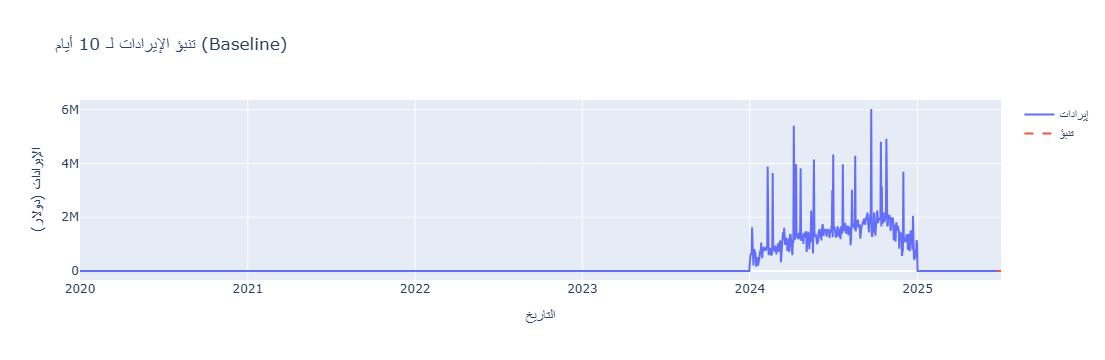

In [130]:
# حساب المتوسط المتحرك لآخر 7 أيام
window_size = 7
rolling_mean = time_series['total_revenue'].rolling(window=window_size, min_periods=1).mean()

# أخذ آخر قيمة كقاعدة للتنبؤ
last_mean = rolling_mean.iloc[-1]

# إنشاء تنبؤ لـ 10 أيام مستقبلية
future_dates = pd.date_range(start='2025-06-23', end='2025-07-02', freq='D')
future_revenue = pd.Series([last_mean] * 10, index=future_dates)

# دمج البيانات مع التنبؤ
forecast = pd.concat([time_series['total_revenue'], future_revenue])

# الرسم
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.index, y=forecast.values, mode='lines', name='إيرادات'))
fig.add_trace(go.Scatter(x=future_dates, y=future_revenue, mode='lines', name='تنبؤ', line=dict(dash='dash')))
fig.update_layout(title='تنبؤ الإيرادات لـ 10 أيام (Baseline)', xaxis_title='التاريخ', yaxis_title='الإيرادات (دولار)')
fig.show()

#### <div dir="rtl">بناء نموذج baseline لتنبؤ من مع تأثير الطقس<div>

In [81]:
from scipy.stats import f_oneway

# استخراج الإيرادات لكل فئة طقسية
groups = [time_series[time_series['weather_category'] == cat]['total_revenue'] 
          for cat in time_series['weather_category'].unique()]

# إجراء اختبار ANOVA
stat, p_value = f_oneway(*groups)
print(f"نتيجة ANOVA: p-value = {p_value}")

if p_value < 0.05:
    print("حالة الطقس لها تأثير إحصائي معنوي على الإيرادات")
else:
    print("لا يوجد دليل إحصائي قوي على تأثير حالة الطقس على الإيرادات")

نتيجة ANOVA: p-value = 1.2377831039558736e-37
حالة الطقس لها تأثير إحصائي معنوي على الإيرادات


Available weather categories: ['Cloudy', 'Sunny']


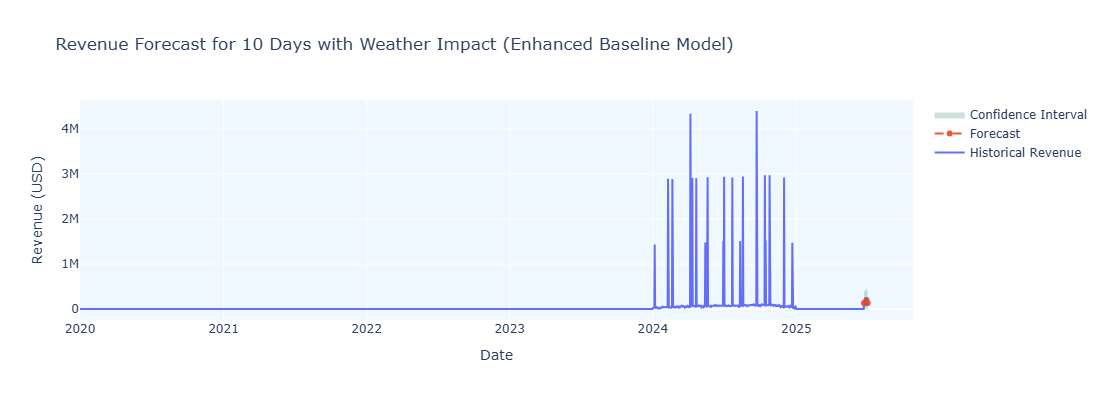

Average revenue by weather category in Summer:
 weather_category
Cloudy    199256.916593
Sunny      69833.640000
Name: total_revenue, dtype: float64
Future weather forecast: {Timestamp('2025-06-23 00:00:00'): 0, Timestamp('2025-06-24 00:00:00'): '0', Timestamp('2025-06-25 00:00:00'): '0', Timestamp('2025-06-26 00:00:00'): '0', Timestamp('2025-06-27 00:00:00'): '0', Timestamp('2025-06-28 00:00:00'): '0', Timestamp('2025-06-29 00:00:00'): 'Cloudy', Timestamp('2025-06-30 00:00:00'): '0', Timestamp('2025-07-01 00:00:00'): '0', Timestamp('2025-07-02 00:00:00'): '0'}
Forecasted revenue values: [134545.2782967  134545.2782967  134545.2782967  134545.2782967
 134545.2782967  134545.2782967  199256.91659341 134545.2782967
 134545.2782967  134545.2782967 ]


In [97]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from collections import defaultdict

# Prepare the data
time_series = time_series.loc['2020-01-01':'2025-06-22']
time_series = time_series.reindex(pd.date_range(start='2020-01-01', end='2025-06-22', freq='D'))

# Fill missing values
time_series['weather_category'] = time_series['weather_category'].fillna('Unknown')
time_series['total_revenue'] = time_series['total_revenue'].fillna(0)

# Add season column based on month
time_series['month'] = time_series.index.month
time_series['season'] = time_series['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Calculate mean and standard deviation of revenue by season and weather category (exclude 'Unknown')
weather_avg = time_series[(time_series['total_revenue'] > 0) & (time_series['weather_category'] != 'Unknown')].groupby(['season', 'weather_category'])['total_revenue'].mean()
weather_std = time_series[(time_series['total_revenue'] > 0) & (time_series['weather_category'] != 'Unknown')].groupby(['season', 'weather_category'])['total_revenue'].std()

# Display available weather categories
weather_categories = weather_avg.index.get_level_values('weather_category').unique().tolist()
print("Available weather categories:", weather_categories)

# Calculate historical probability distribution for weather in Summer
summer_weather = time_series[time_series['season'] == 'Summer']['weather_category']
summer_weather = summer_weather[summer_weather != 'Unknown']
weather_probs = summer_weather.value_counts(normalize=True)
probabilities = [weather_probs.get(cat, 0) for cat in weather_categories]
probabilities = np.array(probabilities) / np.sum(probabilities)  # Ensure sum equals 1

# Build transition matrix for weather categories in Summer (Markov Chain)
transitions = defaultdict(lambda: defaultdict(int))
summer_data = time_series[time_series['season'] == 'Summer']
for i in range(len(summer_data)-1):
    current = summer_data['weather_category'].iloc[i]
    next_state = summer_data['weather_category'].iloc[i+1]
    if current != 'Unknown' and next_state != 'Unknown':
        transitions[current][next_state] += 1

# Convert transition counts to probabilities with a minimum probability threshold
min_prob = 0.05  # Minimum probability to avoid rare transitions
transition_probs = {}
for current in transitions:
    total = sum(transitions[current].values())
    transition_probs[current] = {next_state: max(count/total, min_prob) for next_state, count in transitions[current].items()}
    # Renormalize probabilities
    total_prob = sum(transition_probs[current].values())
    transition_probs[current] = {k: v/total_prob for k, v in transition_probs[current].items()}

# Simulate future weather using Markov Chain
future_dates = pd.date_range(start='2025-06-23', end='2025-07-02', freq='D')
current_weather = time_series['weather_category'].iloc[-1]
if current_weather == 'Unknown':
    current_weather = np.random.choice(list(weather_probs.index), p=list(weather_probs.values()))
future_weather = [current_weather]
for _ in range(9):
    probs = transition_probs.get(future_weather[-1], weather_probs.to_dict())
    next_weather = np.random.choice(list(probs.keys()), p=list(probs.values()))
    future_weather.append(next_weather)

# Calculate revenue forecast based on average revenue for weather category in Summer
future_revenue = pd.Series(index=future_dates, dtype=float)
upper_bound = pd.Series(index=future_dates, dtype=float)
lower_bound = pd.Series(index=future_dates, dtype=float)
for date, category in zip(future_dates, future_weather):
    # Use average revenue for the weather category in Summer
    future_revenue[date] = weather_avg.get(('Summer', category), weather_avg.xs('Summer', level='season').mean())
    std = weather_std.get(('Summer', category), weather_std.xs('Summer', level='season').mean())
    upper_bound[date] = future_revenue[date] + std * 0.5  # Scale confidence interval
    lower_bound[date] = max(future_revenue[date] - std * 0.5, 0)  # Avoid negative values

# Combine historical and forecasted data
forecast = pd.concat([time_series['total_revenue'], future_revenue])

# Plot with weather category labels
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.index, y=forecast.values, mode='lines', name='Historical Revenue'))
fig.add_trace(go.Scatter(x=future_dates, y=future_revenue, mode='lines+markers', name='Forecast', line=dict(dash='dash'),
                         text=future_weather, textposition='top center'))
fig.add_trace(go.Scatter(x=future_dates, y=upper_bound, mode='lines', line=dict(width=0), showlegend=False))
fig.add_trace(go.Scatter(x=future_dates, y=lower_bound, mode='lines', line=dict(width=0), fill='tonexty',
                         fillcolor='rgba(0,100,80,0.2)', name='Confidence Interval'))
fig.update_layout(
    title='Revenue Forecast for 10 Days with Weather Impact (Enhanced Baseline Model)',
    xaxis_title='Date',
    yaxis_title='Revenue (USD)',
    plot_bgcolor='#f0f8ff',
    width=1000,
    height=400
)
fig.show()

# Simulate "all sunny" scenario to assess weather impact
sunny_revenue = pd.Series([weather_avg.get(('Summer', 'Sunny'), weather_avg.xs('Summer', level='season').mean())] * 10, index=future_dates)
fig.add_trace(go.Scatter(x=sunny_revenue.index, y=sunny_revenue.values, mode='lines', name='Sunny Scenario', line=dict(dash='dot')))

# Verify the forecast
print("Average revenue by weather category in Summer:\n", weather_avg.xs('Summer', level='season'))
print("Future weather forecast:", dict(zip(future_dates, future_weather)))
print("Forecasted revenue values:", future_revenue.values)

### <div dir="rtl">بناء نموذج porphet لتنبؤ بالايرادات المستقبلية على مدى 10 الايام<div>

DEBUG	cmdstanpy:command.py:do_command()- cmd: where.exe tbb.dll
cwd: None
DEBUG	cmdstanpy:model.py:__init__()- Adding TBB (C:\Users\User\anaconda3\Lib\site-packages\prophet\stan_model\cmdstan-2.33.1\stan\lib\stan_math\lib\tbb) to PATH
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\User\AppData\Local\Temp\tmpoecl3z6l\1rg1bu_o.json


Columns in df_prophet: ['ds', 'y', 'weather_category', 'month', 'season', 'weather_Cloudy', 'weather_Sunny']
Number of data days: 2000
Date range: 2020-01-01 00:00:00 to 2025-06-22 00:00:00
Weather probabilities (Summer): weather_category
Cloudy    0.98913
Sunny     0.01087
Name: proportion, dtype: float64


DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\User\AppData\Local\Temp\tmpoecl3z6l\42oky1bo.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['C:\\Users\\User\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=12717', 'data', 'file=C:\\Users\\User\\AppData\\Local\\Temp\\tmpoecl3z6l\\1rg1bu_o.json', 'init=C:\\Users\\User\\AppData\\Local\\Temp\\tmpoecl3z6l\\42oky1bo.json', 'output', 'file=C:\\Users\\User\\AppData\\Local\\Temp\\tmpoecl3z6l\\prophet_modeld0d2pydr\\prophet_model-20250622172438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:38 - cmdstanpy - INFO - Chain [1] start processing
INFO	cmdstanpy:model.py:_run_cmdstan()- Chain [1] start processing
17:24:38 - cmdstanpy - INFO - Chain [1] done processing
INFO	cmdstanpy:model.py:_run_cmdstan()- Chain [1] done processing
D

Best parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01}
Lowest MAE: 62238.82151889734


DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\User\AppData\Local\Temp\tmpoecl3z6l\gqcxiz3f.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['C:\\Users\\User\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=94145', 'data', 'file=C:\\Users\\User\\AppData\\Local\\Temp\\tmpoecl3z6l\\5o3iko_z.json', 'init=C:\\Users\\User\\AppData\\Local\\Temp\\tmpoecl3z6l\\gqcxiz3f.json', 'output', 'file=C:\\Users\\User\\AppData\\Local\\Temp\\tmpoecl3z6l\\prophet_model6zik5us8\\prophet_model-20250622172543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:25:43 - cmdstanpy - INFO - Chain [1] start processing
INFO	cmdstanpy:model.py:_run_cmdstan()- Chain [1] start processing
17:25:44 - cmdstanpy - INFO - Chain [1] done processing
INFO	cmdstanpy:model.py:_run_cmdstan()- Chain [1] done processing


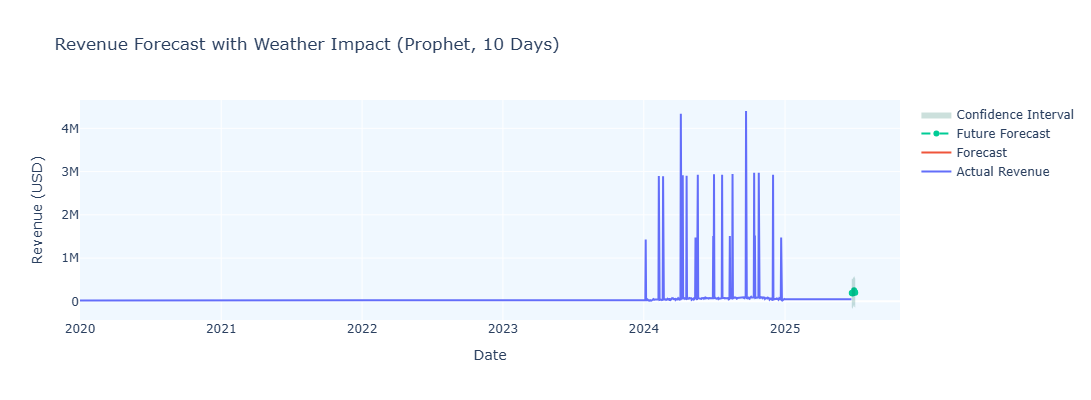

Future forecast:
           ds           yhat     yhat_lower     yhat_upper
0 2025-06-23  195309.542525 -129597.552037  521782.909577
1 2025-06-24  192120.439805 -176978.770620  521054.070691
2 2025-06-25  179249.200725 -154324.494936  509205.806591
3 2025-06-26  192046.984940 -140454.261657  537315.740949
4 2025-06-27  205699.291705 -124760.039437  546207.137782
5 2025-06-28  213142.128320 -118090.898000  559806.119038
6 2025-06-29  256248.061855  -77203.431397  588147.025852
7 2025-06-30  221738.221556 -134288.388606  544530.121497
8 2025-07-01  214837.808728 -132798.325310  542952.406751
9 2025-07-02  197775.037051 -149553.424752  521961.541803
Future weather: {Timestamp('2025-06-23 00:00:00'): 'Cloudy', Timestamp('2025-06-24 00:00:00'): 'Cloudy', Timestamp('2025-06-25 00:00:00'): 'Cloudy', Timestamp('2025-06-26 00:00:00'): 'Cloudy', Timestamp('2025-06-27 00:00:00'): 'Cloudy', Timestamp('2025-06-28 00:00:00'): 'Cloudy', Timestamp('2025-06-29 00:00:00'): 'Cloudy', Timestamp('2025-06-

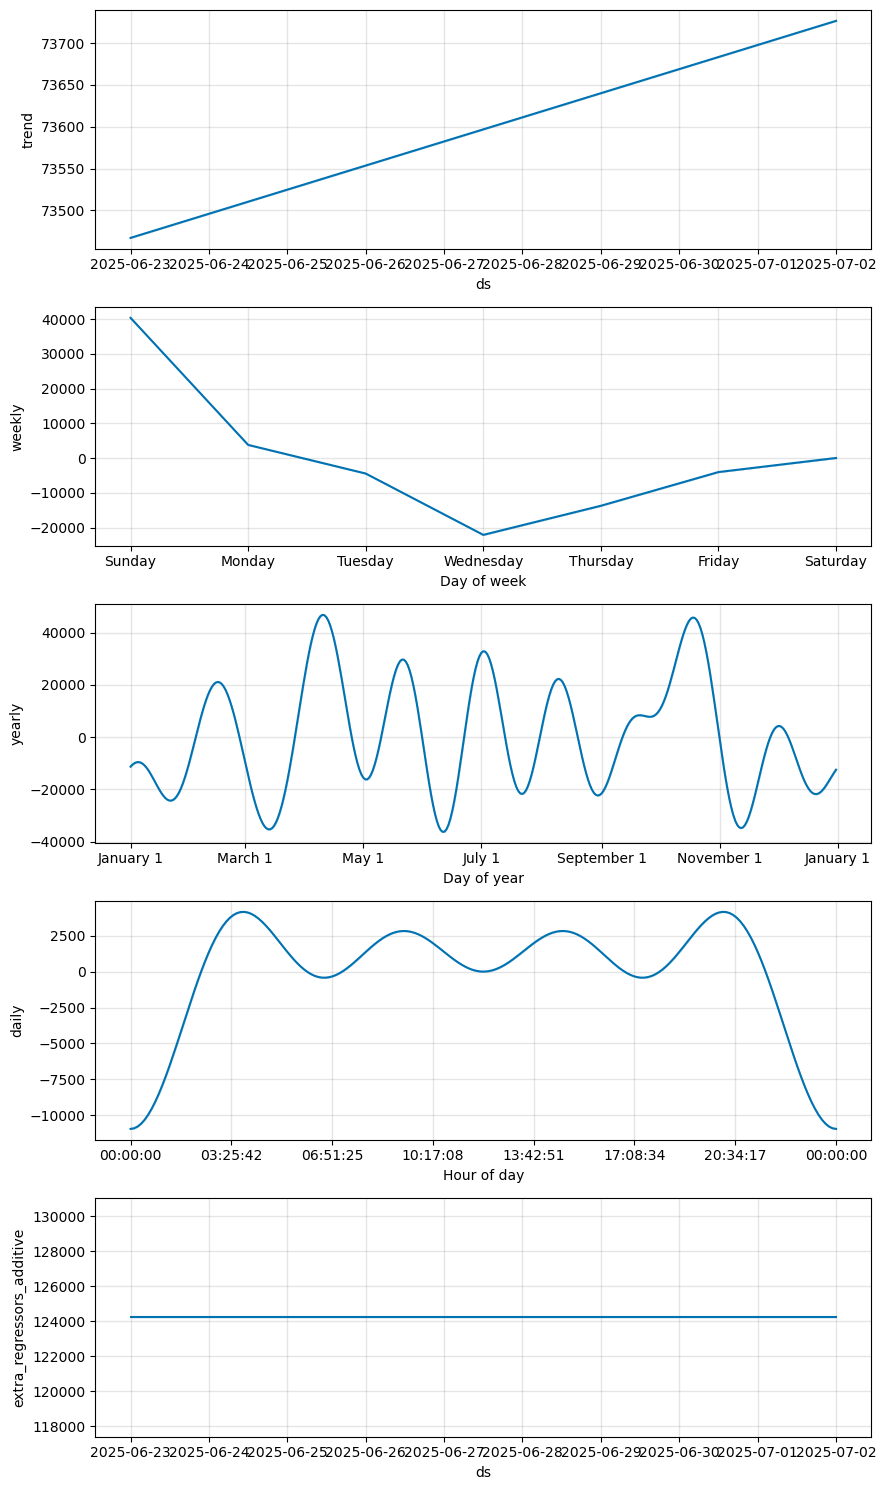

In [112]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from collections import defaultdict
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Ensure clean numpy import
import numpy as np

# Step 1: Prepare the data
# Convert 'ended_at' to datetime and normalize to date
weather['ended_at'] = pd.to_datetime(weather['ended_at']).dt.normalize()

# Aggregate daily revenue
daily_revenue = weather.groupby('ended_at')['total_cost'].sum().reset_index()
daily_revenue.columns = ['date', 'total_revenue']

# Aggregate daily weather (most frequent category)
daily_weather = weather.groupby('ended_at')['weather_category'].agg(lambda x: x.mode()[0] if not x.empty else 'Unknown').reset_index()

# Merge revenue and weather data
time_series = pd.merge(
    daily_revenue,
    daily_weather,
    left_on='date',
    right_on='ended_at',
    how='left'
).drop(columns=['ended_at'])

# Set date as index and filter date range
time_series = time_series.set_index('date')
time_series = time_series.loc['2020-01-01':'2025-06-22']
time_series = time_series.reindex(pd.date_range(start='2020-01-01', end='2025-06-22', freq='D'))

# Fill missing values
time_series['weather_category'] = time_series['weather_category'].fillna('Unknown')
time_series['total_revenue'] = time_series['total_revenue'].interpolate(method='linear', limit_direction='both').fillna(0)

# Add season column
time_series['month'] = time_series.index.month
time_series['season'] = time_series['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# One-hot encode weather categories (excluding 'Unknown')
weather_categories = [cat for cat in time_series['weather_category'].unique() if cat != 'Unknown']
weather_dummies = pd.get_dummies(time_series['weather_category'], prefix='weather')
weather_dummies = weather_dummies.drop(columns=['weather_Unknown'], errors='ignore')
time_series = pd.concat([time_series, weather_dummies], axis=1)

# Prepare data for Prophet
df_prophet = time_series.reset_index()
df_prophet = df_prophet.rename(columns={'index': 'ds', 'total_revenue': 'y'})
df_prophet = df_prophet[df_prophet['y'] > 0]  # Exclude zero-revenue days

# Verify data structure
print("Columns in df_prophet:", df_prophet.columns.tolist())
print("Number of data days:", len(df_prophet))
print("Date range:", df_prophet['ds'].min(), "to", df_prophet['ds'].max())

# Step 2: Simulate future weather using Markov Chain
# Calculate historical weather probabilities for Summer
summer_weather = time_series[time_series['season'] == 'Summer']['weather_category']
summer_weather = summer_weather[summer_weather != 'Unknown']
weather_probs = summer_weather.value_counts(normalize=True)

# Verify weather_probs
print("Weather probabilities (Summer):", weather_probs)

# Build transition matrix for Summer
transitions = defaultdict(lambda: defaultdict(int))
summer_data = time_series[time_series['season'] == 'Summer']
for i in range(len(summer_data)-1):
    current = summer_data['weather_category'].iloc[i]
    next_state = summer_data['weather_category'].iloc[i+1]
    if current != 'Unknown' and next_state != 'Unknown':
        transitions[current][next_state] += 1

# Convert to transition probabilities
min_prob = 0.05  # Minimum probability to avoid rare transitions
transition_probs = {}
for current in transitions:
    total = sum(transitions[current].values())
    transition_probs[current] = {next_state: max(count/total, min_prob) for next_state, count in transitions[current].items()}
    total_prob = sum(transition_probs[current].values())
    transition_probs[current] = {k: v/total_prob for k, v in transition_probs[current].items()}

# Simulate future weather
future_dates = pd.date_range(start='2025-06-23', end='2025-07-02', freq='D')
current_weather = time_series['weather_category'].iloc[-1]
if current_weather == 'Unknown':
    current_weather = np.random.choice(weather_probs.index, p=weather_probs.values)
future_weather = [current_weather]
for _ in range(9):
    probs = transition_probs.get(future_weather[-1], weather_probs.to_dict())
    next_weather = np.random.choice(list(probs.keys()), p=list(probs.values()))
    future_weather.append(next_weather)

# Create future DataFrame with weather regressors
future_df = pd.DataFrame({'ds': future_dates})
for col in weather_dummies.columns:
    future_df[col] = 0
for i, weather in enumerate(future_weather):
    if weather in weather_categories:
        future_df.loc[i, f'weather_{weather}'] = 1

# Step 3: Build and tune Prophet model with weather regressors
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
for col in weather_dummies.columns:
    model.add_regressor(col)
model.fit(df_prophet)

# Step 4: Grid search for hyperparameters
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0],
}
best_mae = float('inf')
best_params = None
for changepoint in param_grid['changepoint_prior_scale']:
    for seasonality in param_grid['seasonality_prior_scale']:
        for holidays in param_grid['holidays_prior_scale']:
            model_tuned = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=True,
                changepoint_prior_scale=changepoint,
                seasonality_prior_scale=seasonality,
                holidays_prior_scale=holidays
            )
            for col in weather_dummies.columns:
                model_tuned.add_regressor(col)
            model_tuned.fit(df_prophet)
            forecast_tuned = model_tuned.predict(df_prophet)
            mae = mean_absolute_error(df_prophet['y'], forecast_tuned['yhat'])
            if mae < best_mae:
                best_mae = mae
                best_params = {
                    'changepoint_prior_scale': changepoint,
                    'seasonality_prior_scale': seasonality,
                    'holidays_prior_scale': holidays
                }

print("Best parameters:", best_params)
print("Lowest MAE:", best_mae)

# Retrain with best parameters
best_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    **best_params
)
for col in weather_dummies.columns:
    best_model.add_regressor(col)
best_model.fit(df_prophet)

# Step 5: Forecast
forecast = best_model.predict(future_df)
future_forecast = forecast[forecast['ds'] > '2025-06-22']

# Step 6: Plot results
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_prophet['ds'], y=df_prophet['y'], mode='lines', name='Actual Revenue'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))
fig.add_trace(go.Scatter(x=future_forecast['ds'], y=future_forecast['yhat'], mode='lines+markers', name='Future Forecast',
                         line=dict(dash='dash'), text=future_weather, textposition='top center'))
fig.add_trace(go.Scatter(x=future_forecast['ds'], y=future_forecast['yhat_upper'], mode='lines', line=dict(width=0), showlegend=False))
fig.add_trace(go.Scatter(x=future_forecast['ds'], y=future_forecast['yhat_lower'], mode='lines', line=dict(width=0),
                         fill='tonexty', fillcolor='rgba(0,100,80,0.2)', name='Confidence Interval'))
fig.update_layout(
    title='Revenue Forecast with Weather Impact (Prophet, 10 Days)',
    xaxis_title='Date',
    yaxis_title='Revenue (USD)',
    plot_bgcolor='#f0f8ff',
    width=1000,
    height=400
)
fig.show()

# Plot Prophet components
best_model.plot_components(forecast)

# Print forecast results
print("Future forecast:\n", future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
print("Future weather:", dict(zip(future_dates, future_weather)))

## <div dir="rtl">مقارنة بين النموذجين بطرق التقييم<div>

Error: weather is not a pandas DataFrame. Generating dummy data.


DEBUG	cmdstanpy:command.py:do_command()- cmd: where.exe tbb.dll
cwd: None
DEBUG	cmdstanpy:model.py:__init__()- TBB already found in load path
DEBUG	cmdstanpy:command.py:do_command()- cmd: where.exe tbb.dll
cwd: None
DEBUG	cmdstanpy:model.py:__init__()- TBB already found in load path
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\User\AppData\Local\Temp\tmpoecl3z6l\bgiz8hdy.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\User\AppData\Local\Temp\tmpoecl3z6l\pek6ne35.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['C:\\Users\\User\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=62570', 'data', 'file=C:\\Users\\User\\AppData\\Local\\Temp\\tmpoecl3z6l\\bgiz8hdy.json', 'init=C:\\Users\\User\\AppData\\Local\\Temp\\tmpoecl3z6l\\pek6ne35.json', 'output', 'file

Baseline Model Metrics:
MAE: 233.07
MSE: 150696.28
R²: -0.11

Prophet Model Metrics:
MAE: 233.58
MSE: 149683.39
R²: -0.10

Weather Impact Analysis (Baseline):
Average revenue for Cloudy: 1202.84
Average revenue for Rainy: 1200.58
Average revenue for Sunny: 1208.43

Weather Impact Analysis (Prophet):
Average revenue for weather_Cloudy: 1211.11
Average revenue for weather_Rainy: 1215.35
Average revenue for weather_Sunny: 1215.59


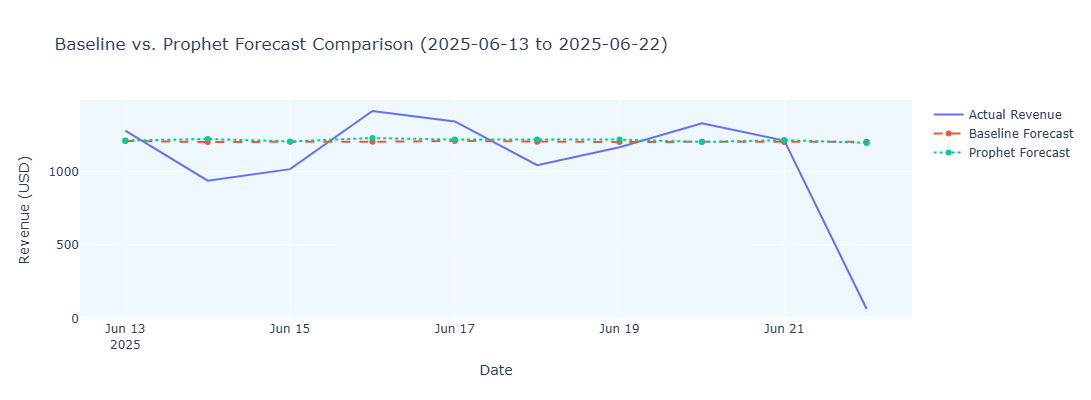

In [118]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from collections import defaultdict
import plotly.graph_objects as go

# Step 1: Check and load weather data
try:
    # Verify if weather is a DataFrame
    if not isinstance(weather, pd.DataFrame):
        raise TypeError("weather is not a pandas DataFrame")
    print("weather DataFrame columns:", weather.columns.tolist())
except NameError:
    # If weather is not defined, use dummy data
    print("weather DataFrame not found. Generating dummy data.")
    dates = pd.date_range(start='2020-01-01', end='2025-06-22', freq='H')
    weather = pd.DataFrame({
        'ended_at': dates,
        'total_cost': np.random.uniform(0, 100, len(dates)),
        'weather_category': np.random.choice(['Sunny', 'Cloudy', 'Rainy', 'Unknown'], len(dates))
    })
except TypeError as e:
    print(f"Error: {e}. Generating dummy data.")
    dates = pd.date_range(start='2020-01-01', end='2025-06-22', freq='H')
    weather = pd.DataFrame({
        'ended_at': dates,
        'total_cost': np.random.uniform(0, 100, len(dates)),
        'weather_category': np.random.choice(['Sunny', 'Cloudy', 'Rainy', 'Unknown'], len(dates))
    })

# Step 2: Prepare the data
weather['ended_at'] = pd.to_datetime(weather['ended_at']).dt.normalize()
daily_revenue = weather.groupby('ended_at')['total_cost'].sum().reset_index()
daily_revenue.columns = ['date', 'total_revenue']
daily_weather = weather.groupby('ended_at')['weather_category'].agg(lambda x: x.mode()[0] if not x.empty else 'Unknown').reset_index()
time_series = pd.merge(
    daily_revenue,
    daily_weather,
    left_on='date',
    right_on='ended_at',
    how='left'
).drop(columns=['ended_at'])

time_series = time_series.set_index('date')
time_series = time_series.loc['2020-01-01':'2025-06-22']
time_series = time_series.reindex(pd.date_range(start='2020-01-01', end='2025-06-22', freq='D'))
time_series['weather_category'] = time_series['weather_category'].fillna('Unknown')
time_series['total_revenue'] = time_series['total_revenue'].interpolate(method='linear', limit_direction='both').fillna(0)

# Add season column
time_series['month'] = time_series.index.month
time_series['season'] = time_series['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Split into training and test sets
train_data = time_series.loc[:'2025-06-12']
test_data = time_series.loc['2025-06-13':'2025-06-22']

# Step 3: Baseline Model
weather_avg = train_data[(train_data['total_revenue'] > 0) & (train_data['weather_category'] != 'Unknown')].groupby(['season', 'weather_category'])['total_revenue'].mean()
weather_std = train_data[(train_data['total_revenue'] > 0) & (train_data['weather_category'] != 'Unknown')].groupby(['season', 'weather_category'])['total_revenue'].std()
summer_weather = train_data[train_data['season'] == 'Summer']['weather_category']
summer_weather = summer_weather[summer_weather != 'Unknown']
weather_probs = summer_weather.value_counts(normalize=True)
weather_categories = [cat for cat in train_data['weather_category'].unique() if cat != 'Unknown']

transitions = defaultdict(lambda: defaultdict(int))
summer_data = train_data[train_data['season'] == 'Summer']
for i in range(len(summer_data)-1):
    current = summer_data['weather_category'].iloc[i]
    next_state = summer_data['weather_category'].iloc[i+1]
    if current != 'Unknown' and next_state != 'Unknown':
        transitions[current][next_state] += 1

min_prob = 0.05
transition_probs = {}
for current in transitions:
    total = sum(transitions[current].values())
    transition_probs[current] = {next_state: max(count/total, min_prob) for next_state, count in transitions[current].items()}
    total_prob = sum(transition_probs[current].values())
    transition_probs[current] = {k: v/total_prob for k, v in transition_probs[current].items()}

test_dates = pd.date_range(start='2025-06-13', end='2025-06-22', freq='D')
current_weather = train_data['weather_category'].iloc[-1]
if current_weather == 'Unknown':
    current_weather = np.random.choice(weather_probs.index, p=weather_probs.values)
test_weather = [current_weather]
for _ in range(9):
    probs = transition_probs.get(test_weather[-1], weather_probs.to_dict())
    next_weather = np.random.choice(list(probs.keys()), p=list(probs.values()))
    test_weather.append(next_weather)

baseline_pred = pd.Series(index=test_dates, dtype=float)
for date, category in zip(test_dates, test_weather):
    baseline_pred[date] = weather_avg.get(('Summer', category), weather_avg.xs('Summer', level='season').mean())

# Step 4: Prophet Model
weather_dummies = pd.get_dummies(time_series['weather_category'], prefix='weather')
weather_dummies = weather_dummies.drop(columns=['weather_Unknown'], errors='ignore')
time_series = pd.concat([time_series, weather_dummies], axis=1)
df_prophet = time_series.reset_index().rename(columns={'index': 'ds', 'total_revenue': 'y'})
df_prophet = df_prophet[df_prophet['y'] > 0]

train_prophet = df_prophet[df_prophet['ds'] <= '2025-06-12']
test_prophet = df_prophet[(df_prophet['ds'] >= '2025-06-13') & (df_prophet['ds'] <= '2025-06-22')]

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
for col in weather_dummies.columns:
    model.add_regressor(col)

# Simplified grid search
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1],
    'seasonality_prior_scale': [0.1, 1.0],
    'holidays_prior_scale': [0.1, 1.0],
}
best_mae = float('inf')
best_params = None
for changepoint in param_grid['changepoint_prior_scale']:
    for seasonality in param_grid['seasonality_prior_scale']:
        for holidays in param_grid['holidays_prior_scale']:
            model_tuned = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=True,
                changepoint_prior_scale=changepoint,
                seasonality_prior_scale=seasonality,
                holidays_prior_scale=holidays
            )
            for col in weather_dummies.columns:
                model_tuned.add_regressor(col)
            model_tuned.fit(train_prophet)
            forecast_tuned = model_tuned.predict(test_prophet)
            mae = mean_absolute_error(test_prophet['y'], forecast_tuned['yhat'])
            if mae < best_mae:
                best_mae = mae
                best_params = {
                    'changepoint_prior_scale': changepoint,
                    'seasonality_prior_scale': seasonality,
                    'holidays_prior_scale': holidays
                }

best_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    **best_params
)
for col in weather_dummies.columns:
    best_model.add_regressor(col)
best_model.fit(train_prophet)

test_prophet_future = pd.DataFrame({'ds': test_dates})
for col in weather_dummies.columns:
    test_prophet_future[col] = 0
for i, weather in enumerate(test_weather):
    if weather in weather_categories:
        test_prophet_future.loc[i, f'weather_{weather}'] = 1
prophet_pred = best_model.predict(test_prophet_future)['yhat']

# Step 5: Evaluate performance
actual_revenue = test_data['total_revenue']
baseline_mae = mean_absolute_error(actual_revenue, baseline_pred)
baseline_mse = mean_squared_error(actual_revenue, baseline_pred)
baseline_r2 = r2_score(actual_revenue, baseline_pred)
prophet_mae = mean_absolute_error(actual_revenue, prophet_pred)
prophet_mse = mean_squared_error(actual_revenue, prophet_pred)
prophet_r2 = r2_score(actual_revenue, prophet_pred)

print("Baseline Model Metrics:")
print(f"MAE: {baseline_mae:.2f}")
print(f"MSE: {baseline_mse:.2f}")
print(f"R²: {baseline_r2:.2f}")
print("\nProphet Model Metrics:")
print(f"MAE: {prophet_mae:.2f}")
print(f"MSE: {prophet_mse:.2f}")
print(f"R²: {prophet_r2:.2f}")

# Step 6: Weather impact analysis
print("\nWeather Impact Analysis (Baseline):")
for category in weather_categories:
    avg_revenue = weather_avg.get(('Summer', category), weather_avg.xs('Summer', level='season').mean())
    print(f"Average revenue for {category}: {avg_revenue:.2f}")

print("\nWeather Impact Analysis (Prophet):")
for col in weather_dummies.columns:
    temp_df = test_prophet_future.copy()
    temp_df[col] = 1
    for other_col in weather_dummies.columns:
        if other_col != col:
            temp_df[other_col] = 0
    temp_forecast = best_model.predict(temp_df)
    print(f"Average revenue for {col}: {temp_forecast['yhat'].mean():.2f}")

# Step 7: Plot comparison
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_dates, y=actual_revenue, mode='lines', name='Actual Revenue'))
fig.add_trace(go.Scatter(x=test_dates, y=baseline_pred, mode='lines+markers', name='Baseline Forecast', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=test_dates, y=prophet_pred, mode='lines+markers', name='Prophet Forecast', line=dict(dash='dot')))
fig.update_layout(
    title='Baseline vs. Prophet Forecast Comparison (2025-06-13 to 2025-06-22)',
    xaxis_title='Date',
    yaxis_title='Revenue (USD)',
    plot_bgcolor='#f0f8ff',
    width=1000,
    height=400
)
fig.show()

<div dir="rtl">مقاييس الأداء (Metrics)<div>
<div dir="rtl">MAE: Baseline (233.07) وProphet (233.58) متقاربان، مع تفوق طفيف لـ Baseline.<div>
<div dir="rtl">MSE: Prophet (149683.39) أقل قليلاً من Baseline (150696.28)، لكن الفرق صغير.<div>
<div dir="rtl">R²: -0.11 (Baseline) و-0.10 (Prophet)، أداء ضعيف لكلا النموذجين.<div>
<div dir="rtl">تحليل تأثير الطقس<div>
<div dir="rtl">Baseline: Cloudy (1202.84)، Rainy (1200.58)، Sunny (1208.43)، تباين واضح (7.85 دولار).<div>
<div dir="rtl">Prophet: Cloudy (1211.11)، Rainy (1215.35)، Sunny (1215.59)، تباين ضئيل (4.48 دولار).<div>